In [112]:
    #
    #IMC
    #classes = ["Peso Normal","Obesidade"]
    #intervalos = [(0, 30),(30, 1000)]
    #
    #classes = ["Peso Normal","Sobrepeso", "Obesidade"]
    #intervalos = [(0, 25),(25, 30),(30, 1000)]
    #
    #classes = ["baixo peso","normal","sobrepeso","obesimc grau I","obesimc grau II","obesimc Grau III"]
    #intervalos = [(0, 18),(18, 25),(25, 30),(30, 35),(35, 40),(40, 1000)]
    #
    #IDADE
    #classes = ["Adultos","Idoso"]
    #intervalos = [(0, 65),(65, 200)]
    #
    #classes = ["Adultos","Meia-idade","Idoso"]
    #intervalos = [(0, 50),(50, 65),(65, 200)]
    #
    #classes = ["Jovens","Adultos","Meia-idade","Idoso", "Ancião","Velhice extrema"]
    #intervalos = [(0, 20),(20, 45),(45, 60),(60, 75),(75, 90),(90, 200)]
    #

In [113]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pathlib import Path
import math
from matplotlib.colors import ListedColormap

from datetime import time, timedelta, datetime, date


plt.rcParams['figure.figsize'] = [10, 5]
mpl.rcParams['figure.dpi'] = 300


# Definição de diretórios e Disco de leitura dos arquivos (Desktop ou Notebook) 
config_dirs = open("prefixo_dados.txt").readlines() 
DIR_PREFIXO = Path(config_dirs[0].strip())


DIRETORIO_PRINCIPAL =  DIR_PREFIXO / "Projeto_PA" / "Projeto_PA_validado"
DIRETORIO_DATASET = DIR_PREFIXO / "Projeto_PA"

DIR_ABORDAGENS = DIRETORIO_PRINCIPAL / "analise_abordagens"
DIR_GRAFICOS = DIR_ABORDAGENS / "graficos_analise"
DIR_KMEANS = DIRETORIO_PRINCIPAL / "KMeansRandom"
DIR_DICT = DIRETORIO_PRINCIPAL / "DICT"
DIR_NMF = DIRETORIO_PRINCIPAL / "NMF"



In [114]:
caminho = DIRETORIO_PRINCIPAL / DIR_KMEANS
caminho
diretorios = {'dict':DIR_DICT,'kmeans':DIR_KMEANS, 'nmf':DIR_NMF}

nome_abordagem = {'cadastro':"_approach_cadastro", 'doenca':"_approach_doenca",
                  'medidas':"_approach_medidas",'estatistica':"_approach_estatistica",
                 'escolho_doenca':"_approach_escolho_doenca", 'categorias':"_approach_classes",
                 'medidas_masc':"_approach_medidas_masc",'medidas_fem':"_approach_medidas_fem",
                 'medidas_diast':"_approach_medidas_diastolica", 'medidas_sist':"_approach_medidas_sistolica",
                 'medidas_importantes':"_approach_medidas_importantes",
                 'simplificado':"_approach_simplificado" }

In [115]:
#analise = 'dict'
#print(analise.capitalize())

In [116]:
from matplotlib.colors import ListedColormap
def grafico_barras_empilhadas(df):
    df.set_index('Cluster')\
      .reindex(df.set_index('Cluster').sum().sort_values().index, axis=1)\
      .T.plot(kind='bar', stacked=True,
              colormap=ListedColormap(sns.color_palette("GnBu", 10)), 
              figsize=(12,6))

In [117]:
#DIR_DICT / f"Dict_approach_doenca
#_grupo_{grupo}.csv", 

# Análise é uma opção do dicionário criado na célula acima
algoritmo = input("Informe a analise ")

caminho_medidas = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['medidas']}"
caminho_estatistica = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['estatistica']}"
caminho_doenca = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['doenca']}"
caminho_cadastro = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['cadastro']}"
caminho_escolho_doenca = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['escolho_doenca']}"
caminho_categorias = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['categorias']}"
caminho_medidas_masc = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['medidas_masc']}"
caminho_medidas_fem = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['medidas_fem']}"
caminho_medidas_diast = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['medidas_diast']}"
caminho_medidas_sist = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['medidas_sist']}"
caminho_medidas_importantes = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['medidas_importantes']}"
caminho_simplificado = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['simplificado']}"



Informe a analise kmeans


In [118]:
#n = float(input('Digite algo: ').replace(',','.'))

In [119]:
caminho_medidas

WindowsPath('D:/Projeto_PA/Projeto_PA_validado/KMeansRandom/KMEANS_approach_medidas')

In [120]:
# Diferentes Abordagens

abordagem_cadastro    = list()
abordagem_medidas     = list()
abordagem_estatistica = list()
abordagem_doenca      = list()
abordagem_escolho_doenca = list()
abordagem_categorias  = list()
abordagem_medidas_masc = list()
abordagem_medidas_fem   = list()
abordagem_medidas_importantes   = list()
abordagem_simplificado    = list()

try:
    grupo_leitura = 1
    while 1:

        abordagem_estatistica.append(pd.read_csv(f"{caminho_estatistica}_grupo_{grupo_leitura}.csv", sep=";", encoding='latin1'))
        grupo_leitura += 1   
except:
    pass

try:
    grupo_leitura = 1
    while 1:

        abordagem_medidas.append(pd.read_csv(f"{caminho_medidas}_grupo_{grupo_leitura}.csv", sep=";", encoding='latin1'))
        grupo_leitura += 1

except:
    pass

try:
    grupo_leitura = 1
    while 1:

        abordagem_doenca.append(pd.read_csv(f"{caminho_doenca}_grupo_{grupo_leitura}.csv", sep=";", encoding='latin1'))
        grupo_leitura += 1
except:
    pass

try:
    grupo_leitura = 1
    while 1:

        abordagem_cadastro.append(pd.read_csv(f"{caminho_cadastro}_grupo_{grupo_leitura}.csv", sep=";", encoding='latin1'))
        grupo_leitura += 1

except:
    pass

try:
    grupo_leitura = 1
    while 1:

        abordagem_escolho_doenca.append(pd.read_csv(f"{caminho_escolho_doenca}_grupo_{grupo_leitura}.csv", sep=";", encoding='latin1'))
        grupo_leitura += 1

except:
    pass

try:
    grupo_leitura = 1
    while 1:

        abordagem_categorias.append(pd.read_csv(f"{caminho_categorias}_grupo_{grupo_leitura}.csv", sep=";", encoding='latin1'))
        grupo_leitura += 1

except:
    pass

try:
    grupo_leitura = 1
    while 1:

        abordagem_medidas_masc.append(pd.read_csv(f"{caminho_medidas_masc}_grupo_{grupo_leitura}.csv", sep=";", encoding='latin1'))
        grupo_leitura += 1

except:
    pass

try:
    grupo_leitura = 1
    while 1:

        abordagem_medidas_fem.append(pd.read_csv(f"{caminho_medidas_fem}_grupo_{grupo_leitura}.csv", sep=";", encoding='latin1'))
        grupo_leitura += 1

except:
    pass

try:
    grupo_leitura = 1
    while 1:

        abordagem_medidas_importantes.append(pd.read_csv(f"{caminho_medidas_importantes}_grupo_{grupo_leitura}.csv", sep=";", encoding='latin1'))
        grupo_leitura += 1

except:
    pass

try:
    grupo_leitura = 1
    while 1:

        abordagem_simplificado.append(pd.read_csv(f"{caminho_simplificado}_grupo_{grupo_leitura}.csv", sep=";", encoding='latin1'))
        grupo_leitura += 1

except:
    pass



In [121]:
abordagem_categorias[0]

numero_identificacao data_nascimento genero  idade   peso altura   IMC  \
0                       17      1976-05-20      M   42.0   87.0    175  28.4   
1                       47      1987-01-30      F   31.0   76.0    180  23.5   
2                       49      1959-04-29      M   59.0  100.0    183  29.9   
3                       58      1967-03-24      M   51.0   78.0    172  26.4   
4                       60      1972-09-30      M   46.0   94.0    178  29.7   
...                    ...             ...    ...    ...    ...    ...   ...   
1263                 21750      1968-03-19      M   52.0   94.0    183  28.1   
1264                 21757      1990-05-25      F   30.0   70.0   1,55  29.1   
1265                 21767      1968-11-15      F   51.0   75.0    165  27.5   
1266                 21768      1964-09-26      F   55.0   71.0    157  28.8   
1267                 21783      1969-05-24      M   51.0   93.0    168  33.0   

               data_exame  grupo  sist 9:00  ...  Mediana Diastolica em 24h  \
0     2018-12-26 10:12:44      1      145.0  ...                       88.5   
1     2018-12-27 08:01:03      1      119.0  ...                       91.5   
2     2018-12-27 08:37:24      1      141.0  ...                       89.0   
3     2018-12-27 09:15:47      1      133.0  ...                       84.0   
4     2018-12-27 09:48:51      1      147.0  ...                       80.0   
...                   ...    ...        ...  ...                        ...   
1263  2020-09-10 10:24:08      1      154.0  ...                       73.0   
1264  2020-09-10 11:08:52      1      137.0  ...                       85.0   
1265  2020-09-10 13:30:24      1      120.0  ...                       90.0   
1266  2020-09-10 13:31:17      1      114.0  ...                       80.0   
1267  2020-09-10 15:40:30      1      119.0  ...                       74.0   

      AUC Sistolica em 24h  AUC Diastolica em 24h  AUC PP Daytime  \
0                  10621.0                 7194.0          2801.0   
1                   9569.5                 7120.0          2014.5   
2                  10353.0                 6868.0          2974.5   
3                  10027.5                 6600.5          2883.5   
4                  10410.0                 6495.5          3268.0   
...                    ...                    ...             ...   
1263               12026.0                 5719.0          5454.5   
1264               10287.5                 6830.0          2751.0   
1265               10111.0                 6892.5          2574.0   
1266                9316.5                 6440.0          2402.0   
1267                9121.5                 5963.5          2605.0   

      AUC PP Nighttime  DP Sistolica em 24h  DP Diastolica em 24h  \
0                610.0                17.55                 14.13   
1                395.5                13.75                 15.49   
2                480.5                17.36                 14.62   
3                511.5                14.72                 12.02   
4                612.0                 9.98                  8.34   
...                ...                  ...                   ...   
1263             791.0                20.67                 10.35   
1264             635.0                11.67                  8.13   
1265             601.5                12.73                 13.87   
1266             426.0                13.05                 11.73   
1267             513.0                14.69                 11.86   

      Picos Sistolica  Picos Diastolica  Diferença % Dipping  
0                  20                26             0.922891  
1                  10                48             1.267778  
2                  24                42             1.257317  
3                  13                23             1.217398  
4                   8                 9             0.962880  
...               ...               ...                  ...

In [122]:
abordagem_medidas[0].loc[:,['IMC','Hipotensao']]

IMC  Hipotensao
0     33.2        True
1     29.4        True
2     21.2        True
3     26.6        True
4     33.3        True
...    ...         ...
2961  34.6        True
2962  27.1        True
2963  32.0        True
2964  36.2        True
2965  33.3        True

[2966 rows x 2 columns]

In [123]:
#print(f"{caminho_doenca}_grupo_{1}.csv")
#print(f"{caminho_medidas}_grupo_{1}.csv")
#print(f"{caminho_estatistica}_grupo_{1}.csv")
#print(f"{caminho_cadastro}_grupo_{1}.csv")

In [124]:
#  variáveis

# Valores de Referência Normal das Sistólicas e Diastólicas
max_sist = 140
min_sist = 100
max_diast = 90
min_diast = 60

# PERÍODOS 
#      Matutino 6h-8h59       Dataset 6h-8h45
#      Diurno 9h-20h59                9h-20h45
#      Vespertino 21h-22h59           21h-22h45
#      Noturno 23h-05h59              23h-5h30

matutino = (time(6,0), time(9,0))
diurno = (time(9,0), time(21,0))
vespertino = (time(21,0), time(1,0))
noturno = (time(1,0), time(6,0))

# Identificando o intervalo de todas as PASs e todas as PADs
#sist = mapas.loc[:,'sist 9:00':'sist 8:45']
#diast = mapas.loc[:,'diast 9:00':'diast 8:45']



In [125]:
def media_sistolica(medidas):
    dados = medidas.loc[:,'sist 9:00':'sist 8:45']
    return(np.round(np.mean(np.mean(dados,axis=1)),2))

def media_diastolica(medidas):
    dados = medidas.loc[:,'diast 9:00':'diast 8:45']
    return(np.round(np.mean(np.mean(dados,axis=1)),2))

def media_sistolica_dia(medidas):
    dados = pd.concat([medidas.loc[:,'sist 6:00':'sist 8:45'],
                   medidas.loc[:,'sist 9:00':'sist 20:45'],
                   medidas.loc[:,'sist 21:00':'sist 22:45']],axis=1)
    return(np.round(np.mean(np.mean(dados,axis=1)),2))

def media_sistolica_noite(medidas):
    dados = medidas.loc[:,'sist 23:00':'sist 5:30']
    return(np.round(np.mean(np.mean(dados,axis=1)),2))

def media_diastolica_dia(medidas):
    dados = pd.concat([medidas.loc[:,'diast 6:00':'diast 8:45'],
                   medidas.loc[:,'diast 9:00':'diast 20:45'],
                   medidas.loc[:,'diast 21:00':'diast 22:45']],axis=1)
    return(np.round(np.mean(np.mean(dados,axis=1)),2))

def media_diastolica_noite(medidas):
    dados = medidas.loc[:,'diast 23:00':'diast 5:30']
    return(np.round(np.mean(np.mean(dados,axis=1)),2))

def variancia_sistolica(medidas):
    dados = medidas.loc[:,'sist 9:00':'sist 8:45']
    return(np.round(np.mean(np.var(dados,axis=1)),2))

def variancia_diastolica(medidas):
    dados = medidas.loc[:,'diast 9:00':'diast 8:45']
    return(np.round(np.mean(np.var(dados,axis=1)),2))

def mediana_sistolica(medidas):
    dados = medidas.loc[:,'sist 9:00':'sist 8:45']
    return(np.median(np.median(dados,axis=1)))

def mediana_diastolica(medidas):
    dados = medidas.loc[:,'diast 9:00':'diast 8:45']
    return(np.median(np.median(dados,axis=1)))

def auc_sistolica(medidas):
    dados = medidas.loc[:,'sist 9:00':'sist 8:45']
    return(np.round(np.mean(np.trapz(dados,axis=1)),2))

def auc_diastolica(medidas):
    dados = medidas.loc[:,'diast 9:00':'diast 8:45']
    return(np.round(np.mean(np.trapz(dados,axis=1)),2))

def desvio_sistolica(medidas):
    dados = medidas.loc[:,'sist 9:00':'sist 8:45']
    return(np.round(np.mean(np.std(dados,axis=1)),2))

def desvio_diastolica(medidas):
    dados = medidas.loc[:,'diast 9:00':'diast 8:45']
    return(np.round(np.mean(np.std(dados,axis=1)),2))

def descenso_noturno(medidas):
    dados = medidas.loc[:,'Diferença % Dipping'].dropna()
    dados = dados - 1
    return np.round(np.mean(dados) * 100,2)


lista_calculo = ['Media Sistolica em 24h','Media Diastolica em 24h','Media Sistolica Daytime','Media Sistolica Nighttime',
                'Media Diastolica Daytime','Media Diastolica Nighttime','Variancia Sistolica em 24h','Variancia Diastolica em 24h',
                'Mediana Sistolica em 24h', 'Mediana Diastolica em 24h','AUC Sistolica em 24h','AUC Diastolica em 24h',
                 'DP Sistolica em 24h','DP Diastolica em 24h','Descenso Noturno']

funcao = [media_sistolica,media_diastolica,media_sistolica_dia,media_sistolica_noite,media_diastolica_dia,
           media_diastolica_noite,variancia_sistolica,variancia_diastolica,mediana_sistolica,mediana_diastolica,
          auc_sistolica,auc_diastolica,desvio_sistolica,desvio_diastolica,descenso_noturno]

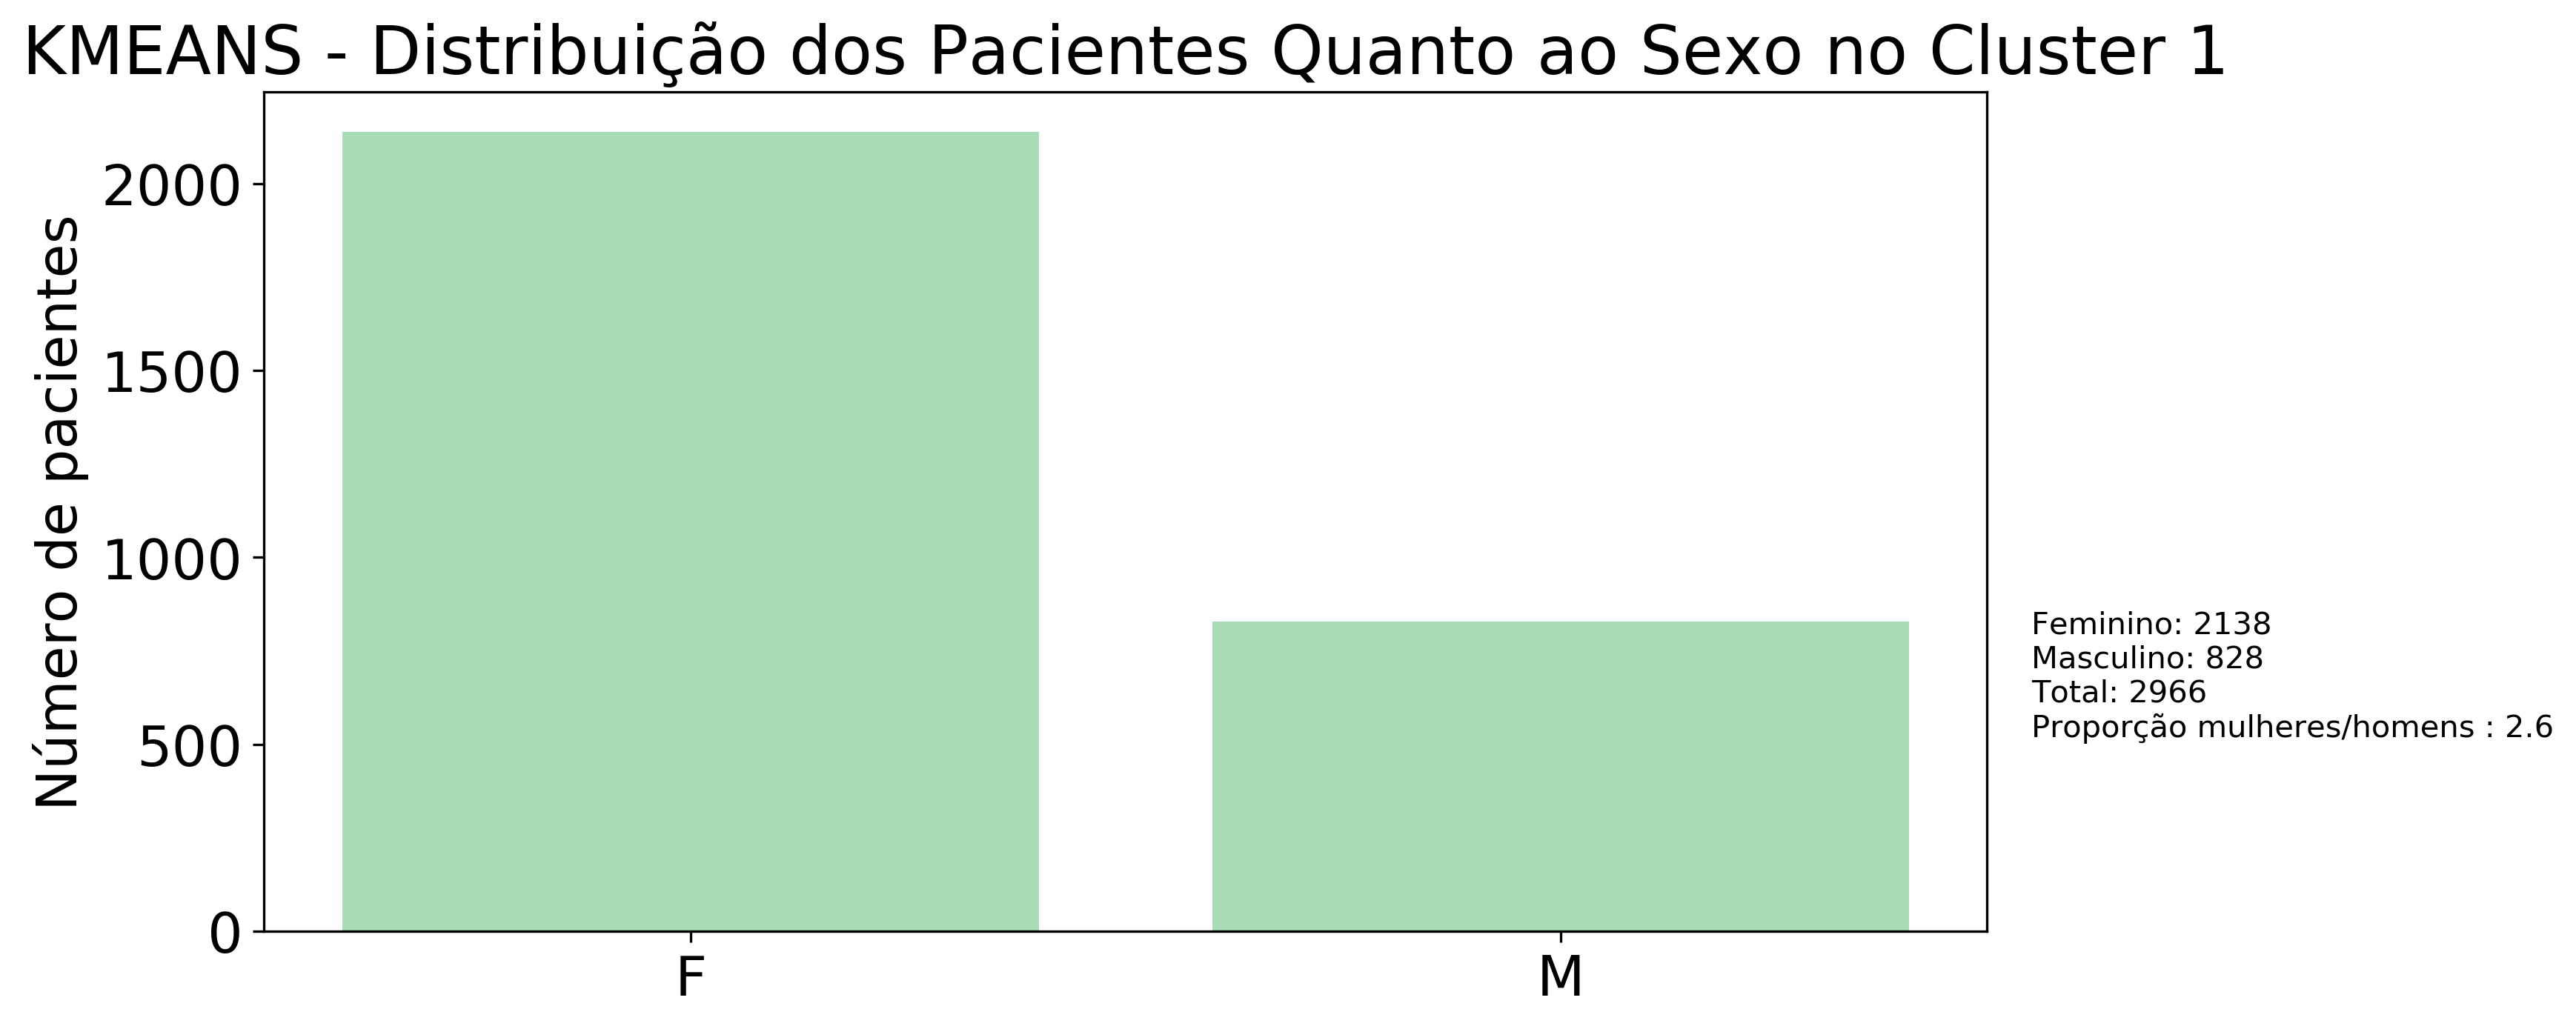

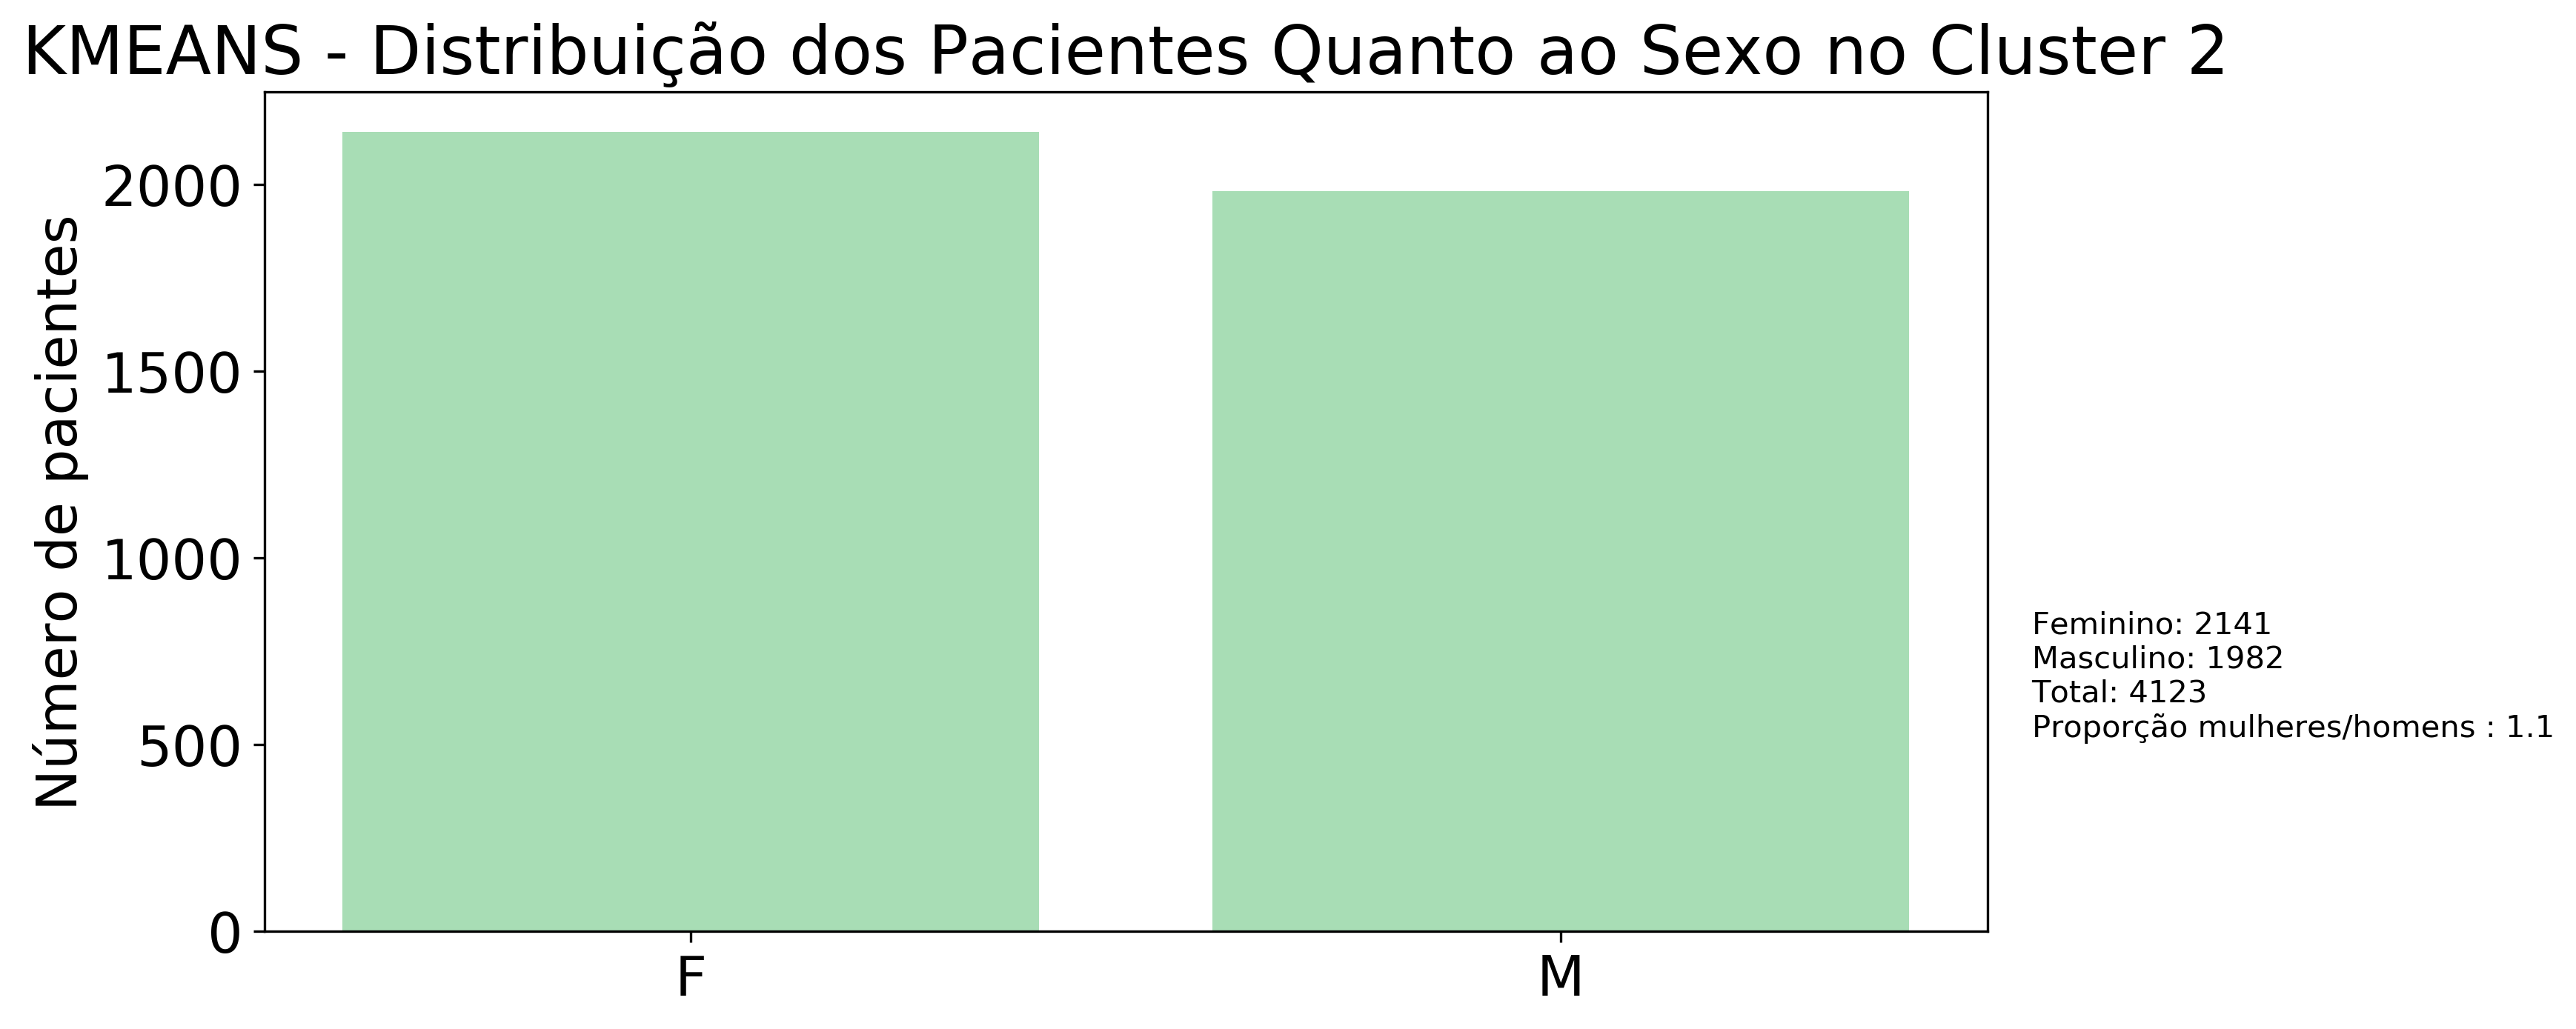

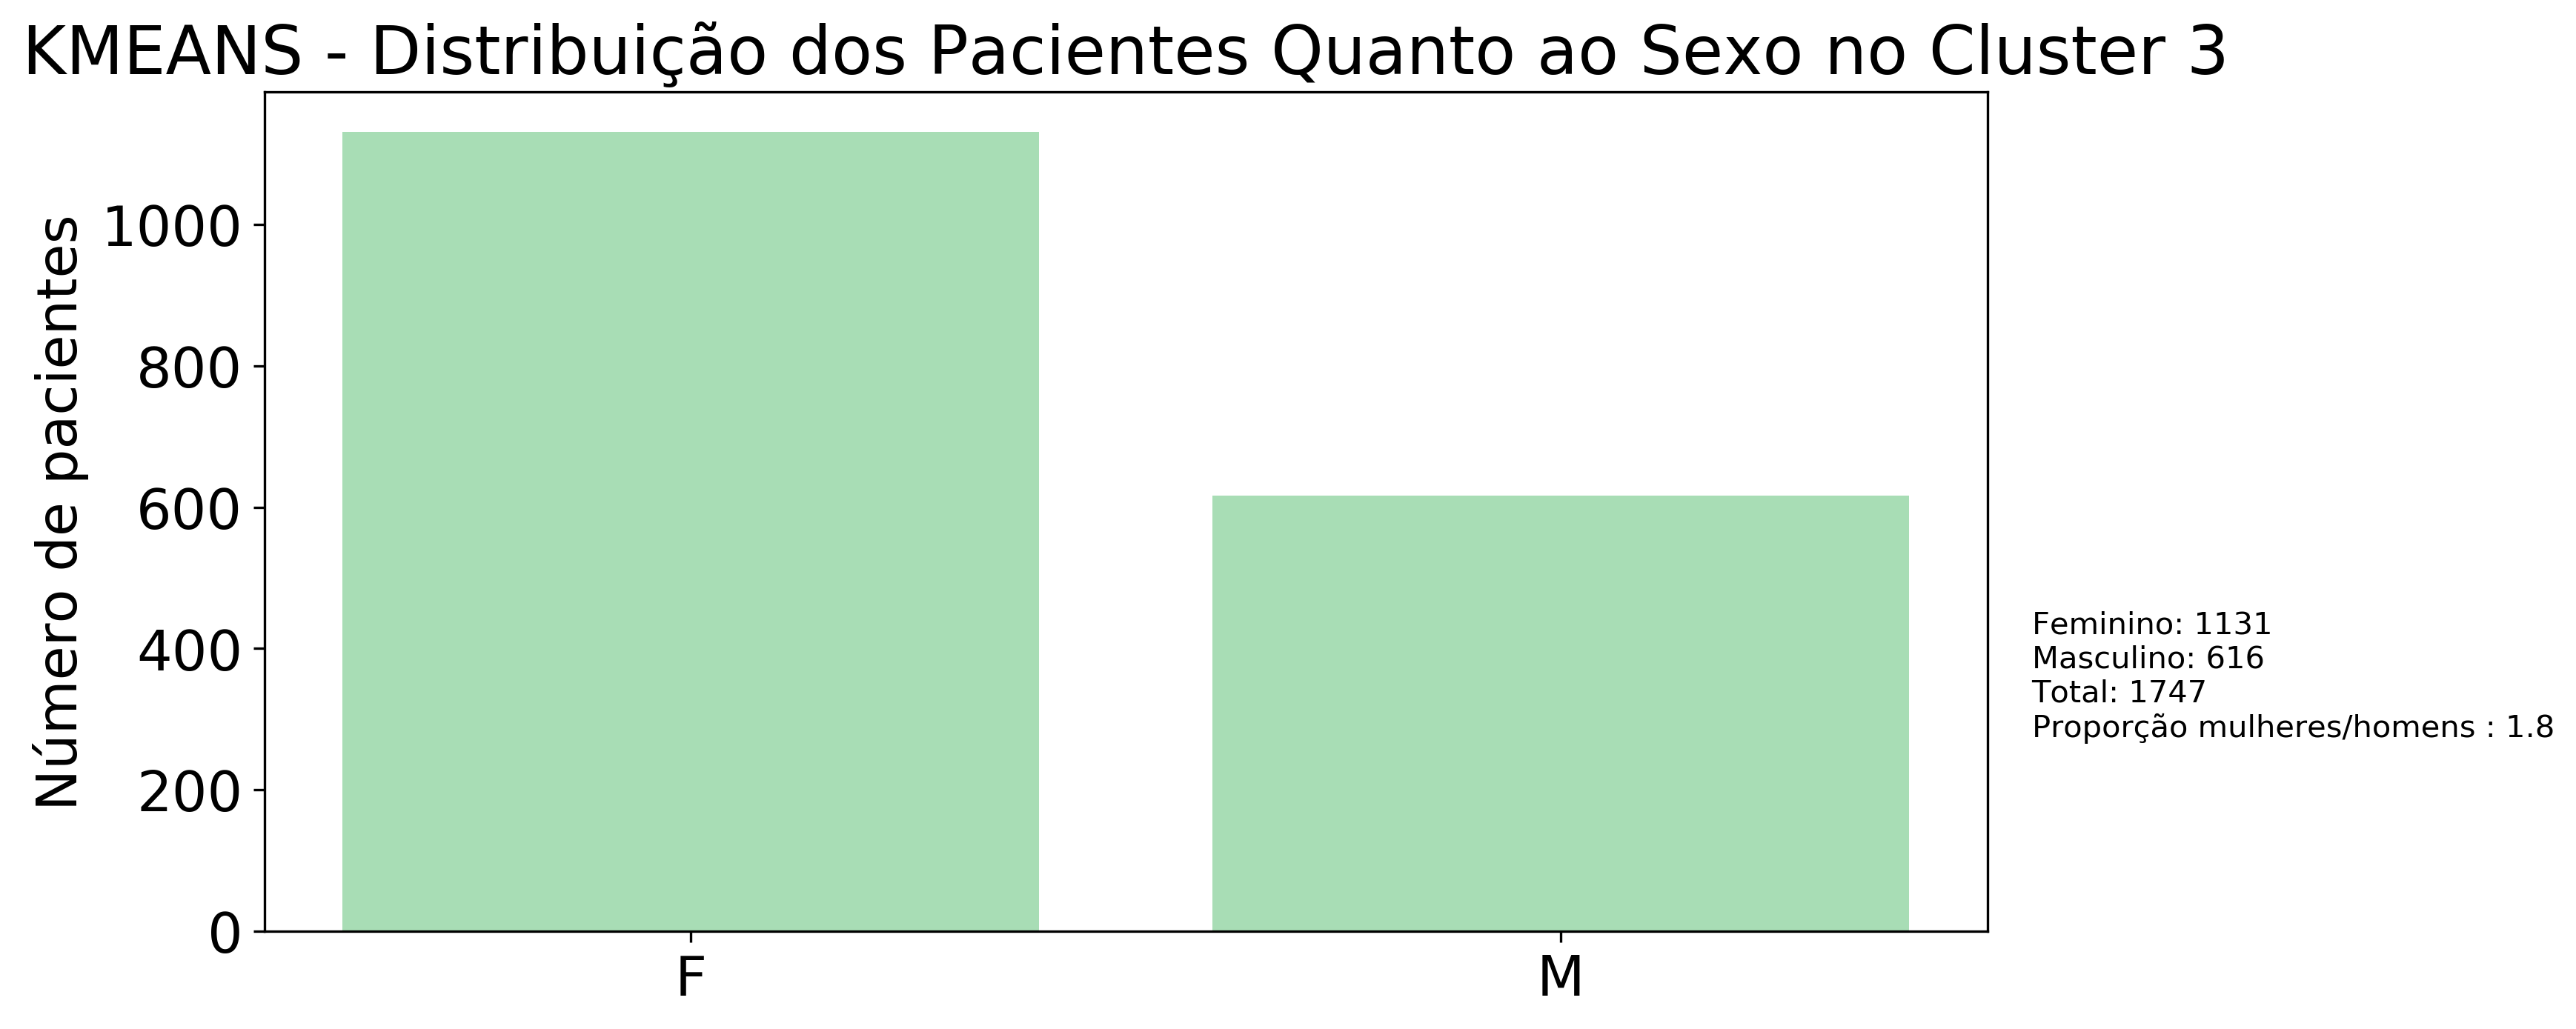

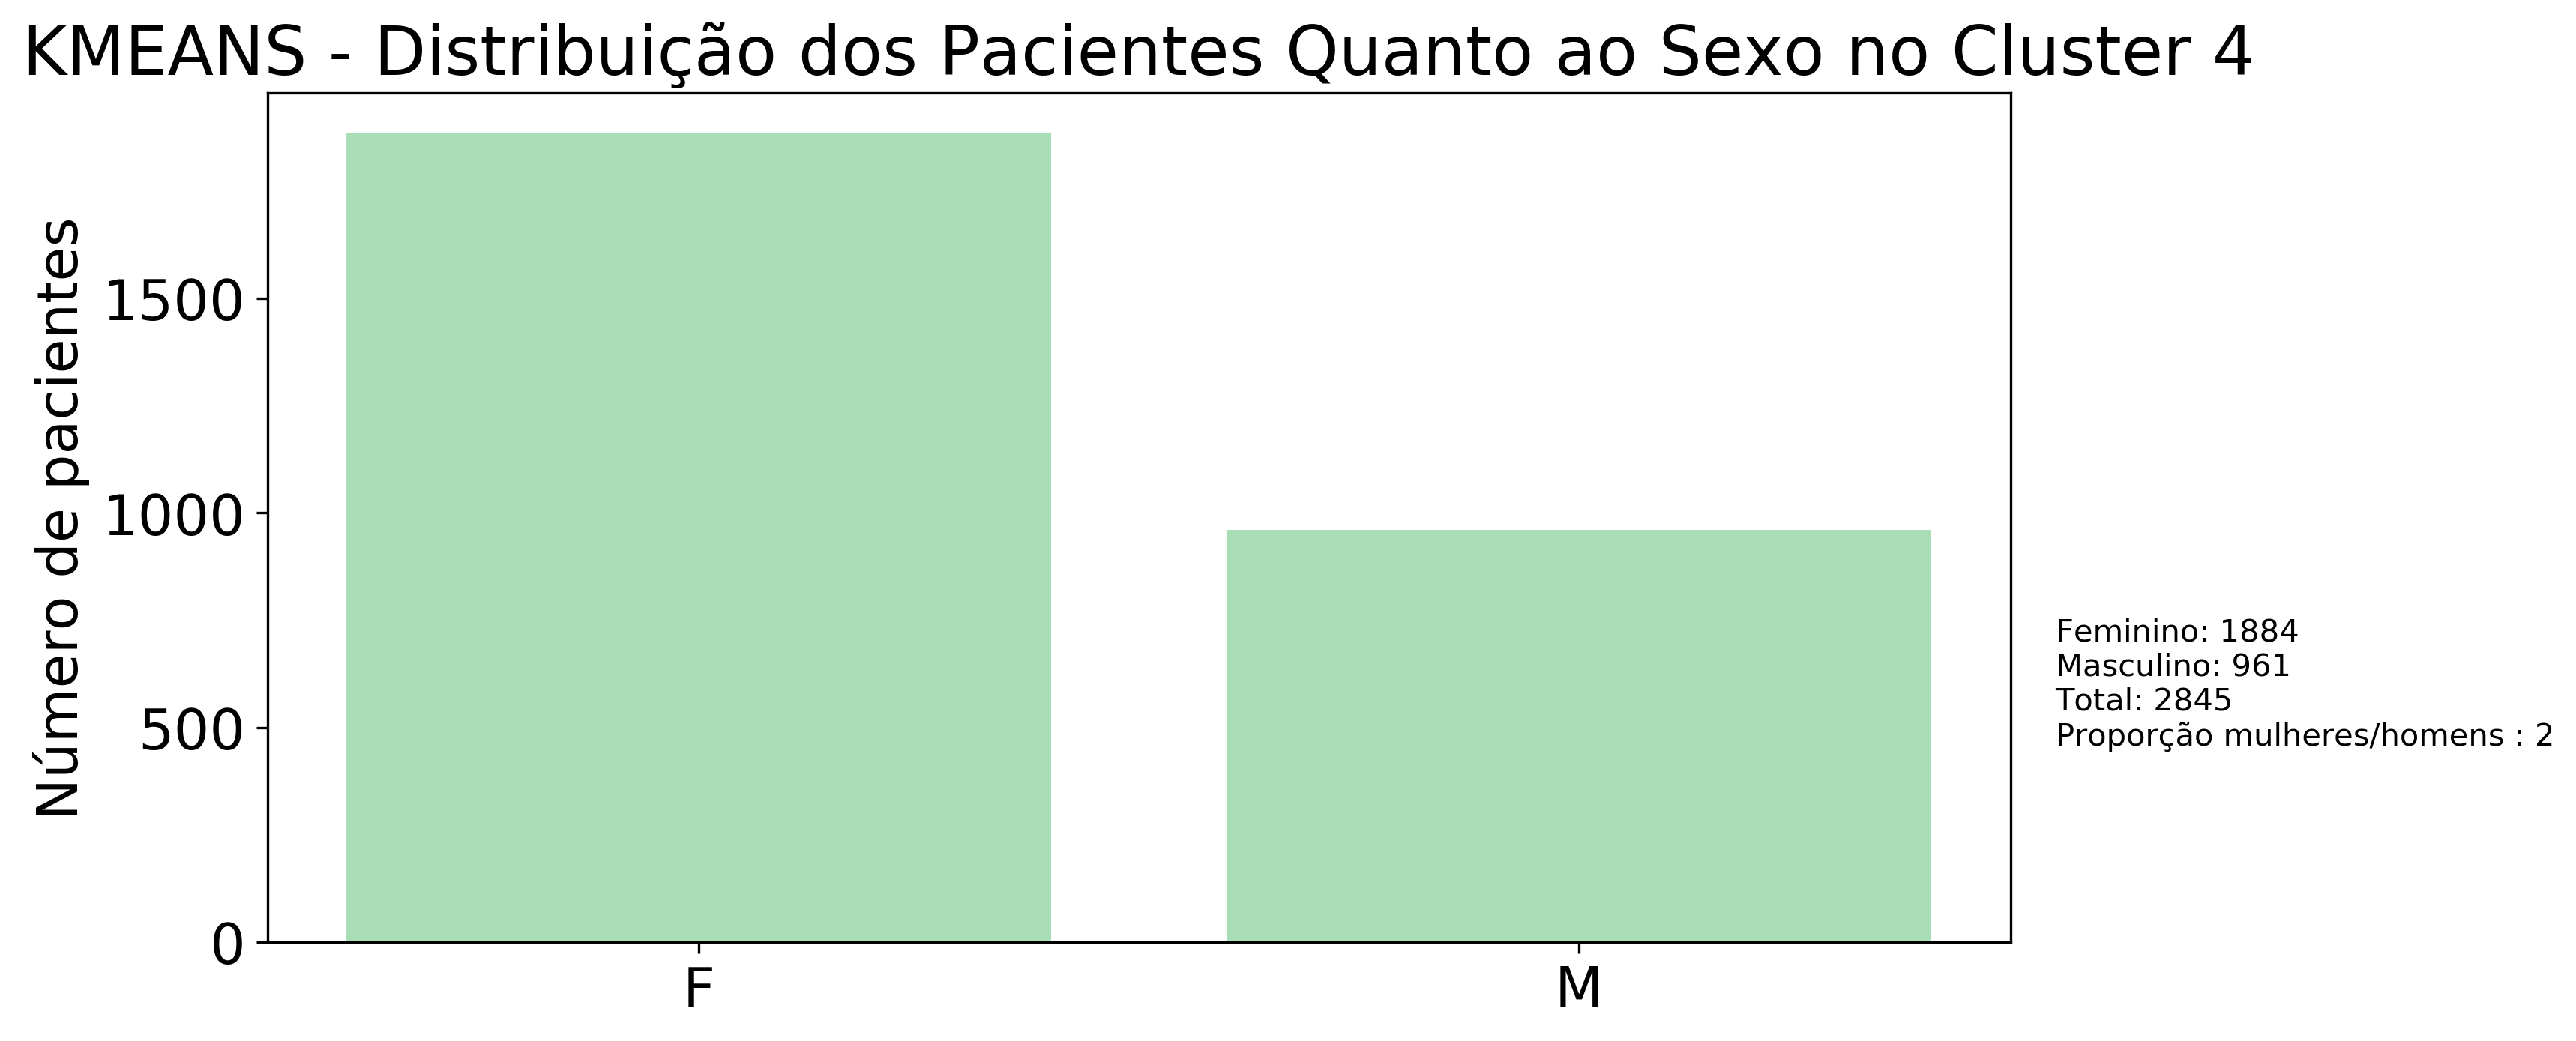

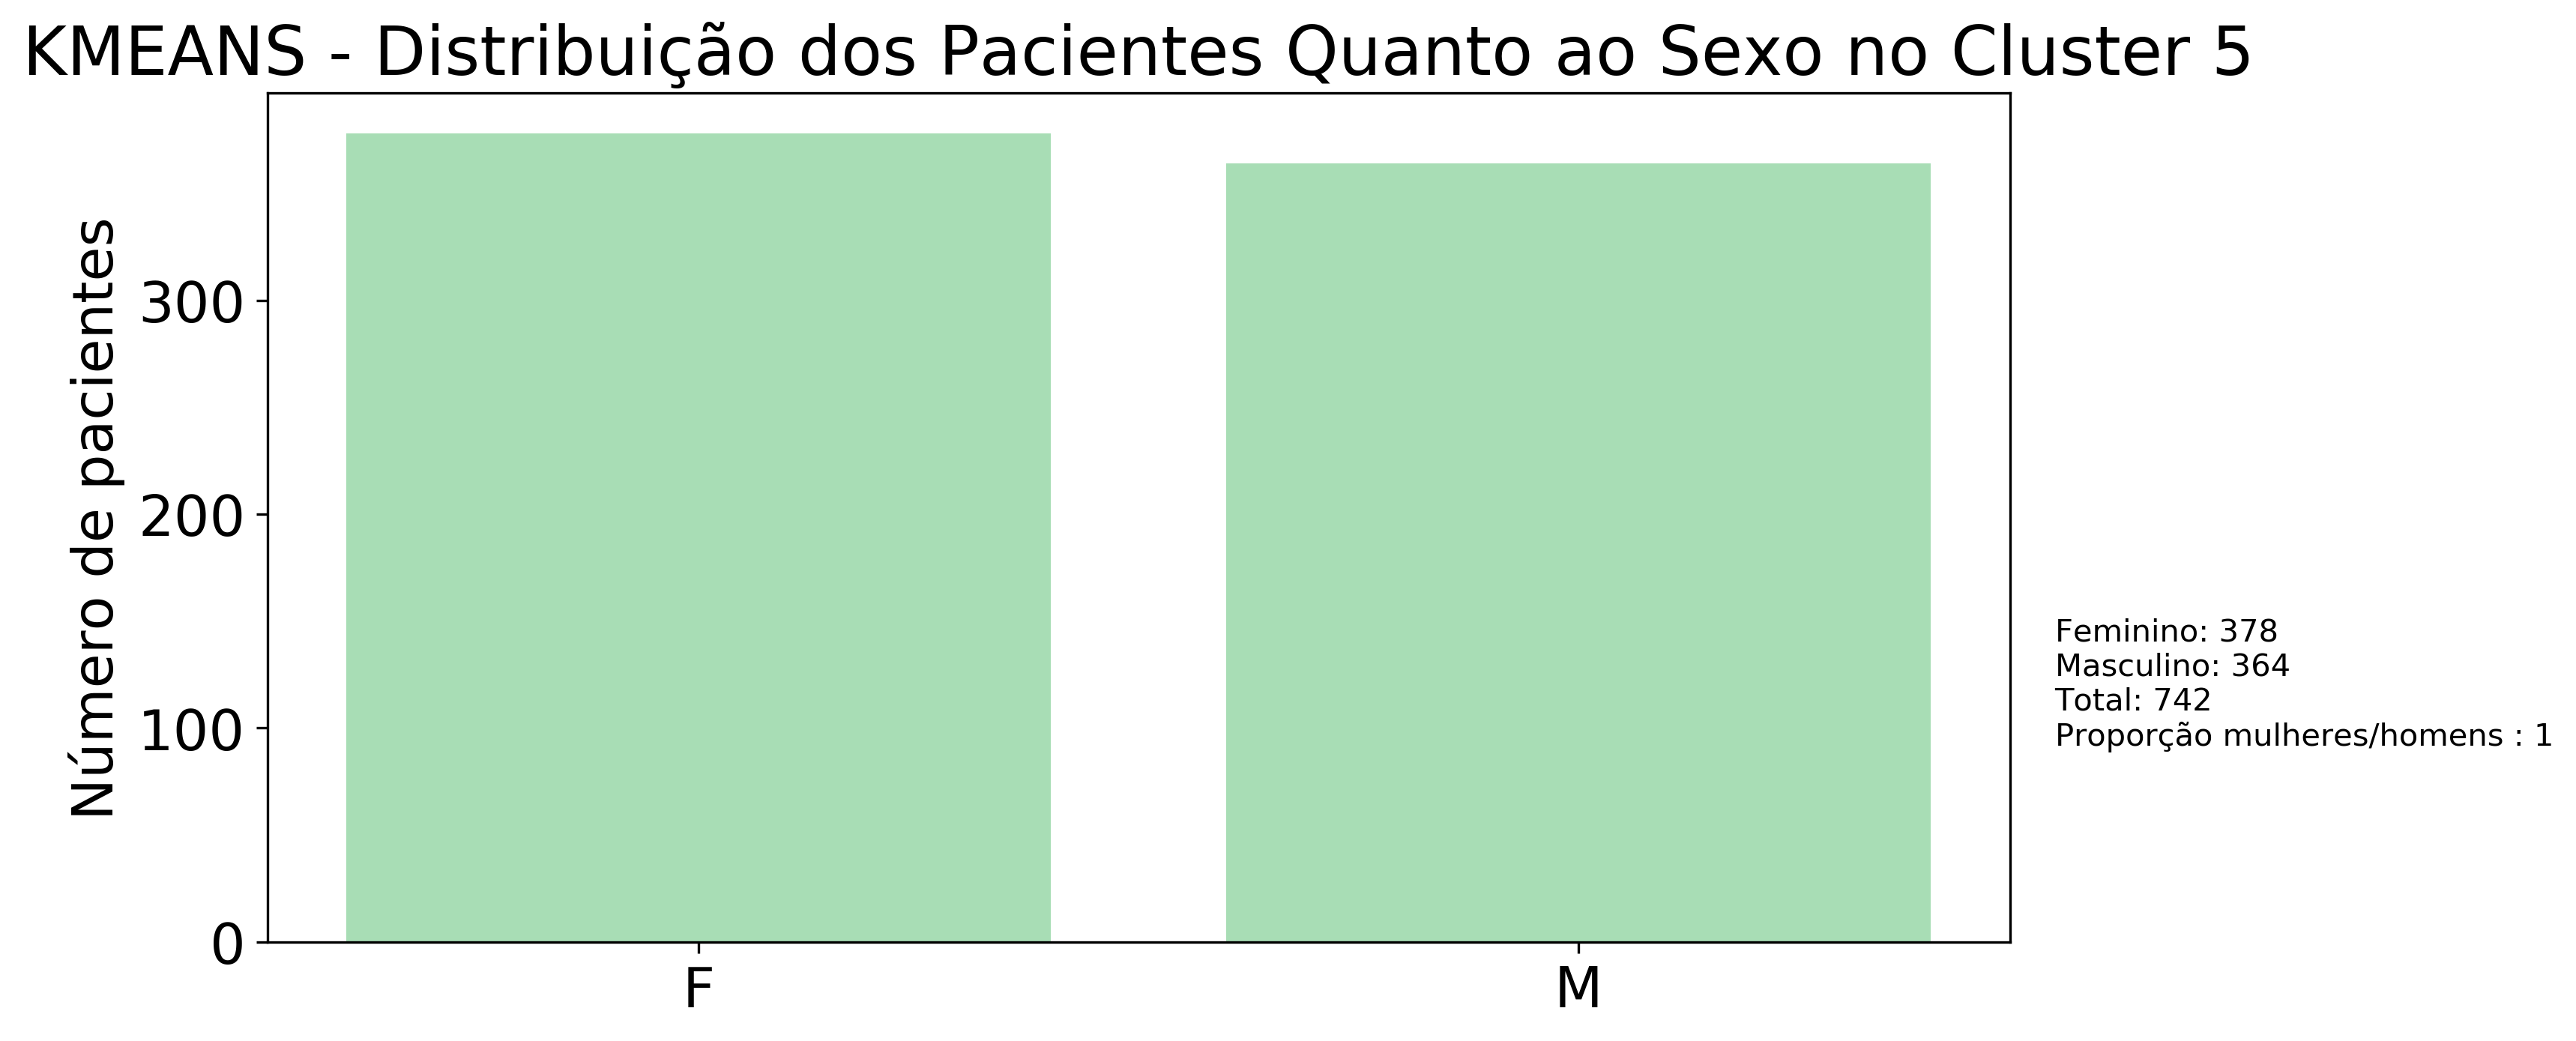

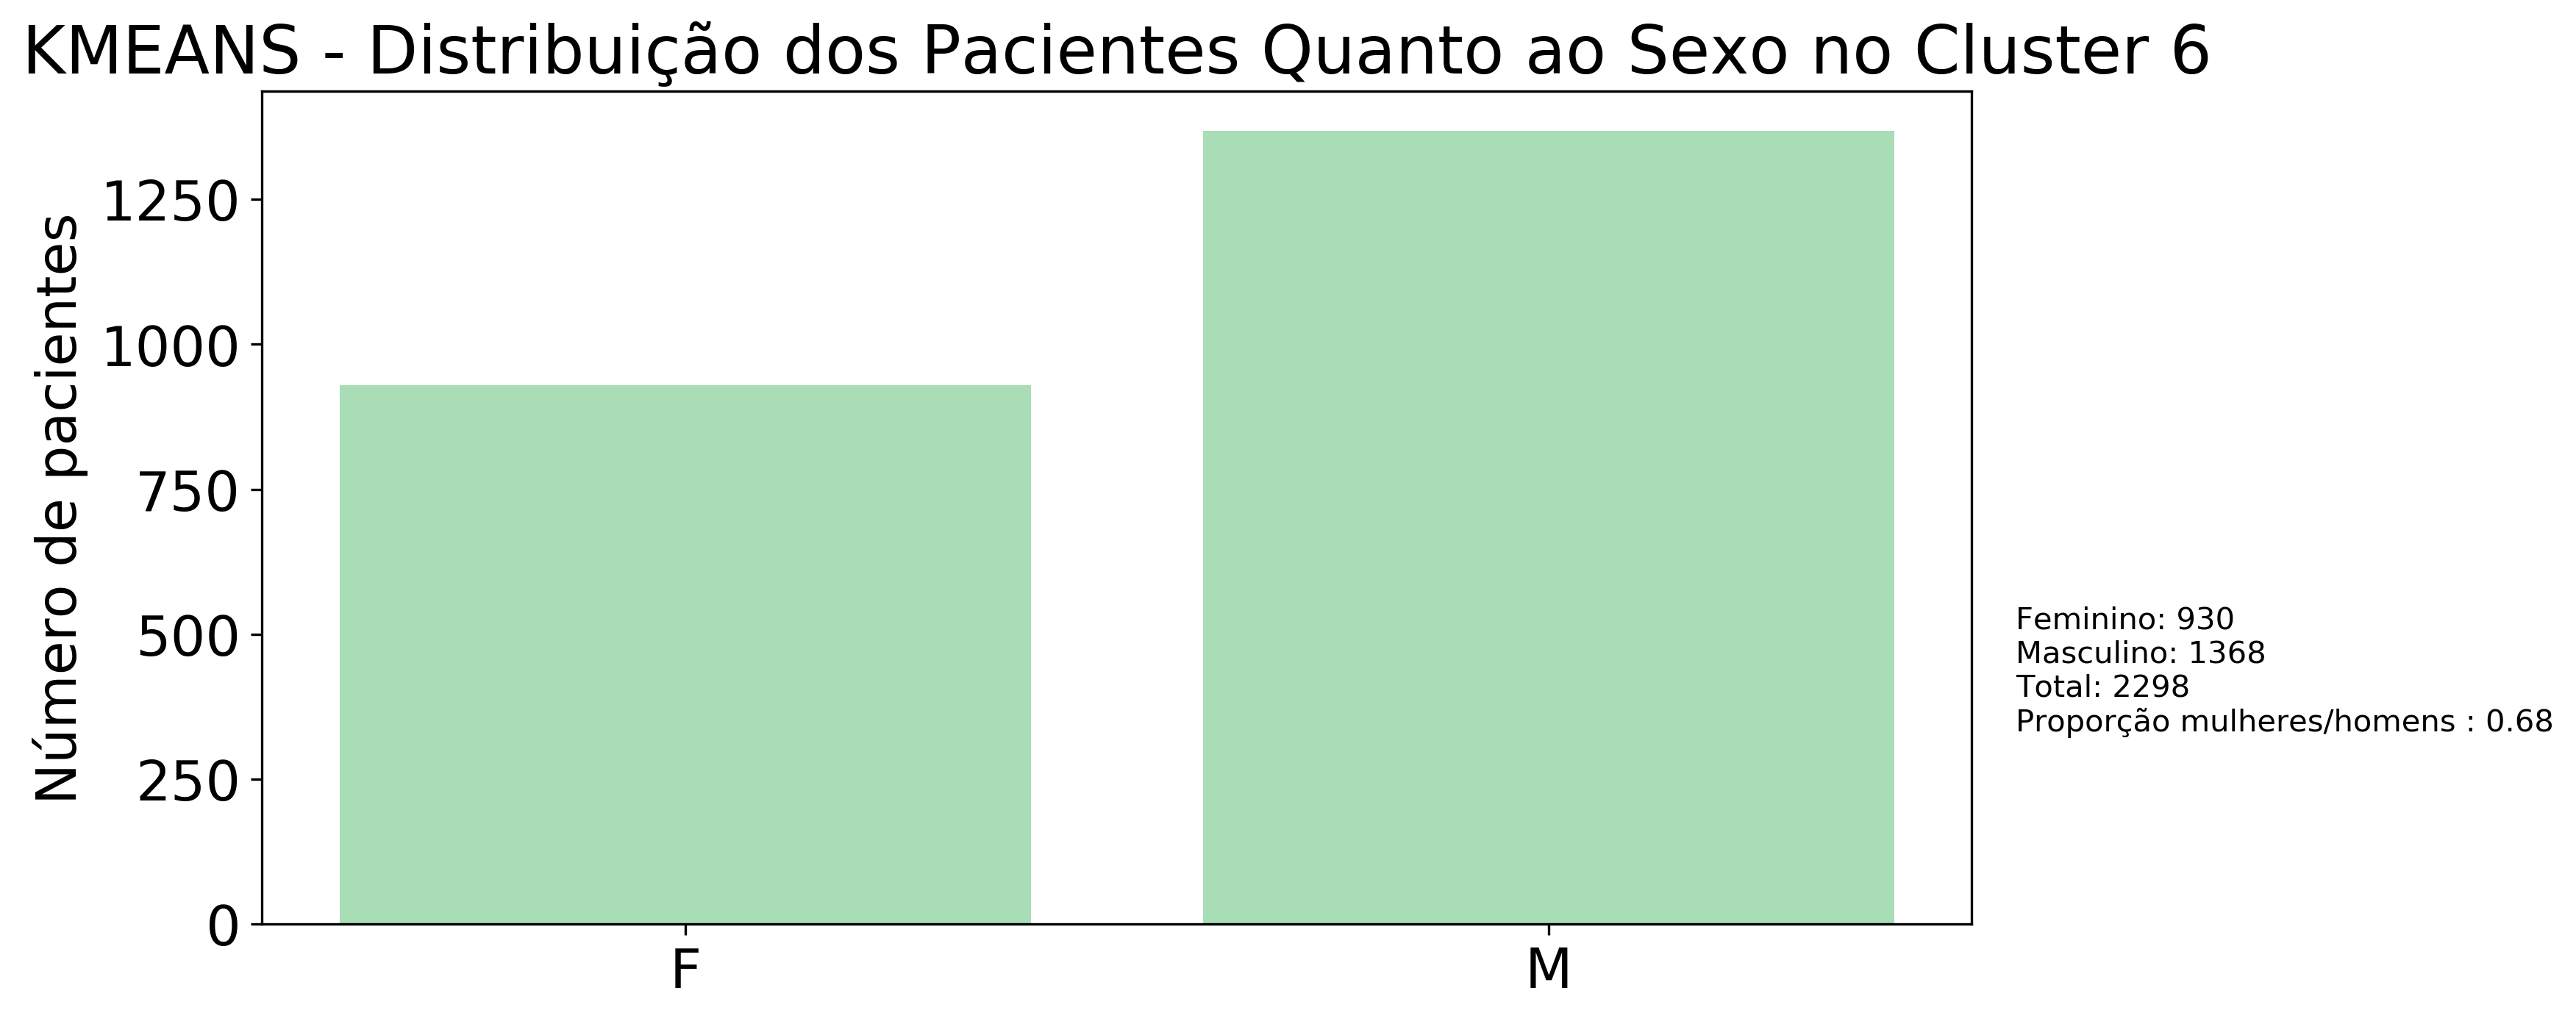

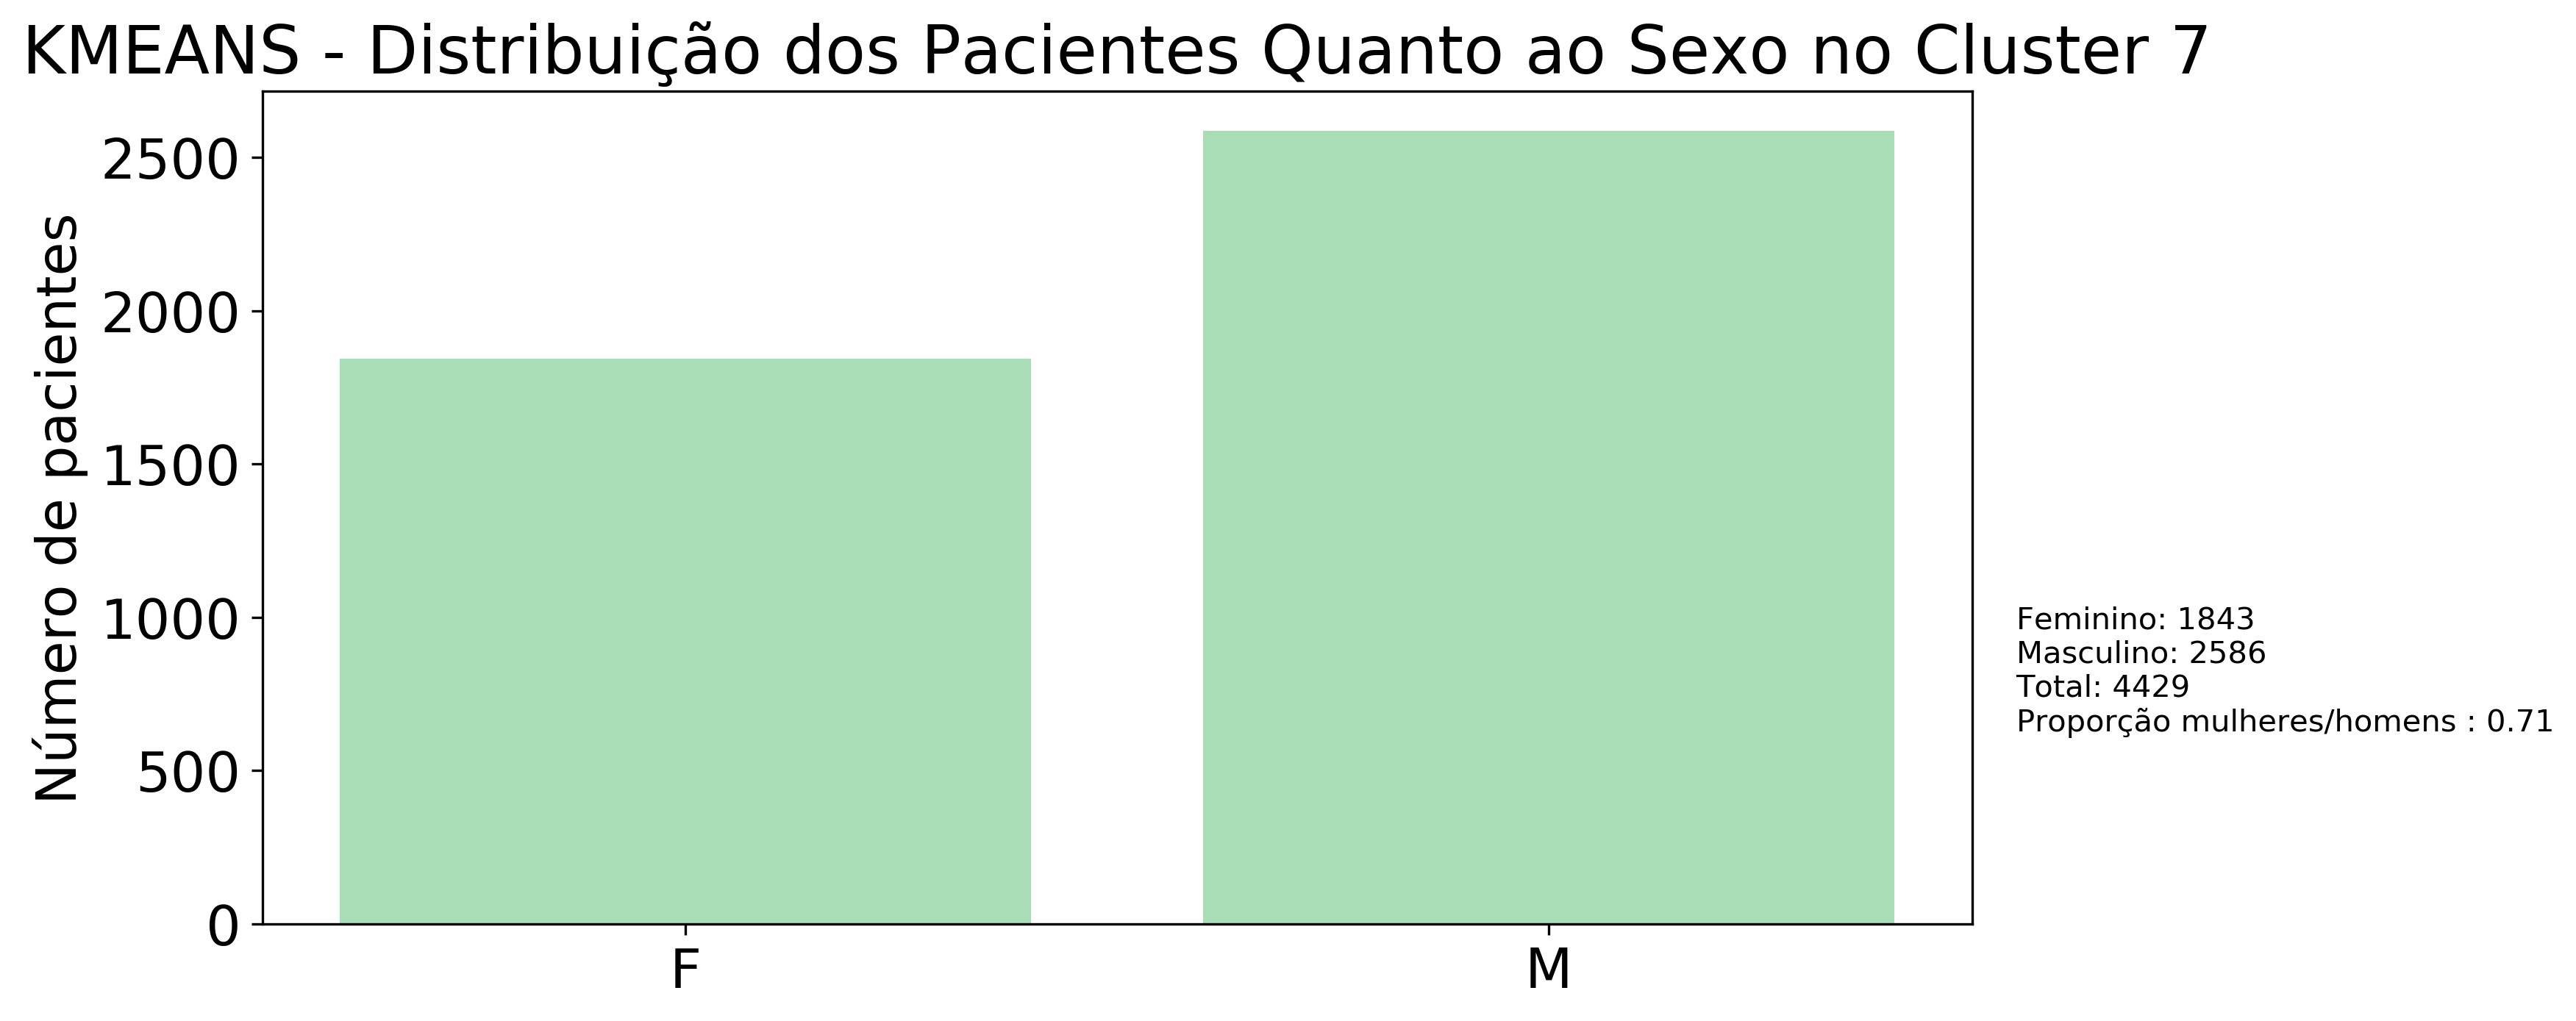

In [126]:
# Plota gráfco de barras 

try:    
    def plota_histograma_genero(dados,grupo):
        gender = dados['genero'].value_counts()
        gender = gender[["F", "M"]]
        #
        # cores bacanas:  #a8ddb5     #D7FBD9
        plt.bar(gender.index,gender, color="#a8ddb5")
        plt.gca().set(title=f'{algoritmo.upper()} - Distribuição dos Pacientes Quanto ao Sexo no Cluster {grupo}', 
                      ylabel='Número de pacientes')
        legenda = f"Feminino: {gender['F']:n}\nMasculino: {gender['M']:n}"
        # Os operadores aumentados '+=', '-=', etc... fazem uma operação com, e 
        #guardam o resultado de volta, na variável da esquerda: a = 10; a += 5 , resulta em a == 15
        legenda += f"\nTotal: {gender['F'] + gender['M']}"
        legenda += "\n" + f"Proporção mulheres/homens : { gender['F'] / gender['M']:.02n}"
        plt.gcf().text(0.92, 0.3, legenda, fontsize=10)
        plt.savefig(DIR_GRAFICOS / "grafico_sexo" / f"grafico_distribuicao_sexo_cluster{grupo}.png", bbox_inches='tight')
        plt.show()

    for grupo in range(len(abordagem_medidas)):
        plota_histograma_genero(abordagem_medidas[grupo],grupo + 1)

except:
    pass

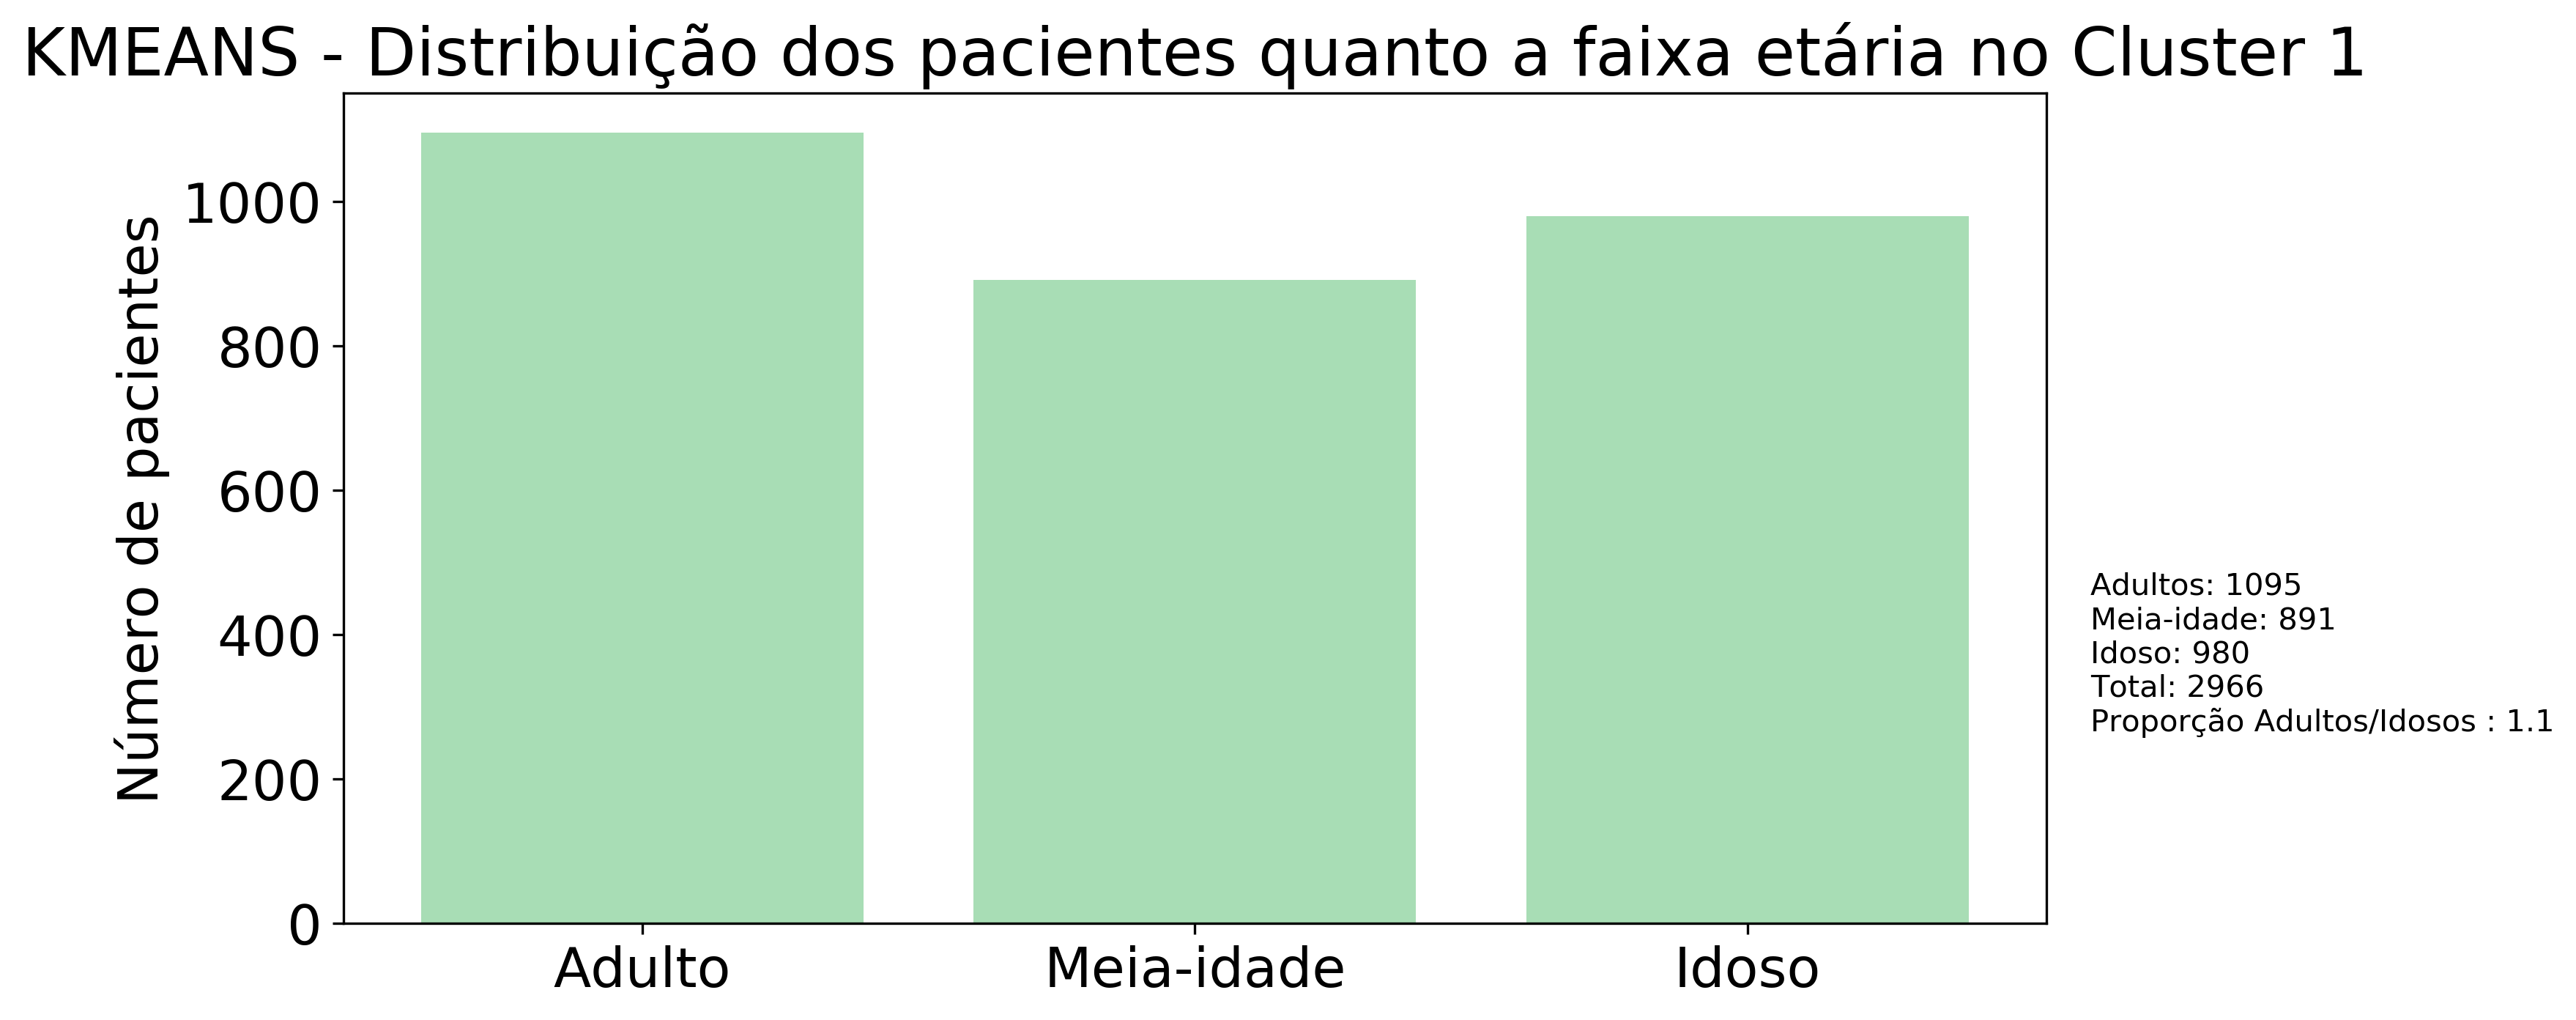

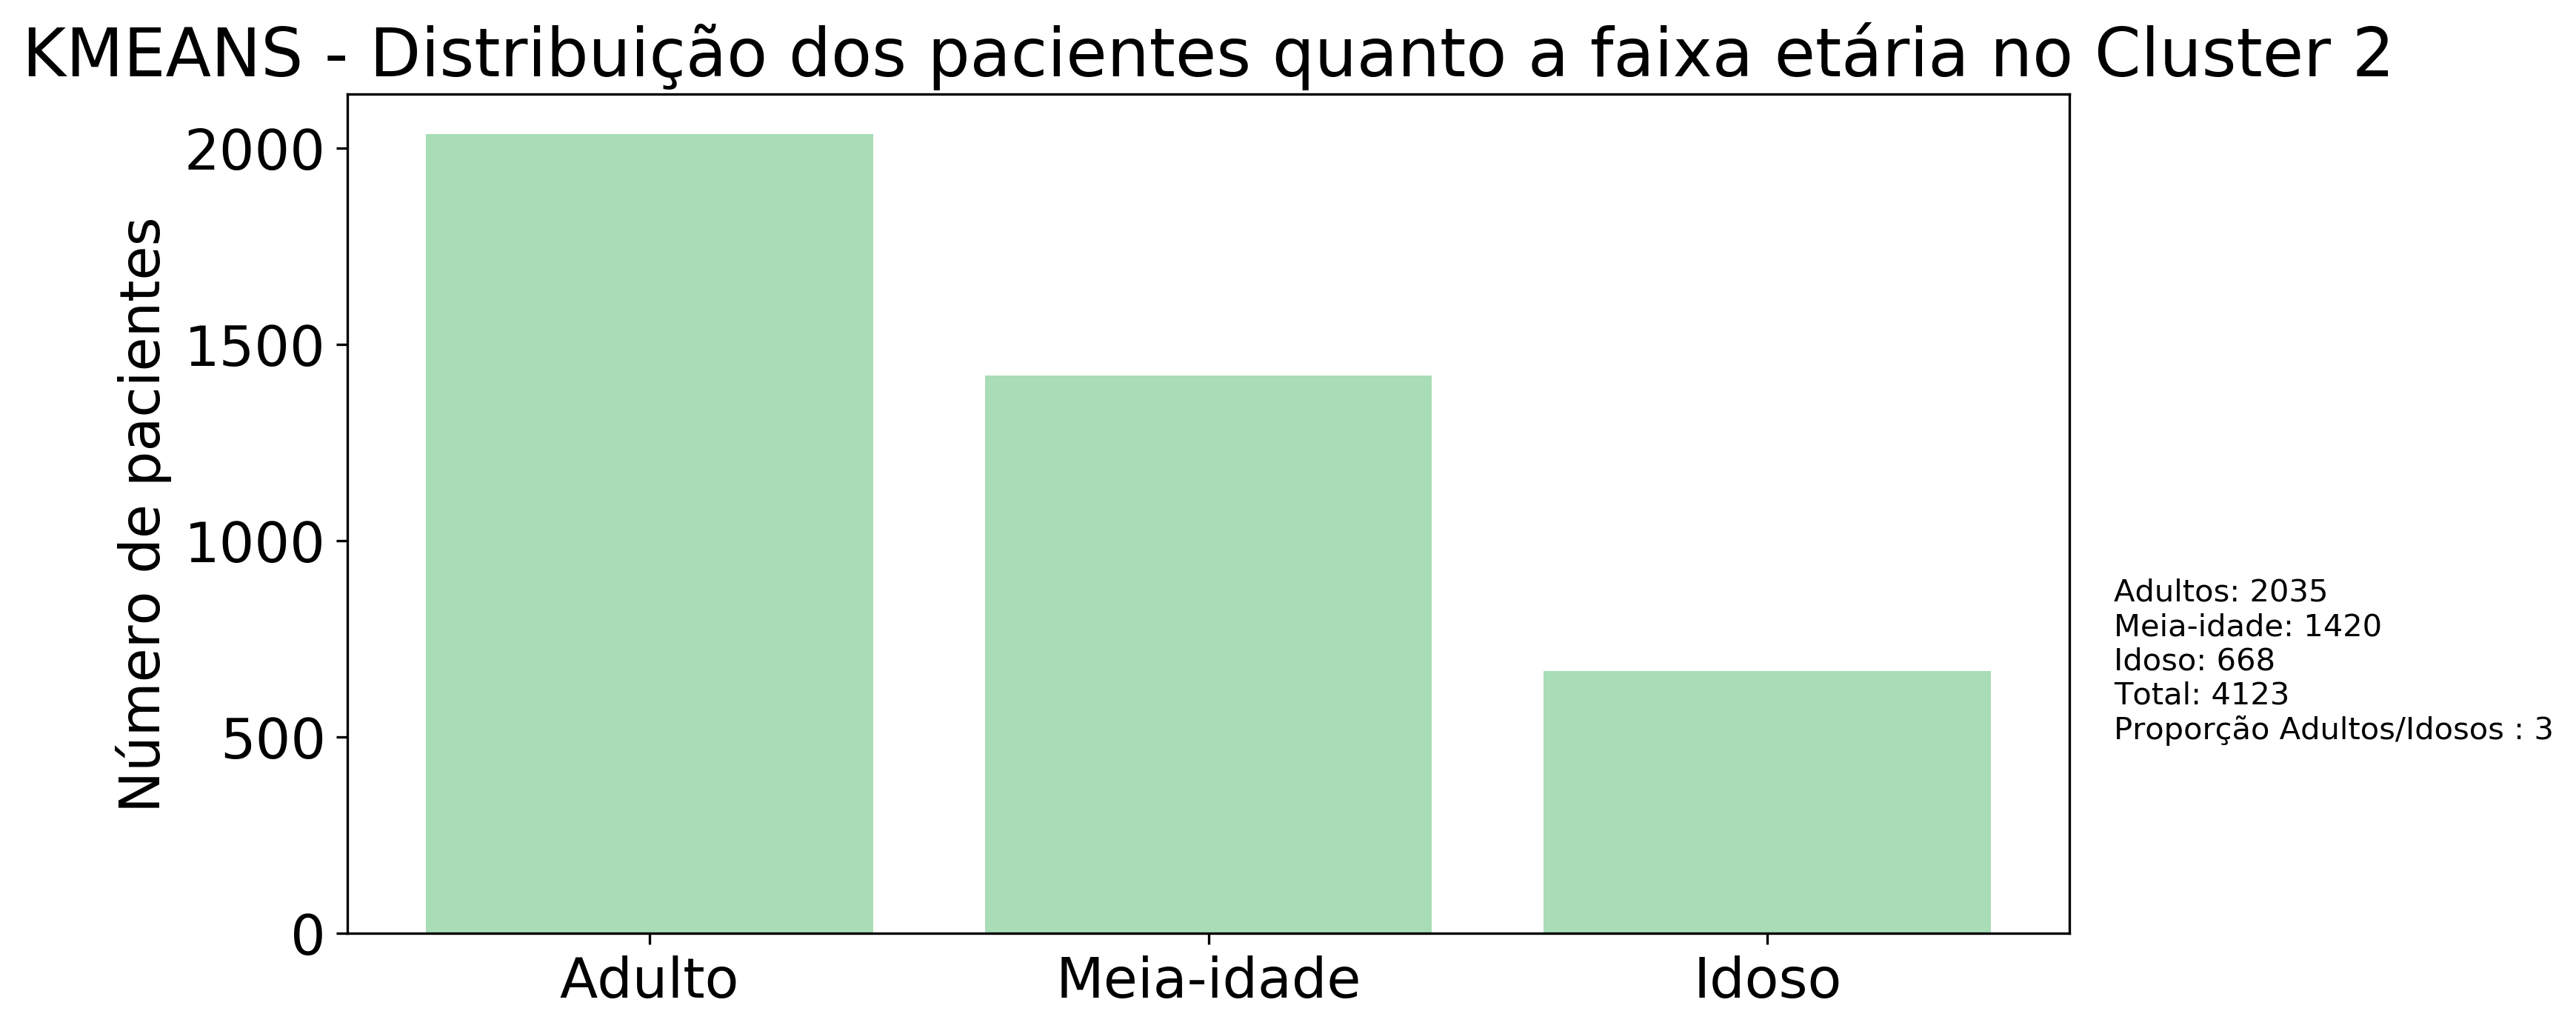

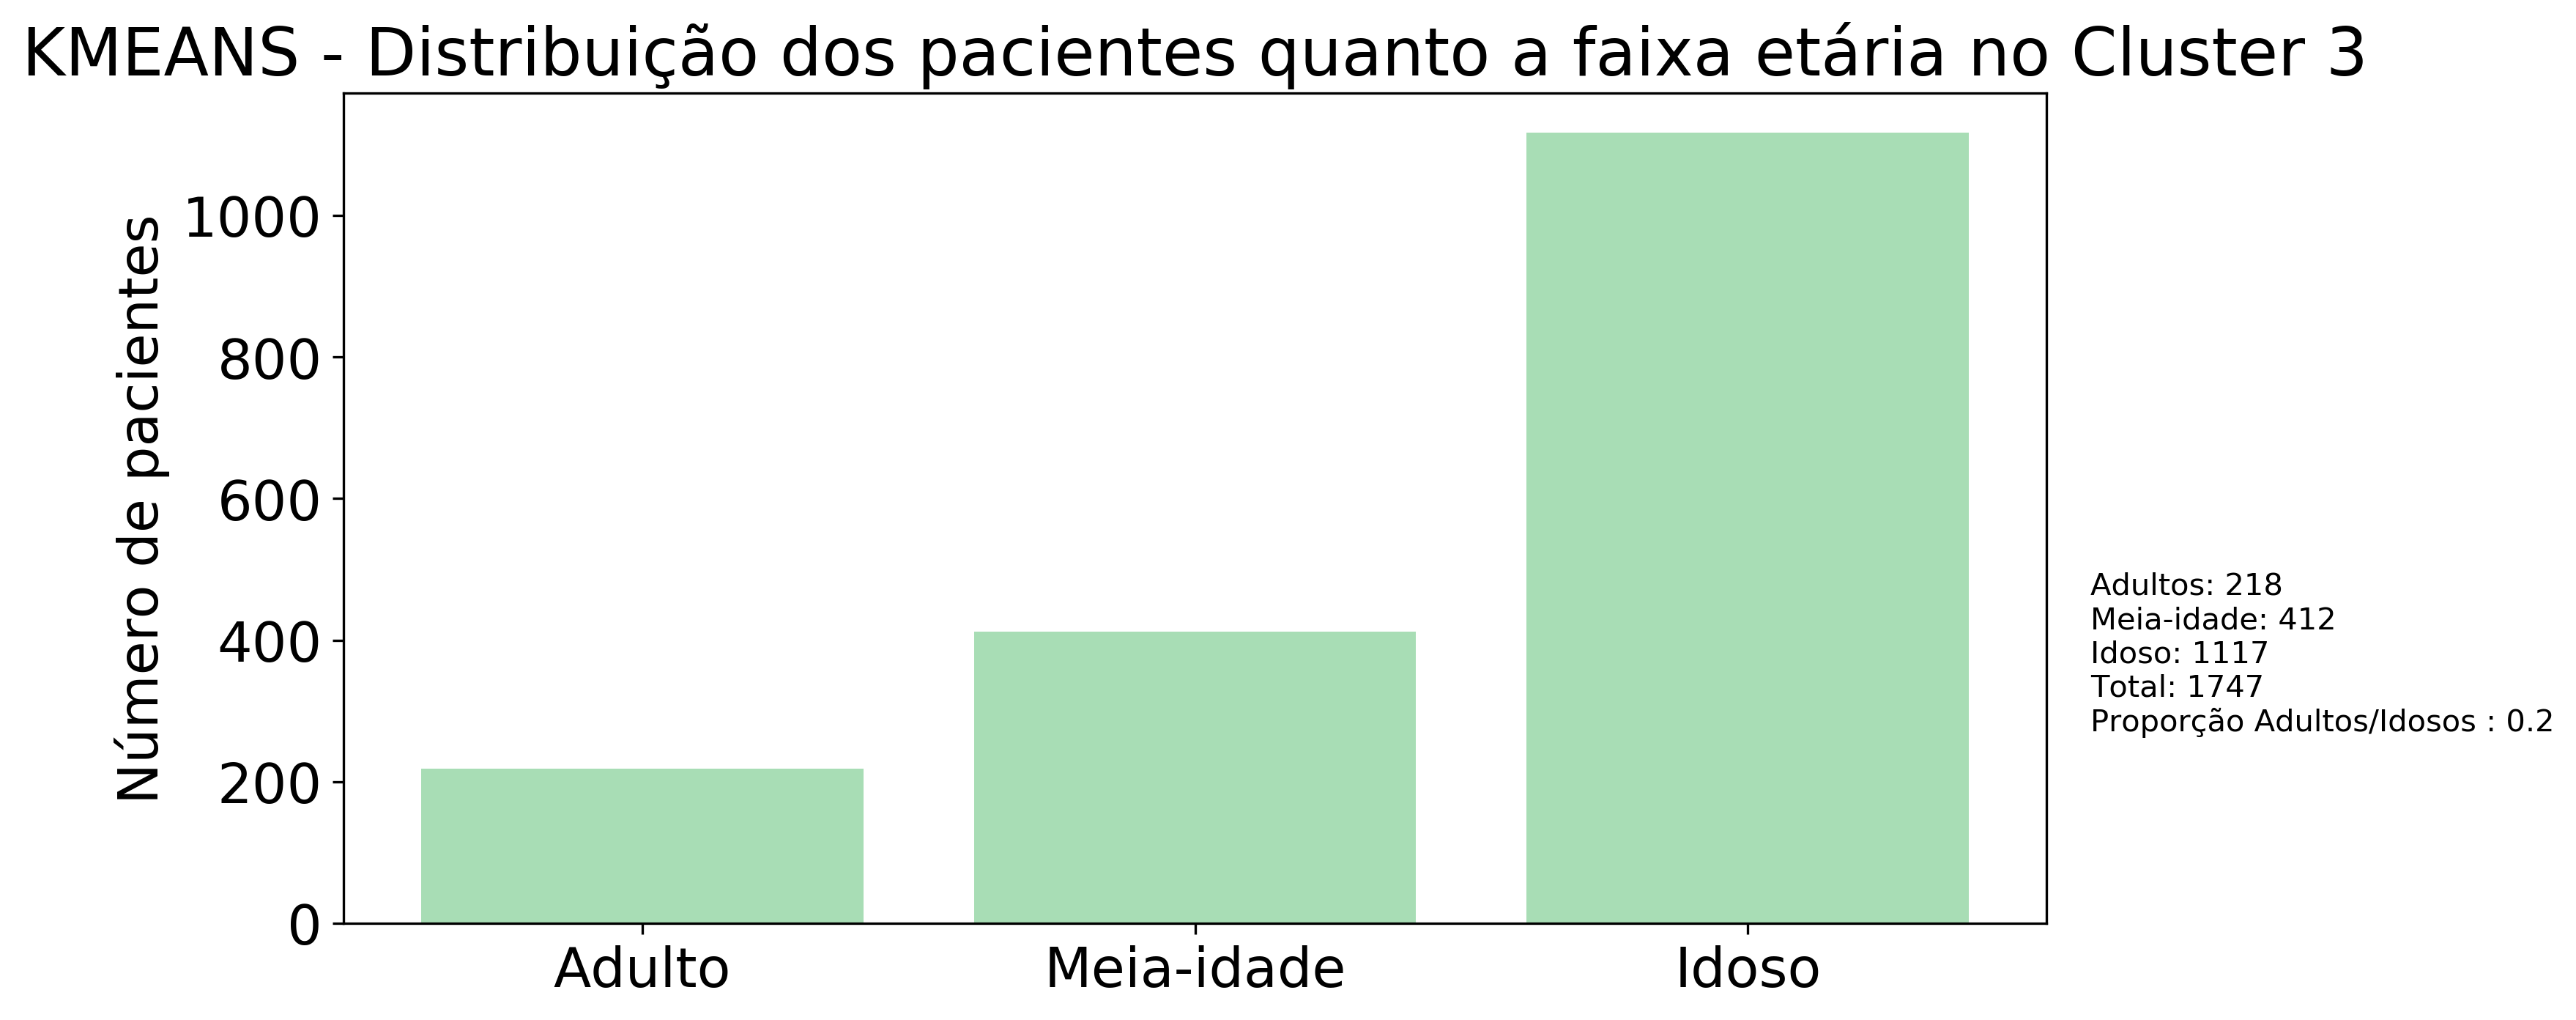

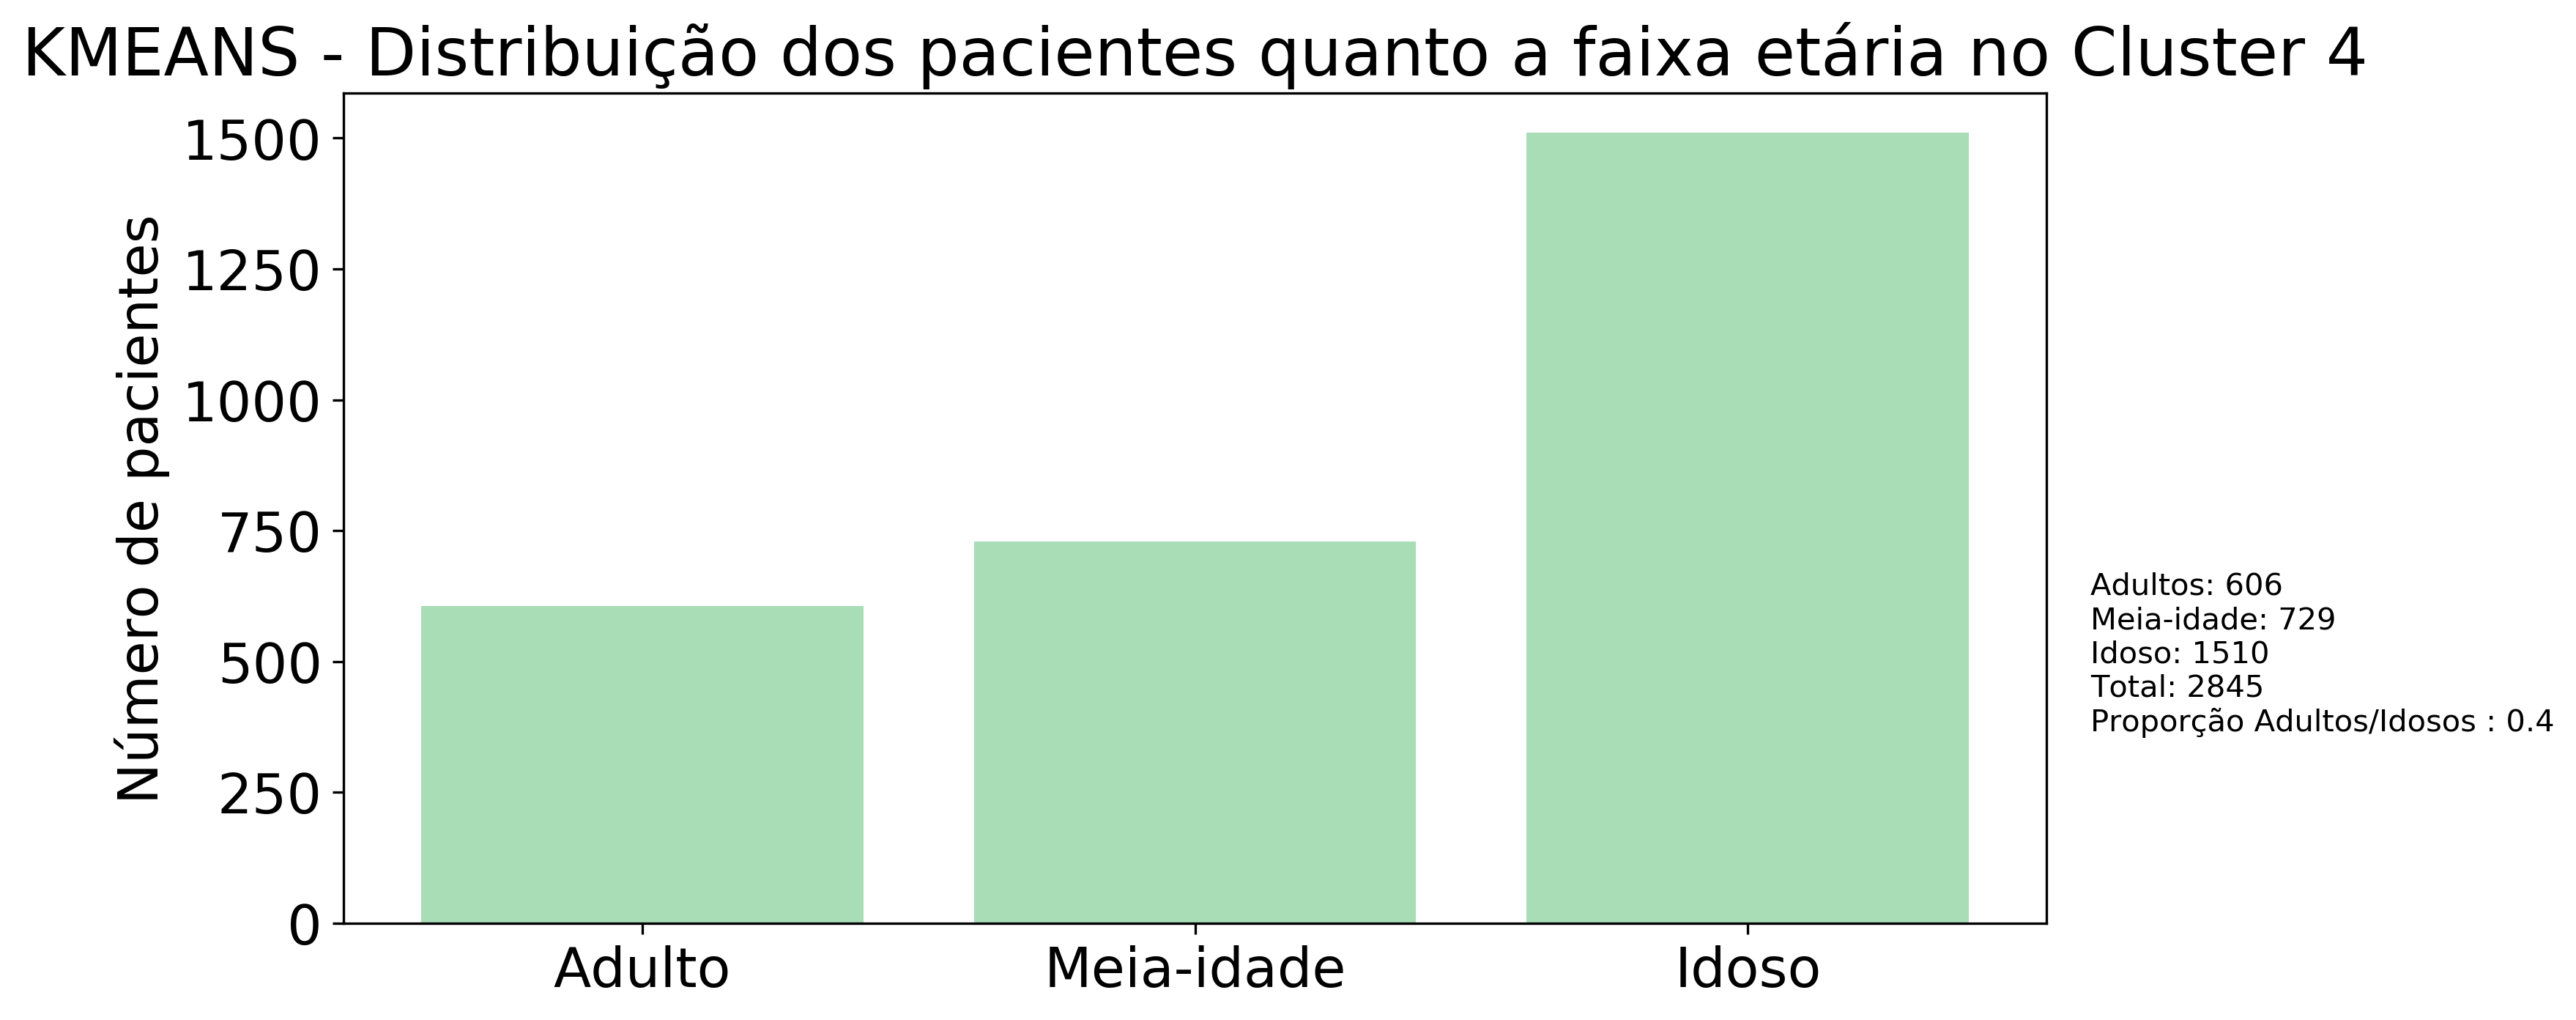

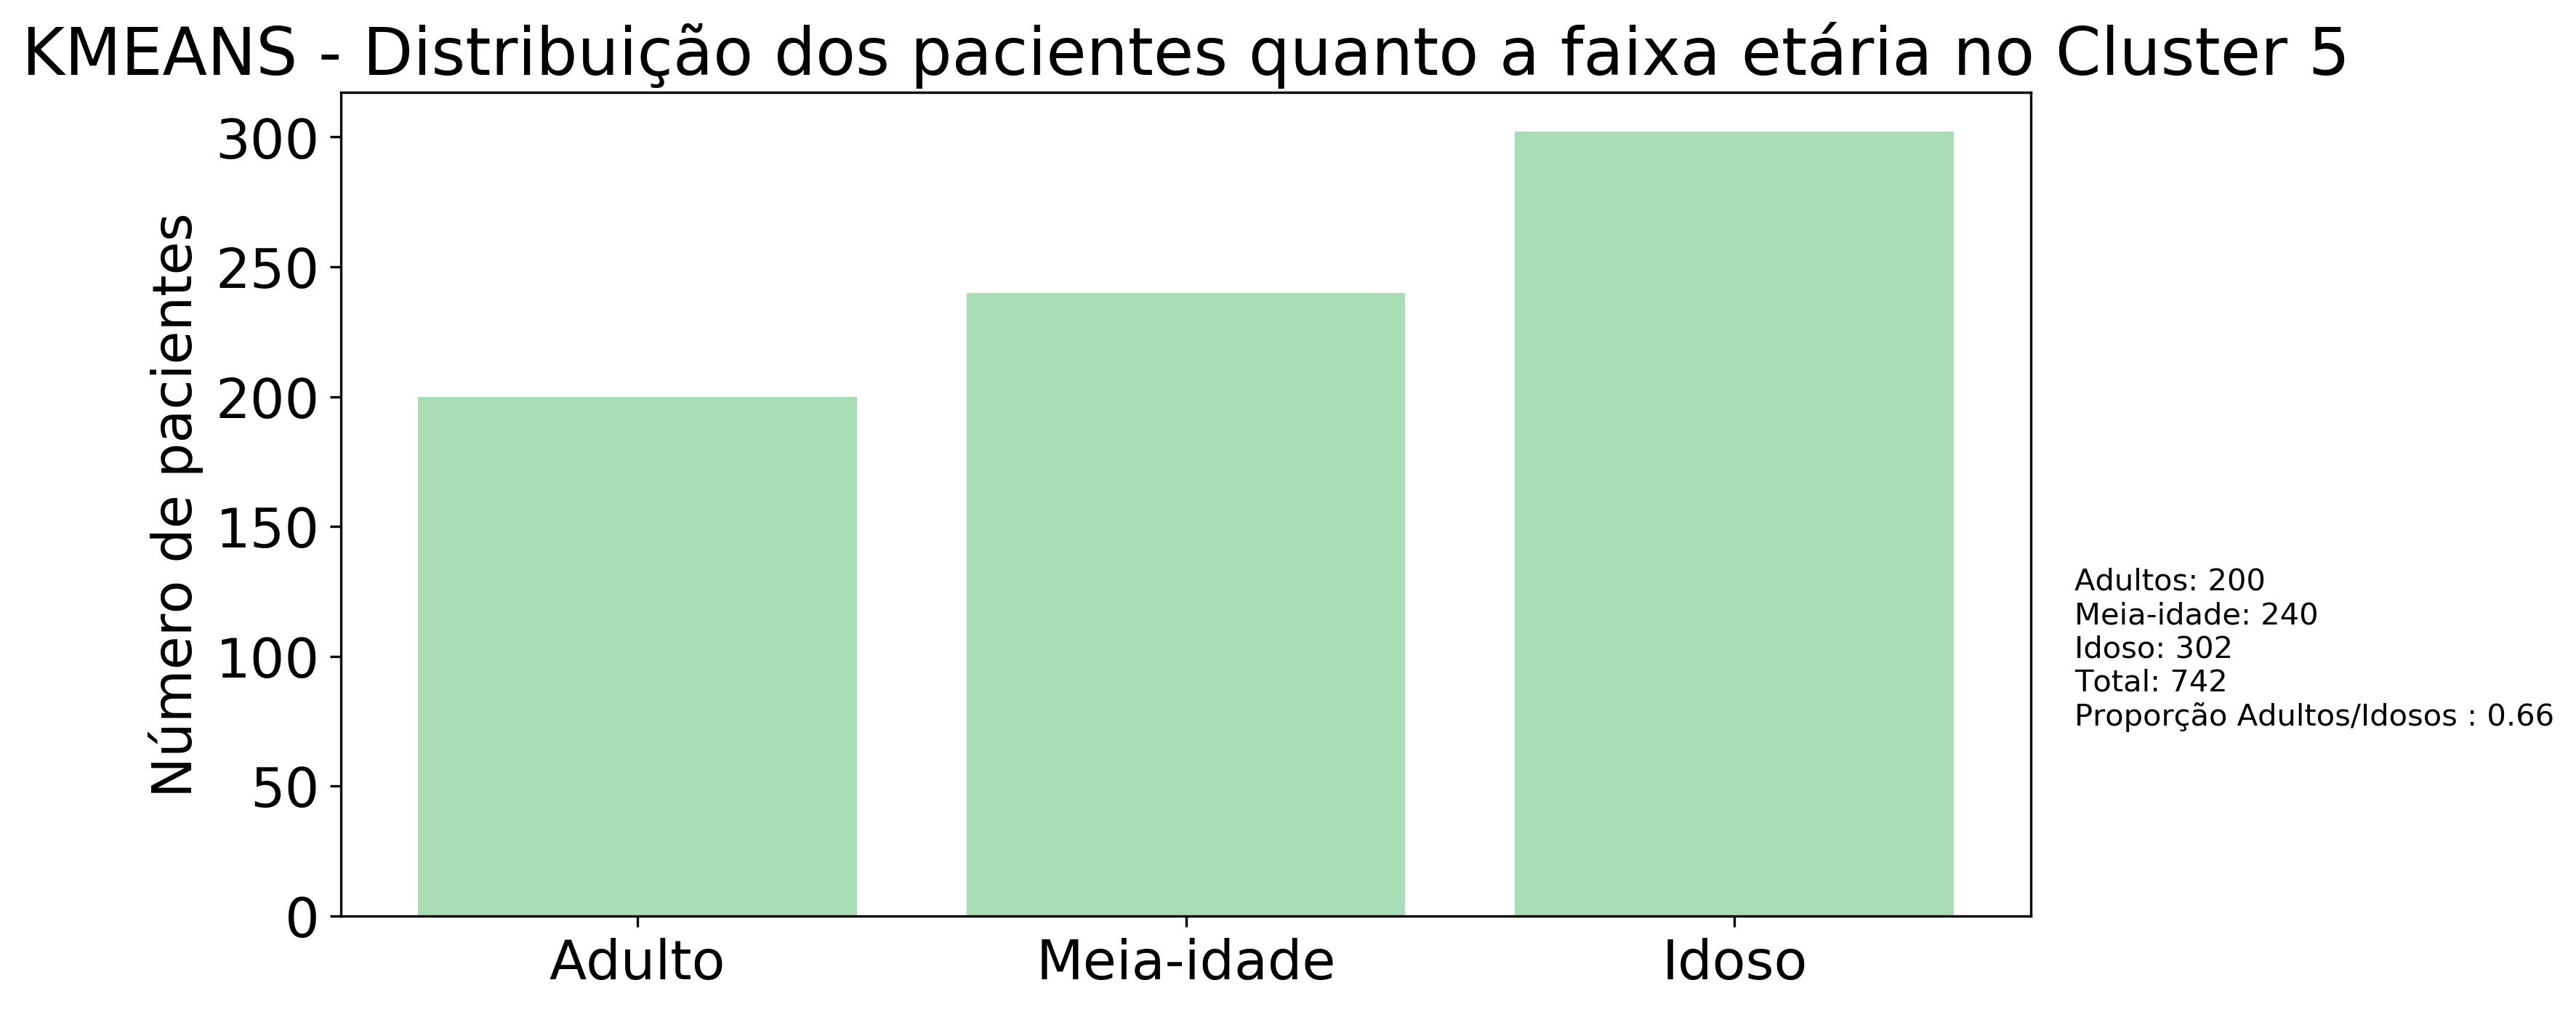

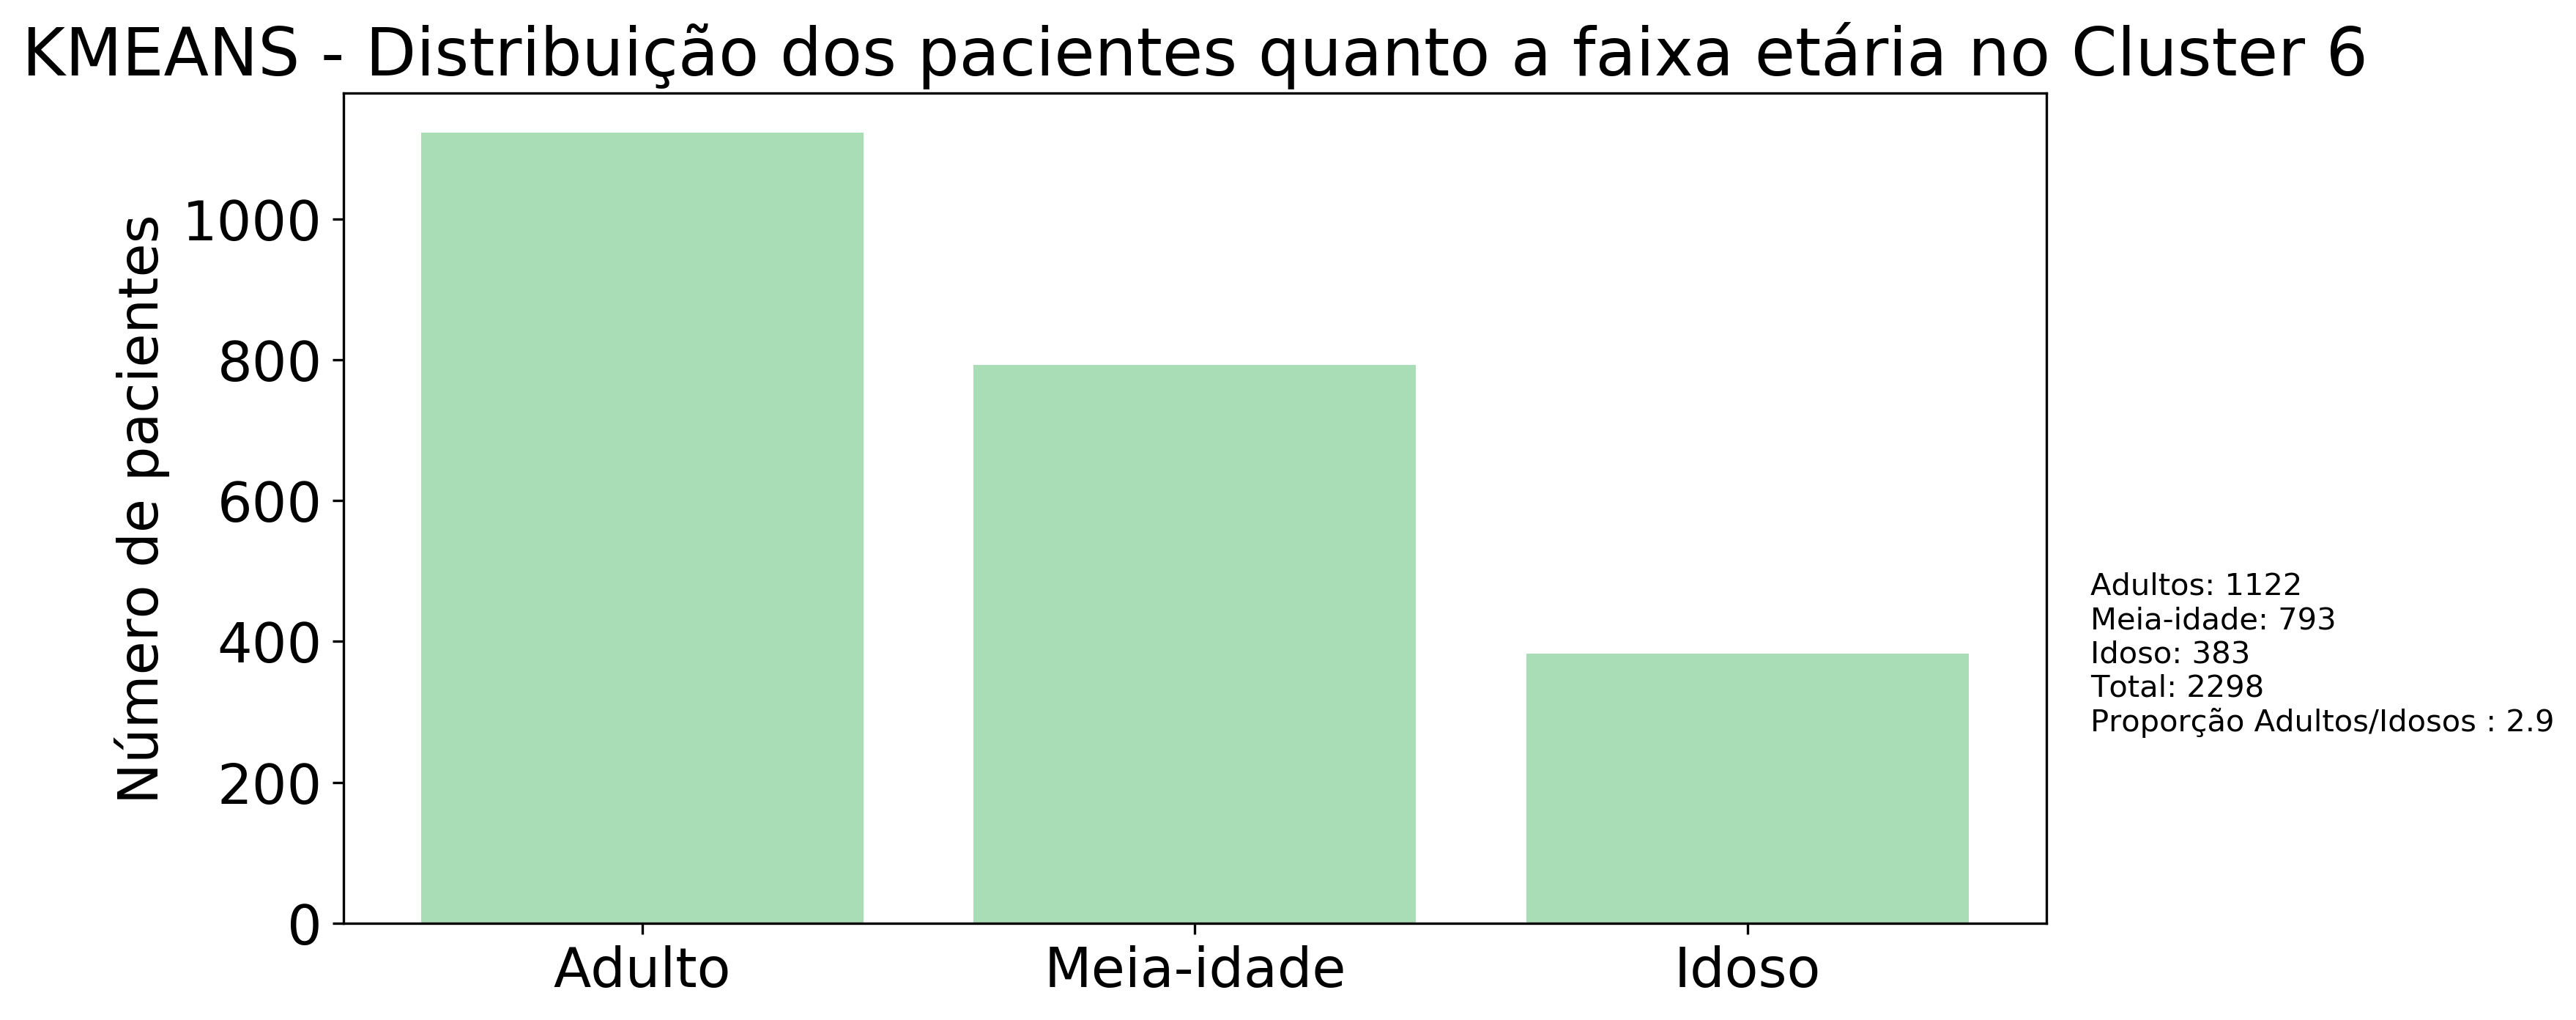

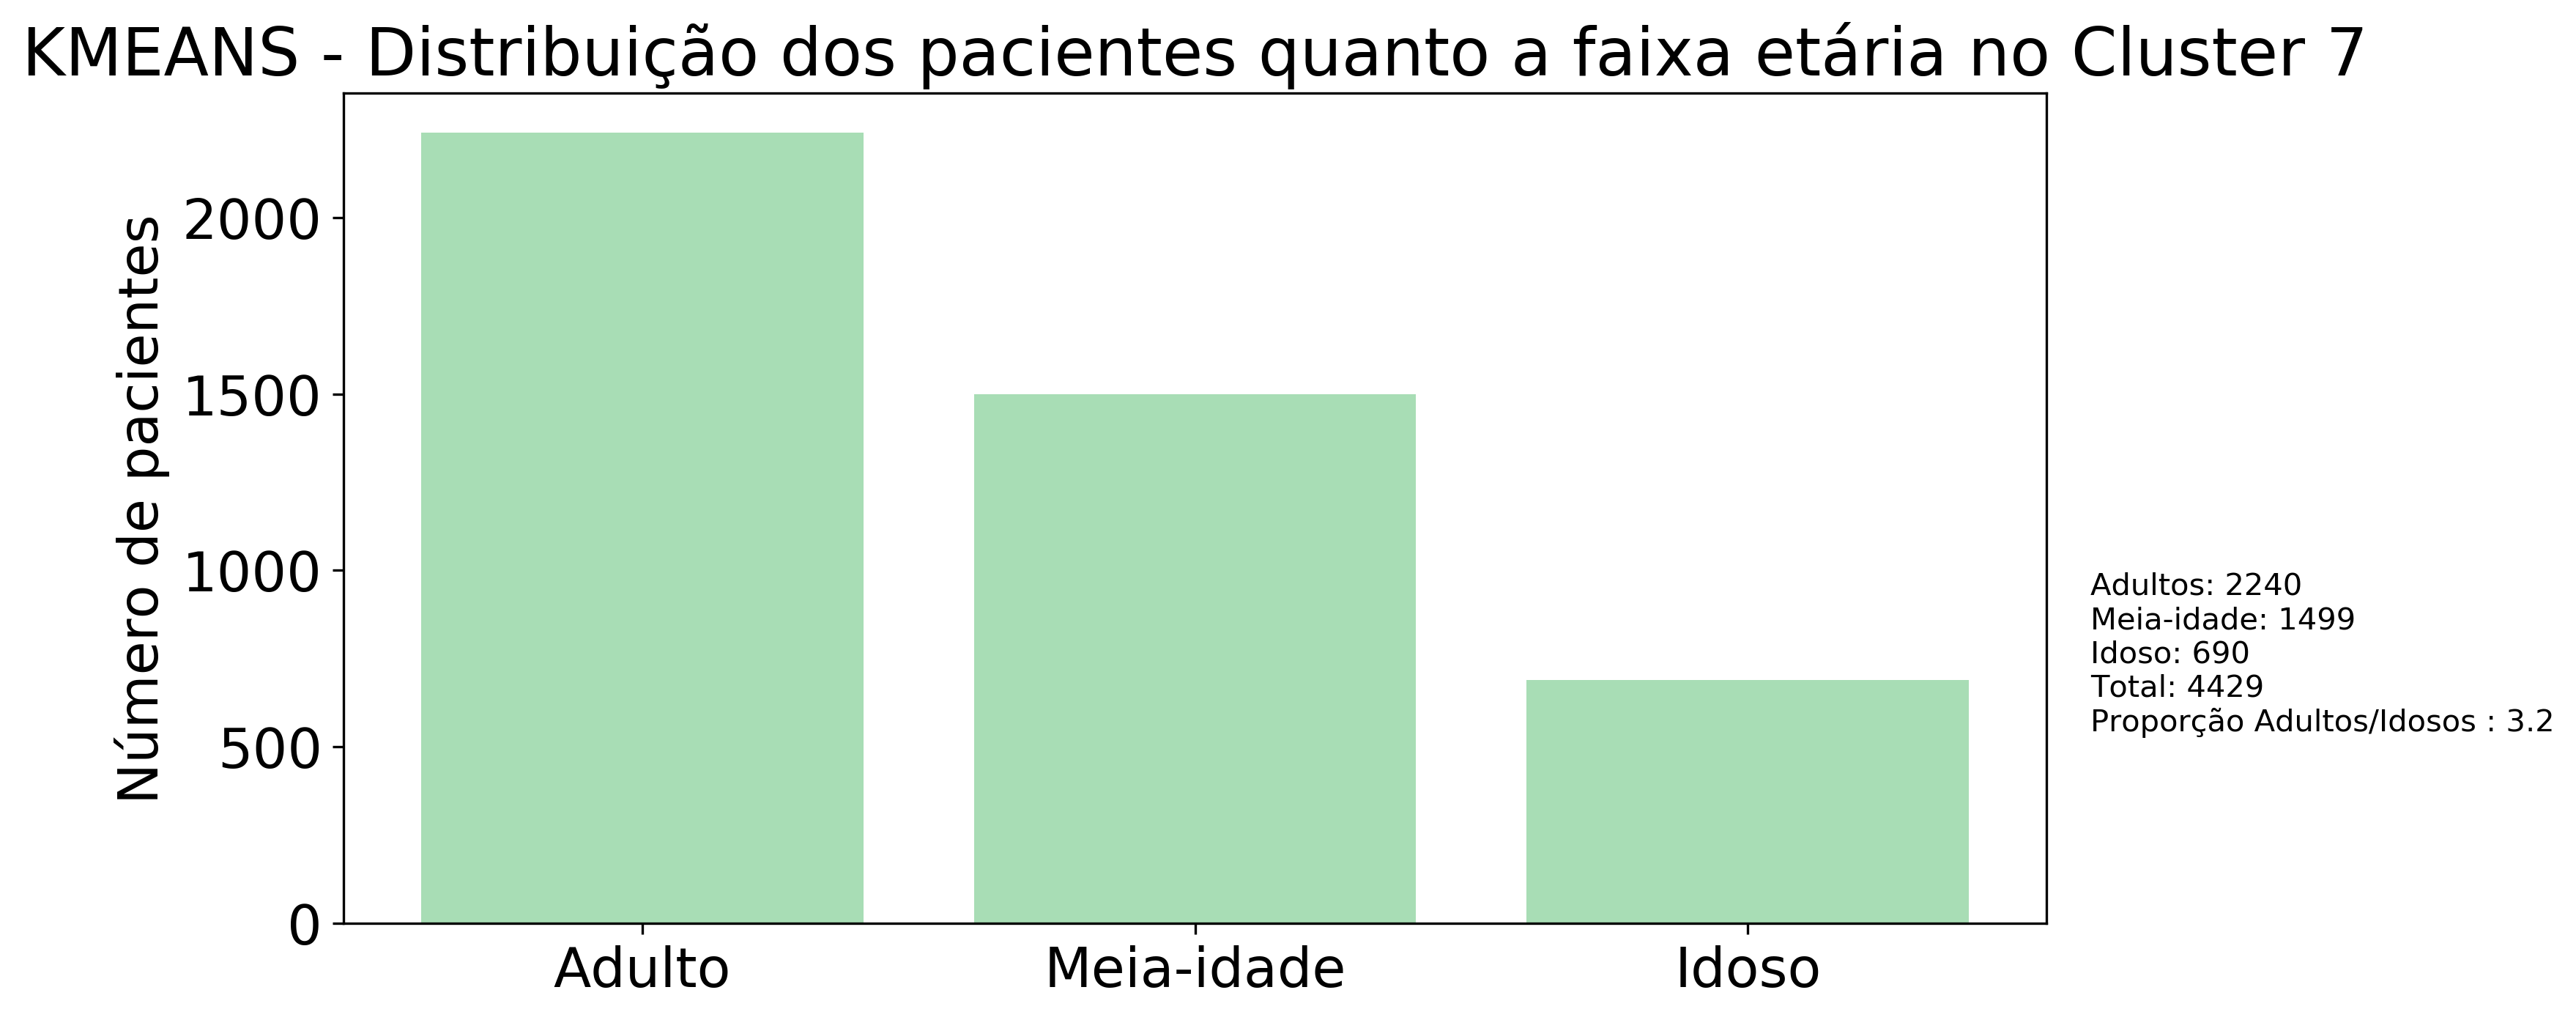

In [127]:
#########################################################################################################
#    mesma proporção eixo X
#    aumentar tamanho da legenda
#
def faixas_etarias(idade):
    #classes = ["Adultos","Idoso"]
    #intervalos = [(0, 65),(65, 200)]
    classes = ["Adulto","Meia-idade","Idoso"]
    intervalos = [(0, 50),(50, 65),(65, 200)]
    #classes = ["Jovens","Adultos","Meia-idade","Idoso", "Ancião","Velhice extrema"]
    #intervalos = [(0, 20),(20, 45),(45, 60),(60, 75),(75, 90),(90, 200)]
    
    for faixa in range(len(classes)):
        if idade <= intervalos[faixa][1]:
            return classes[faixa]

try:    
    def plota_histograma_idade(dados,grupo):
        faixa_idade = dados['idade']
        faixa_idade = faixa_idade.apply(faixas_etarias)
        faixa_idade = faixa_idade.value_counts()
        faixa_idade = faixa_idade[['Adulto', 'Meia-idade','Idoso']]
        plt.bar(faixa_idade.index,faixa_idade, color="#a8ddb5")
        plt.gca().set(title=f'{algoritmo.upper()} - Distribuição dos pacientes quanto a faixa etária no Cluster {grupo}', 
                      ylabel='Número de pacientes')
        legenda = f"Adultos: {faixa_idade['Adulto']:n}\nMeia-idade: {faixa_idade['Meia-idade']:n}\nIdoso: {faixa_idade['Idoso']:n}"
        #legenda = f"Adultos: {faixa_idade['Adultos']:n}\nIdoso: {faixa_idade['Idoso']:n}"
        # Os operadores aumentados '+=', '-=', etc... fazem uma operação com, e guardam o resultado de volta, 
        # na variável da esquerda: a = 10; a += 5 , resulta em a == 15
        legenda += f"\nTotal: {faixa_idade['Adulto'] + faixa_idade['Meia-idade'] + faixa_idade['Idoso']}"
        legenda += "\n" + f"Proporção Adultos/Idosos : { faixa_idade['Adulto'] / faixa_idade['Idoso']:.02n}"
        plt.gcf().text(0.92, 0.3, legenda, fontsize=10)
        plt.savefig(DIR_GRAFICOS / "grafico_idade" / f"grafico_distribuicao_idade_cluster{grupo}.png", bbox_inches='tight')
        plt.show()
        

    for grupo in range(len(abordagem_medidas)):
        plota_histograma_idade(abordagem_medidas[grupo],grupo + 1)
except:
    pass

In [128]:
abordagem_medidas[grupo]

numero_identificacao data_nascimento genero  idade   peso altura   IMC  \
0                       19      1981-12-16      M   37.0   85.0    164  31.6   
1                       24      1980-01-19      F   38.0   85.0    170  29.4   
2                       27      1990-05-26      M   28.0  140.0    177  44.7   
3                       30      1955-06-17      M   63.0   68.0    164  25.3   
4                       40      1962-01-01      M   56.0   85.0   1,77  27.1   
...                    ...             ...    ...    ...    ...    ...   ...   
4424                 21757      1990-05-25      F   30.0   70.0   1,55  29.1   
4425                 21766      1967-12-19      M   52.0   78.0   1,74  25.8   
4426                 21767      1968-11-15      F   51.0   75.0    165  27.5   
4427                 21771      1972-12-11      F   47.0   63.0   1,58  25.2   
4428                 21793      1971-01-14      M   49.0   99.0    179  30.9   

      grupo           data_exame  sist 9:00  ...  Mediana Diastolica em 24h  \
0         7  2018-12-26 10:18:07      140.0  ...                       79.5   
1         7  2018-12-26 10:37:07      117.0  ...                       89.0   
2         7  2018-12-26 11:07:49      161.0  ...                       71.5   
3         7  2018-12-26 13:17:20      175.0  ...                       82.0   
4         7  2018-12-26 16:19:28      122.0  ...                       80.0   
...     ...                  ...        ...  ...                        ...   
4424      7  2020-09-10 11:08:52      137.0  ...                       85.0   
4425      7  2020-09-10 12:47:33      120.0  ...                       86.0   
4426      7  2020-09-10 13:30:24      120.0  ...                       90.0   
4427      7  2020-09-10 14:09:58      125.0  ...                       81.5   
4428      7  2020-09-10 17:42:01      111.0  ...                       86.0   

      AUC Sistolica em 24h  AUC Diastolica em 24h  AUC PP Daytime  \
0                   9837.0                 6359.5          3002.0   
1                   9809.5                 7159.5          2083.5   
2                  10322.0                 6062.0          3676.5   
3                   9891.0                 6817.0          2527.5   
4                   9861.5                 6198.0          3103.5   
...                    ...                    ...             ...   
4424               10287.5                 6830.0          2751.0   
4425               10063.5                 6821.5          2730.0   
4426               10111.0                 6892.5          2574.0   
4427               10659.0                 6608.0          3437.0   
4428                9812.0                 6746.5          2400.5   

      AUC PP Nighttime  DP Sistolica em 24h  DP Diastolica em 24h  \
0                470.0                13.82                 11.01   
1                532.5                 8.86                 10.18   
2                554.5                16.86                 10.93   
3                497.0                14.73                 13.62   
4                523.5                10.69                  8.57   
...                ...                  ...                   ...   
4424             635.0                11.67                  8.13   
4425             484.5                11.50                 11.34   
4426             601.5                12.73                 13.87   
4427             567.5                10.07                  7.81   
4428             612.0                13.92                 12.71   

      Picos Sistolica  Picos Diastolica  Diferença % Dipping  
0                  10                16             1.039121  
1                   3                38             1.016669  
2                  16                 8             1.128044  
3                  10                18             1.145149  
4                   5                 5             1.169982  
...               ...               ...                  ...

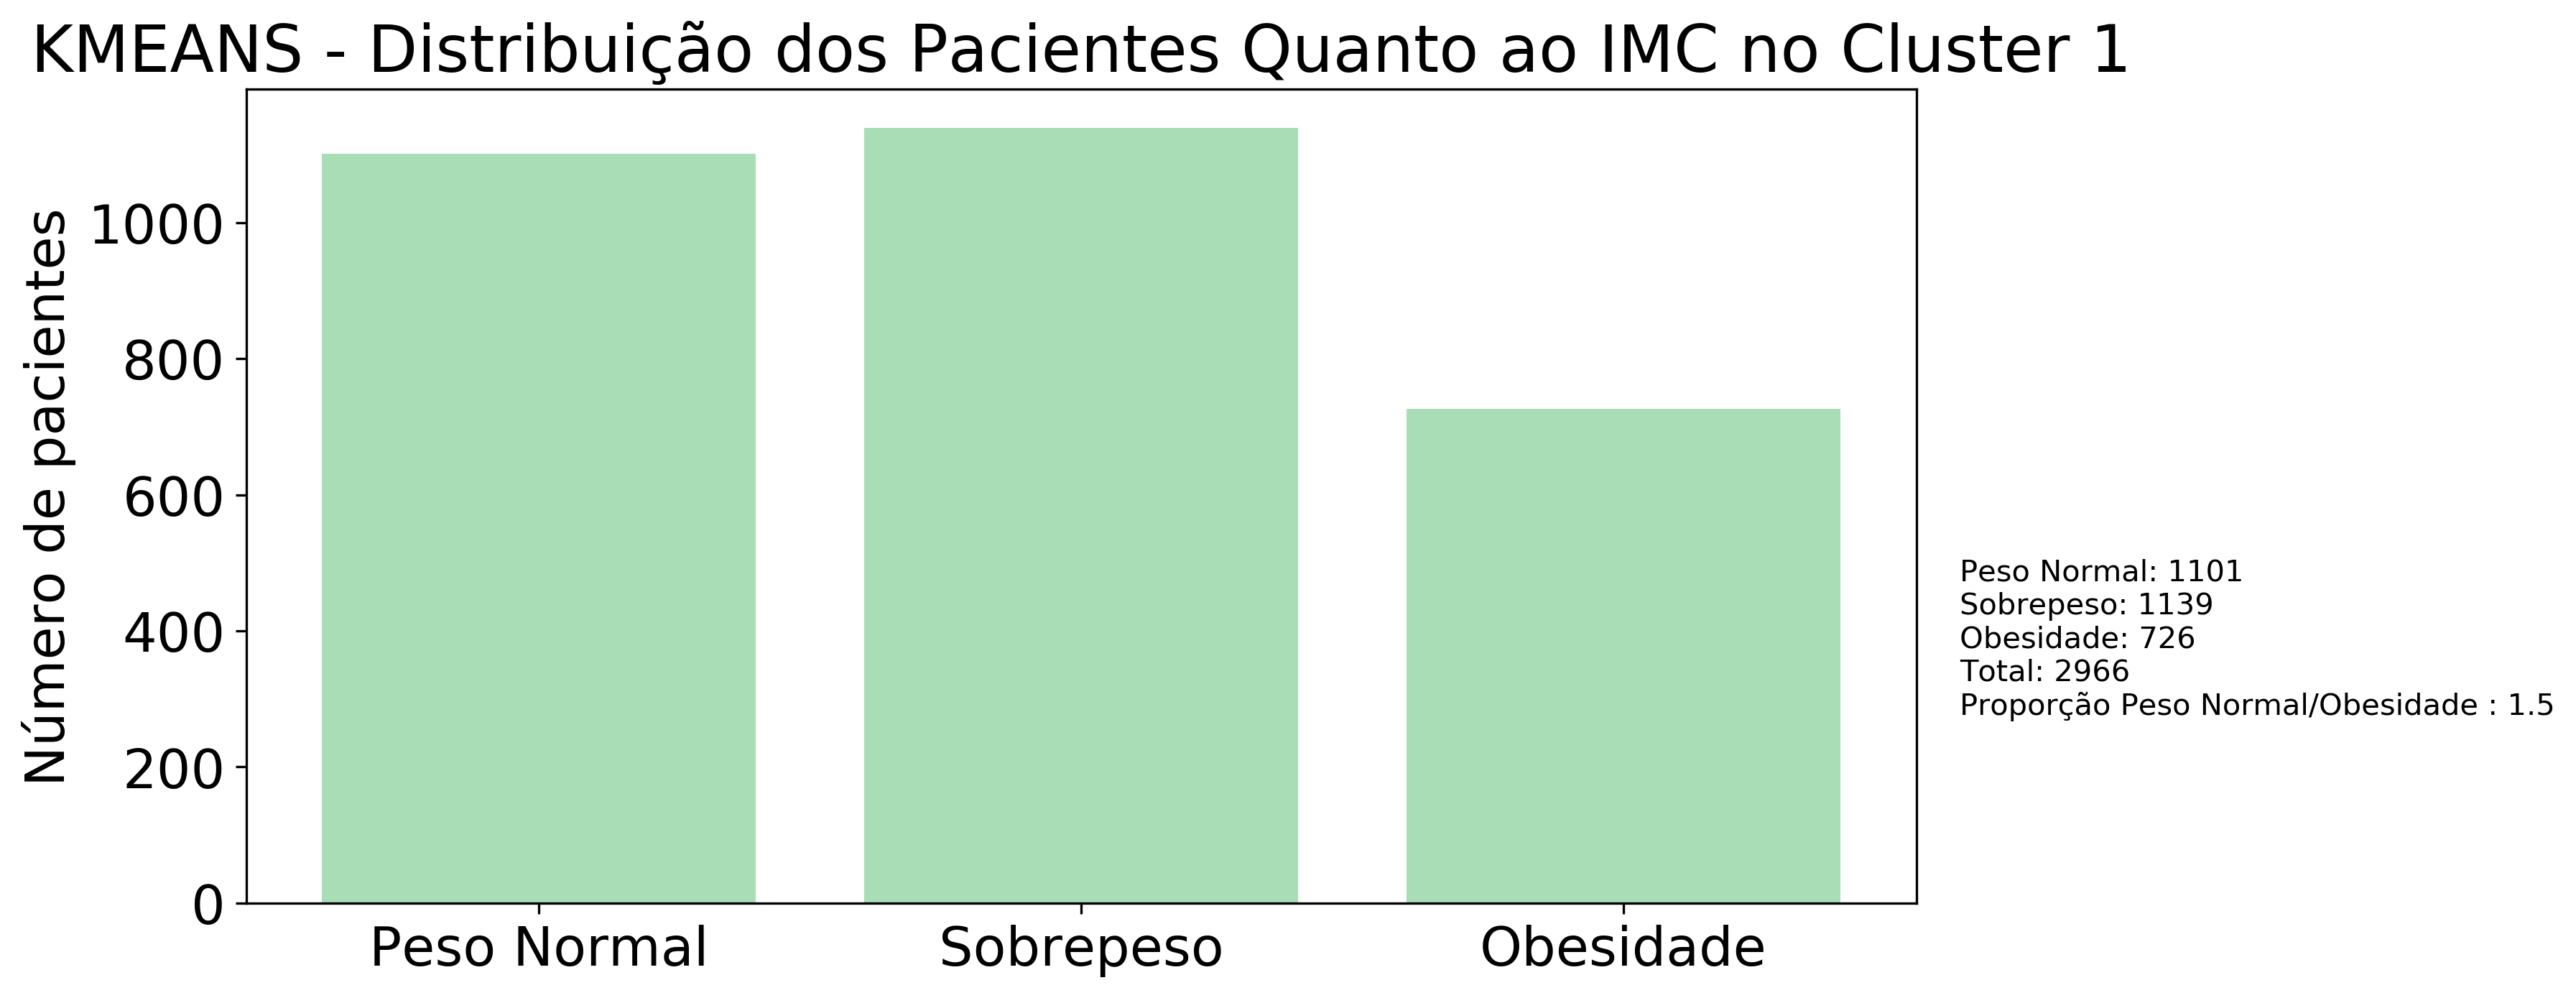

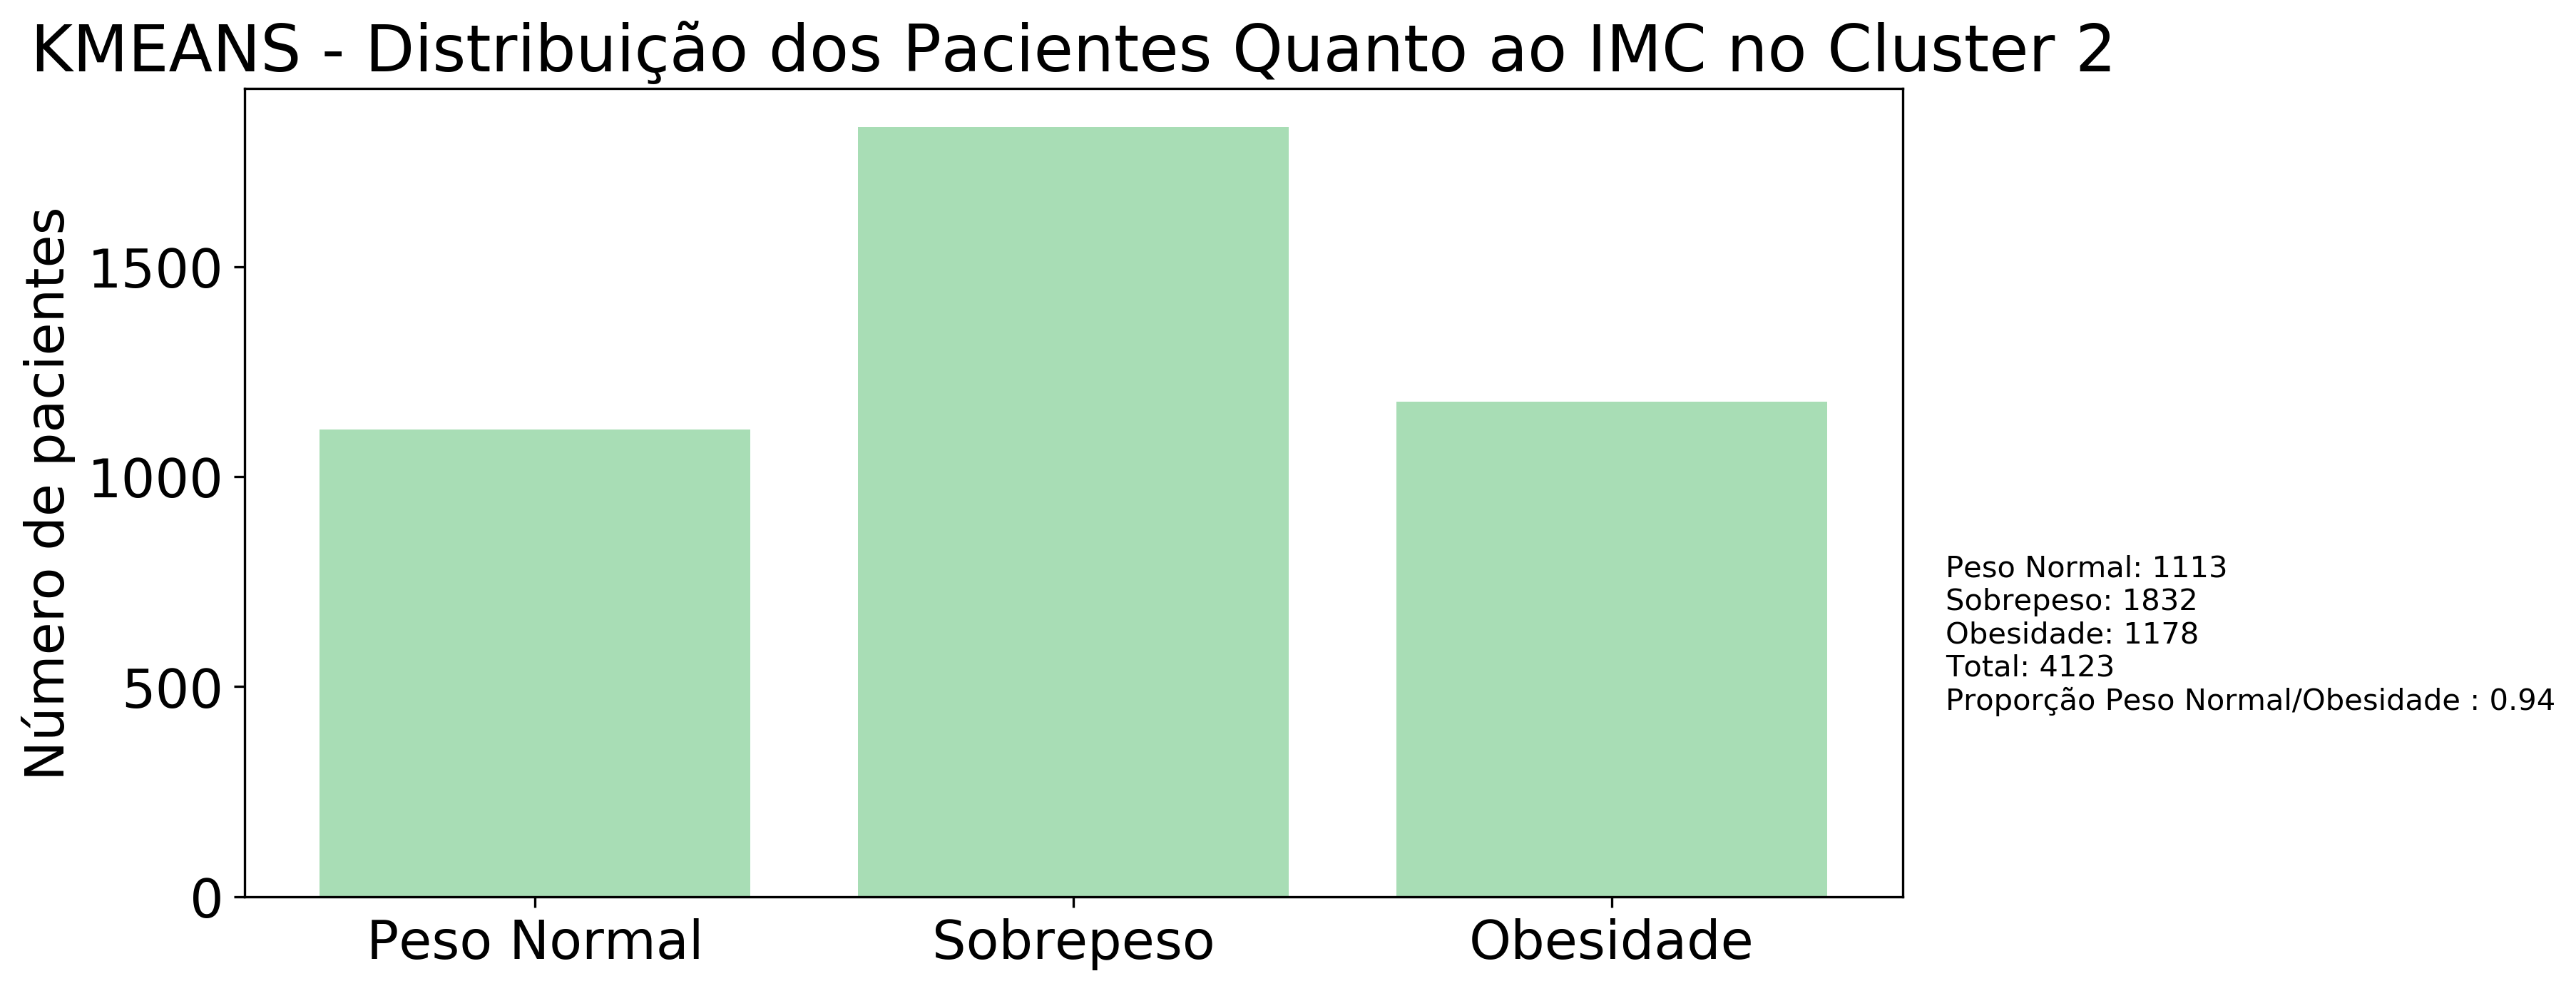

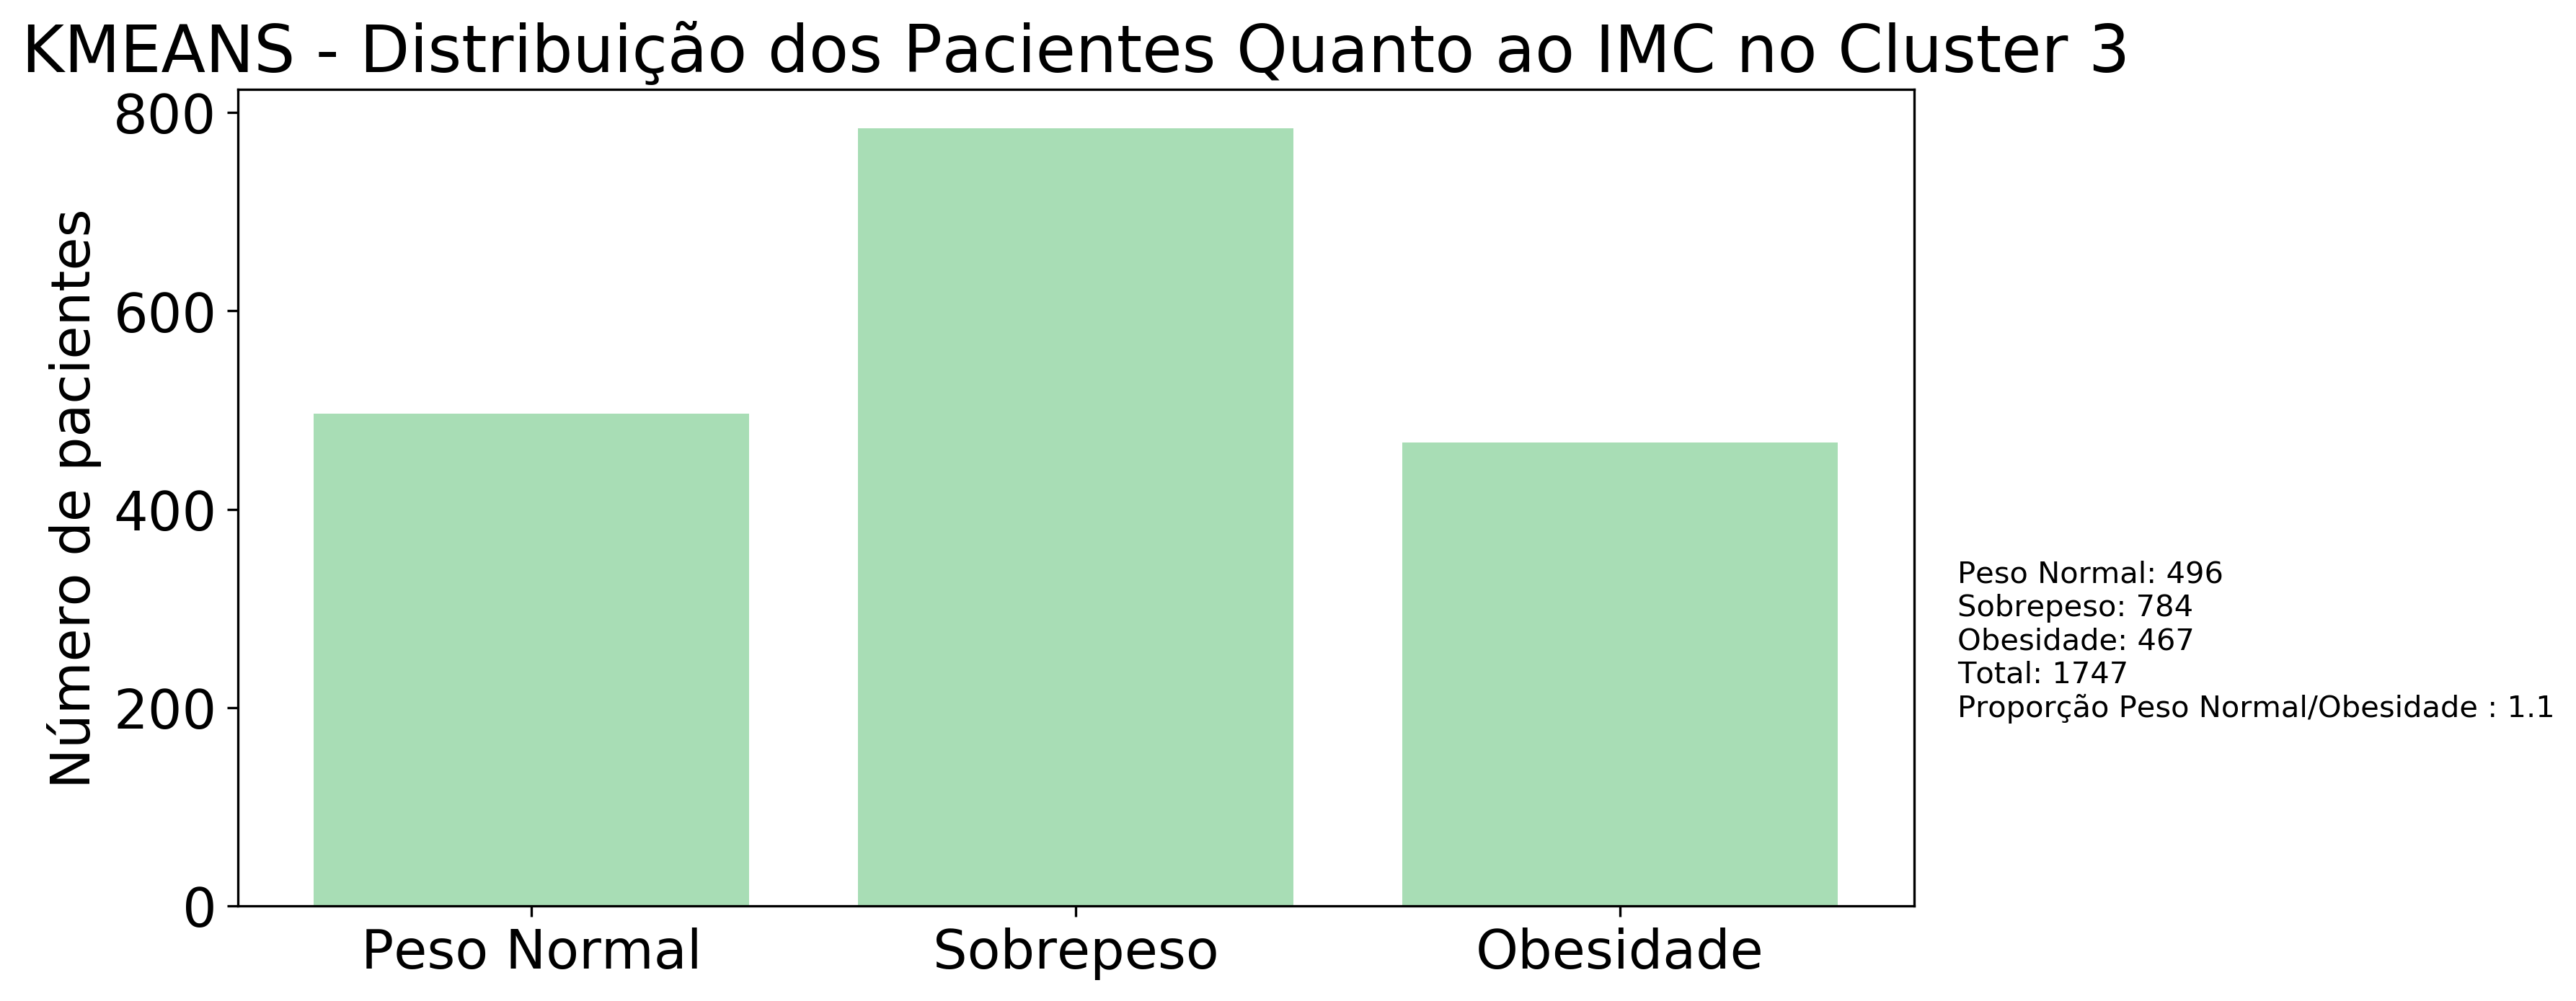

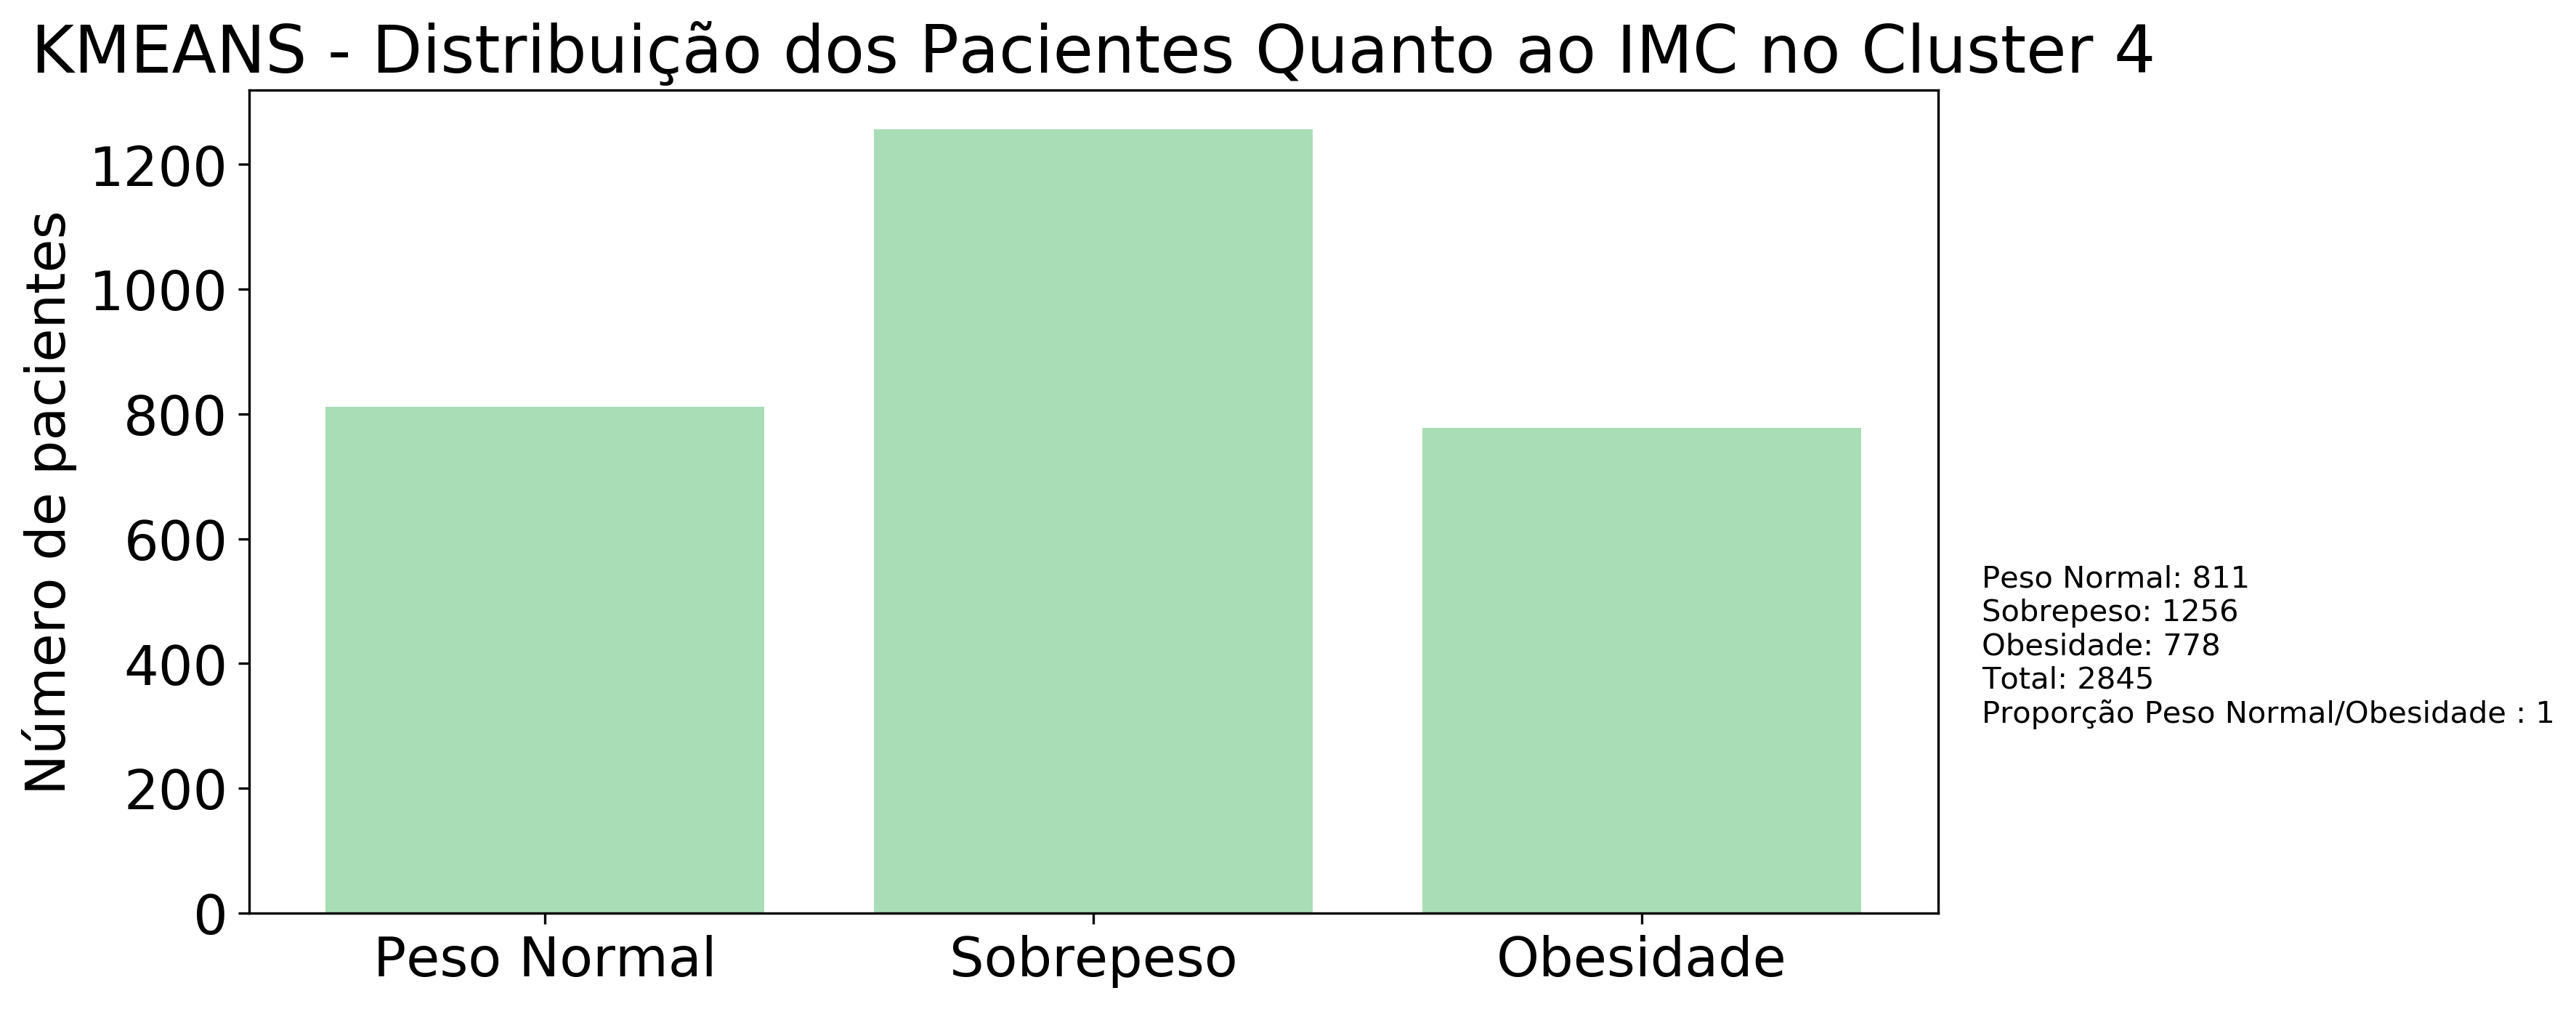

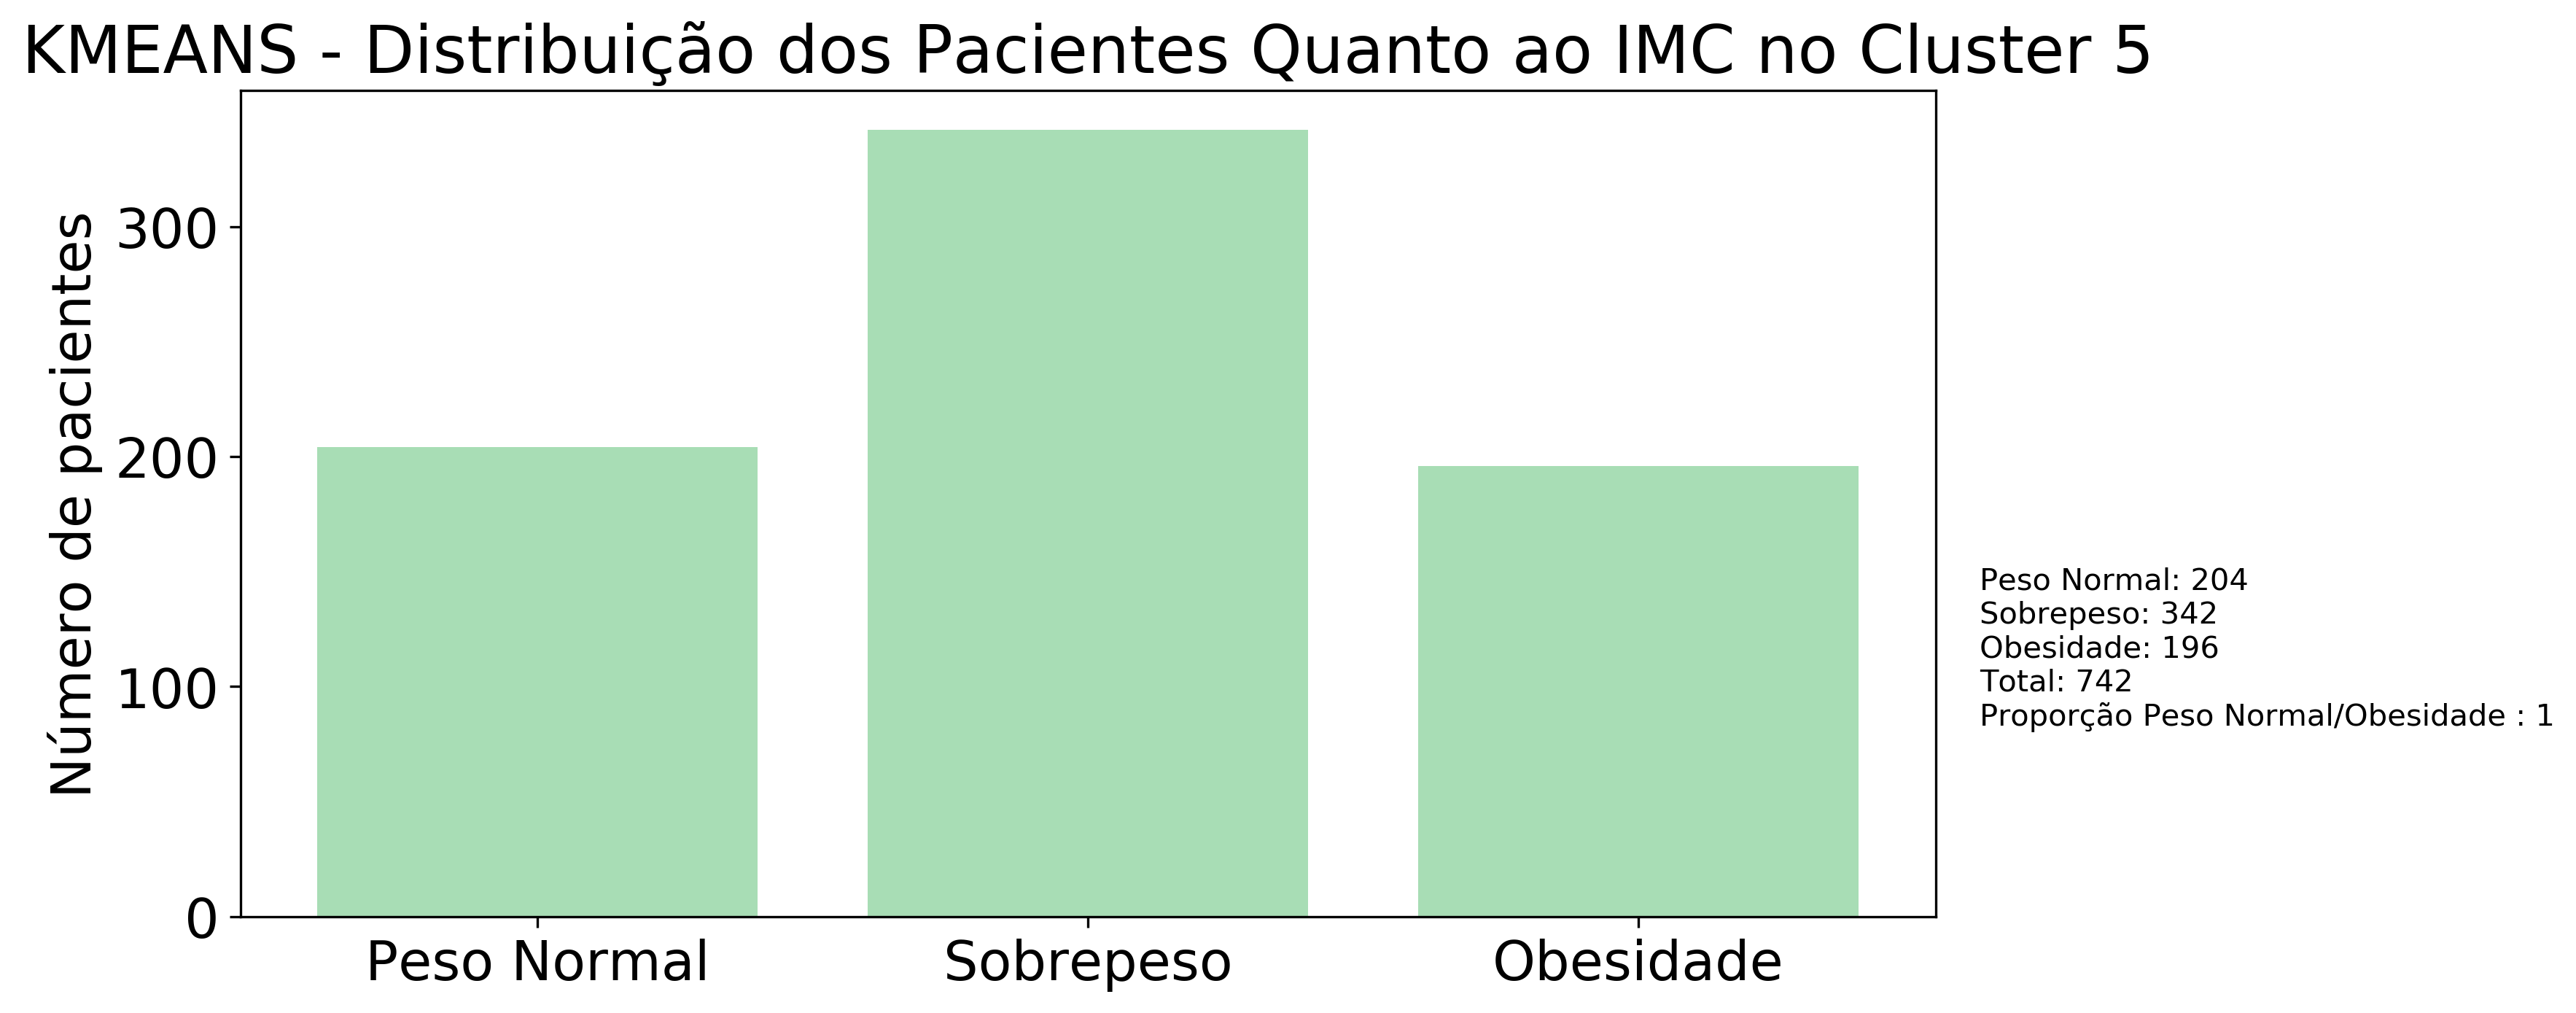

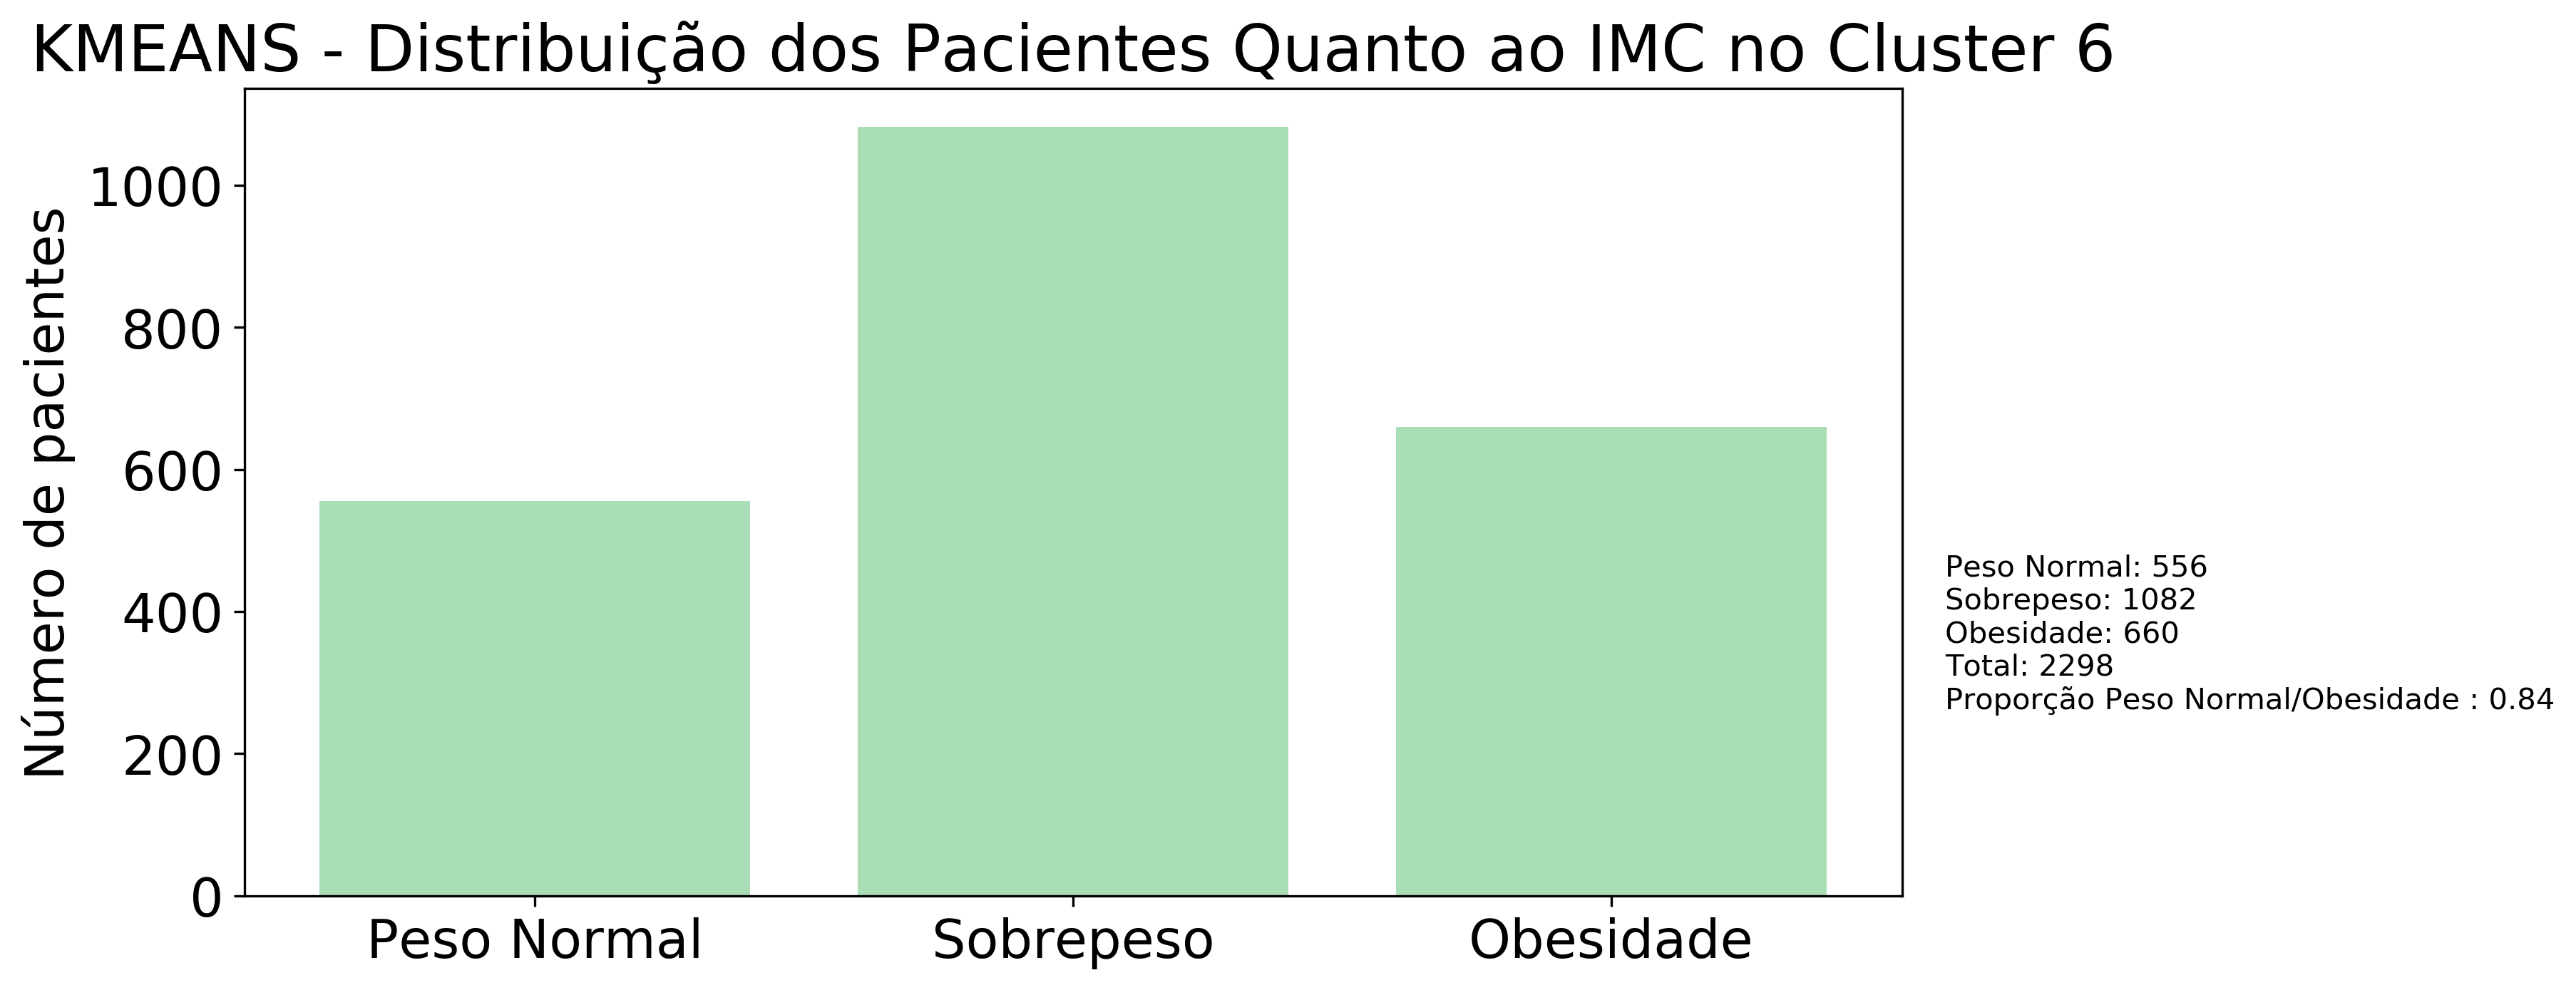

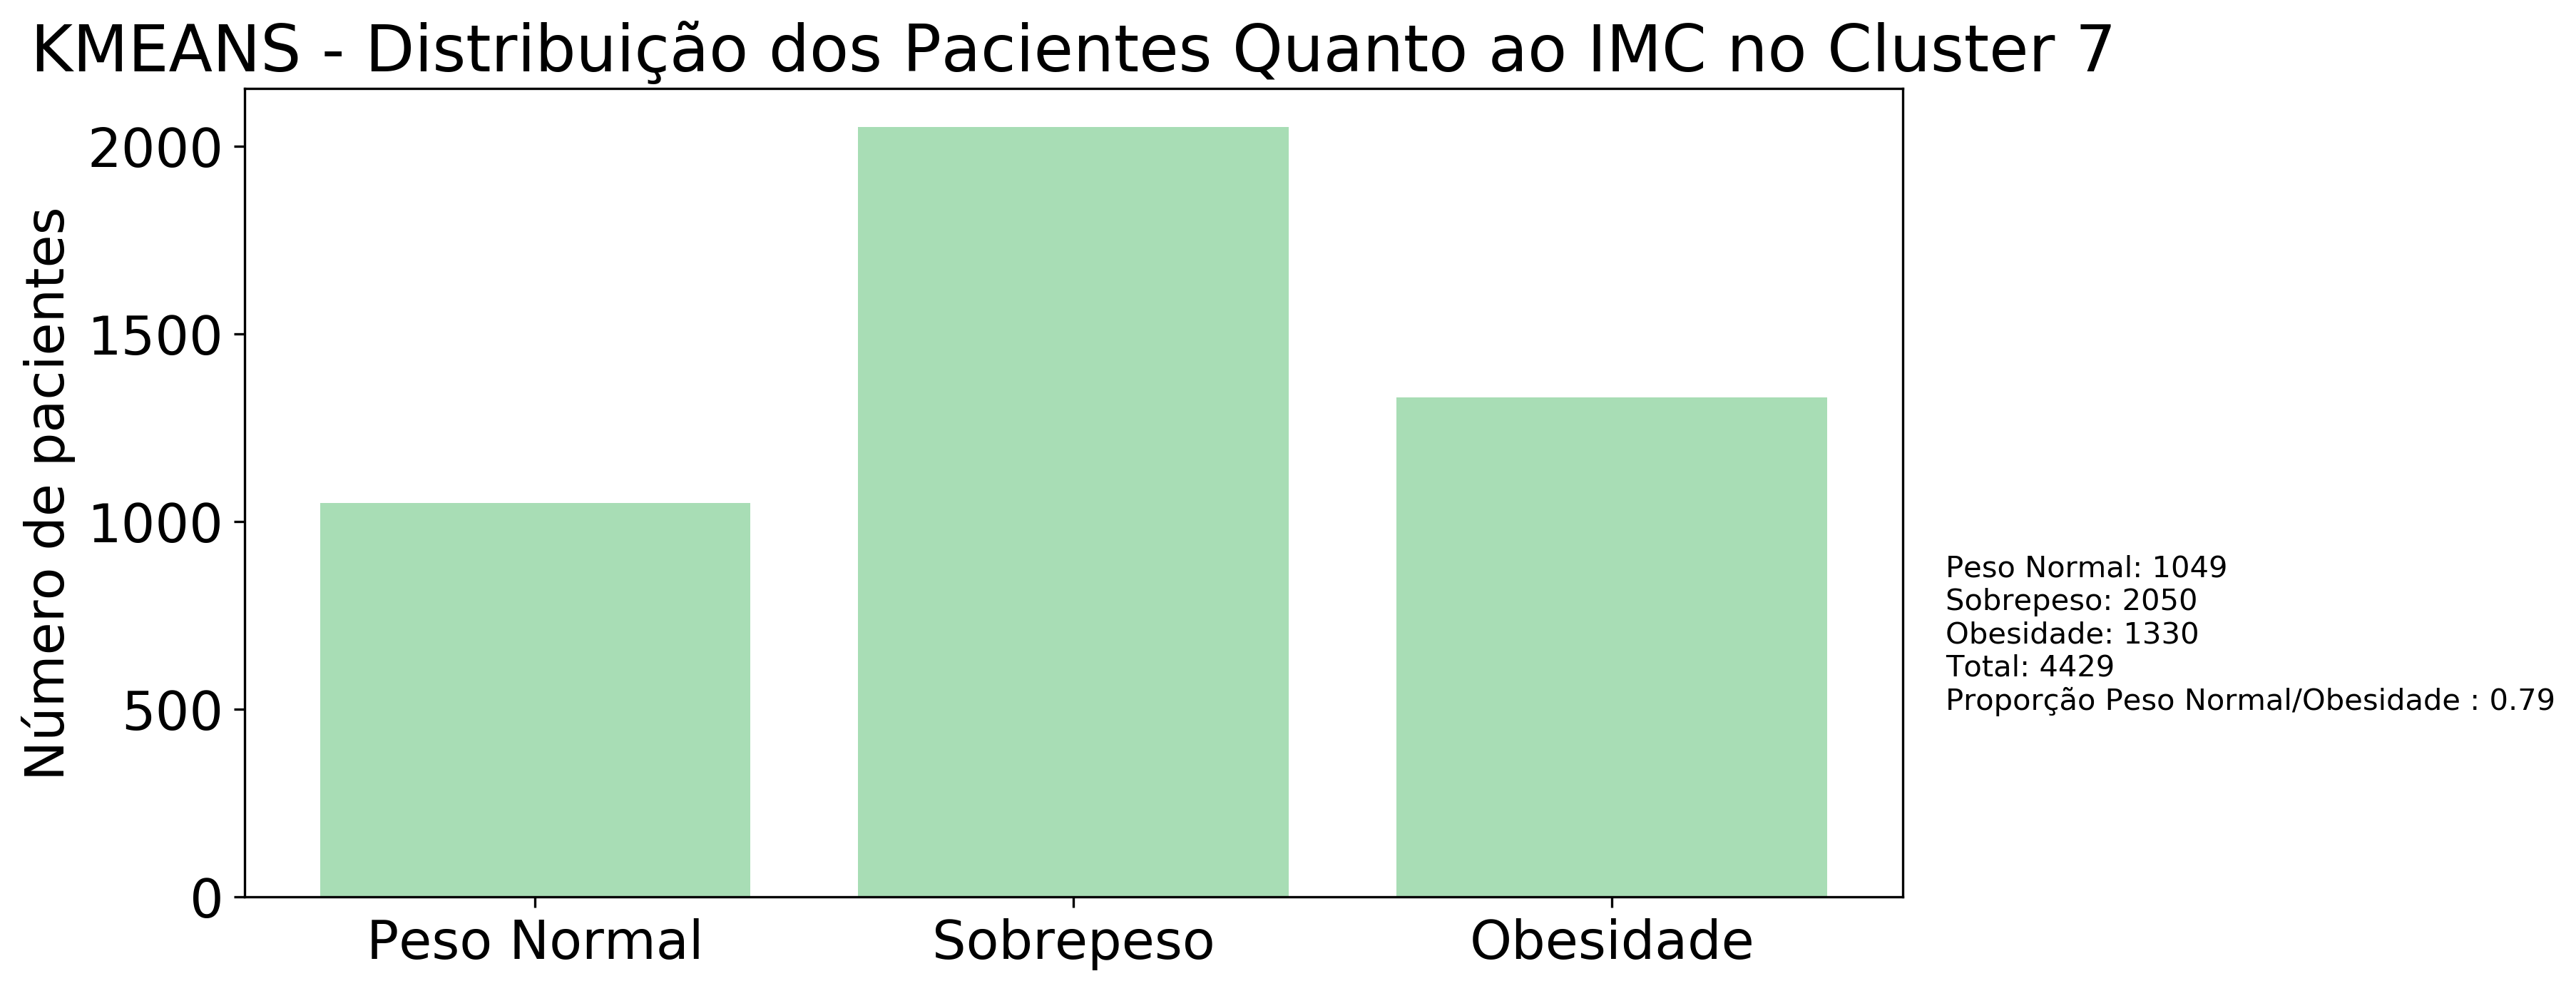

In [129]:
def faixas_imc(imc):
    #classes = ["Peso Normal","Obesidade"]
    #intervalos = [(0, 25),(25, 1000)]
    classes = ["Peso Normal","Sobrepeso", "Obesidade"]
    intervalos = [(0, 25),(25, 30),(30, 1000)]
    #classes = ["baixo peso","normal","sobrepeso","obesimc grau I","obesimc grau II","obesimc Grau III"]
    #intervalos = [(0, 18),(18, 25),(25, 30),(30, 35),(35, 40),(40, 1000)]
    
    for faixa in range(len(classes)):
        if imc < intervalos[faixa][1]:
            return classes[faixa]


try:    
    def plota_histograma_imc(dados,grupo):
        faixa_imc = dados['IMC']
        faixa_imc = faixa_imc.apply(faixas_imc)
        faixa_imc = faixa_imc.value_counts()
        faixa_imc = faixa_imc[["Peso Normal","Sobrepeso","Obesidade"]]
        plt.bar(faixa_imc.index,faixa_imc, color="#a8ddb5")
        plt.gca().set(title=f'{algoritmo.upper()} - Distribuição dos Pacientes Quanto ao IMC no Cluster {grupo}', 
                      ylabel='Número de pacientes')
        legenda = f"Peso Normal: {faixa_imc['Peso Normal']:n}\nSobrepeso: {faixa_imc['Sobrepeso']:n}\nObesidade: {faixa_imc['Obesidade']:n}"
        #legenda = f"Peso Normal: {faixa_imc['Peso Normal']:n}\nObesidade: {faixa_imc['Obesidade']:n}"
        # Os operadores aumentados '+=', '-=', etc... fazem uma operação com, e guardam o resultado de volta, na variável da esquerda:
        # a = 10; a += 5 , resulta em a == 15
        ########################################################################################
        #  proporção em relação a Sobrepeso + Obesidade
        ################################################################
        legenda += f"\nTotal: {faixa_imc['Peso Normal'] + faixa_imc['Sobrepeso'] + faixa_imc['Obesidade']}"
        legenda += "\n" + f"Proporção Peso Normal/Obesidade : { faixa_imc['Peso Normal'] / faixa_imc['Obesidade']:.02n}"
        plt.gcf().text(0.92, 0.3, legenda, fontsize=10)
        plt.savefig(DIR_GRAFICOS / "grafico_imc" / f"grafico_distribuicao_imc_cluster{grupo}.png", bbox_inches='tight')
        plt.show()
        

    for grupo in range(len(abordagem_medidas)):
        plota_histograma_imc(abordagem_medidas[grupo],grupo + 1)
except:
    pass

## Qtd da Abordagem Estatísitica

In [130]:
try:
    qtd_estatistica = pd.DataFrame()

    qtd_estatistica['Cluster'] = [f'cluster {n}' for n in range(1,len(abordagem_estatistica) + 1)]
    qtd_estatistica['QTD Pacientes'] = [len(n) for n in abordagem_estatistica]

    total_pacientes = np.sum([len(n) for n in abordagem_estatistica])

    qtd_estatistica['QTD Pacientes %'] = [np.round(len(n)/total_pacientes*100,2) for n in abordagem_estatistica]


    for analise in range(len(lista_calculo)):
        lista_analise = list()
        for grupo in range(len(abordagem_estatistica)):
            lista_analise.append(funcao[analise](abordagem_estatistica[grupo]))

        qtd_estatistica[lista_calculo[analise]] = lista_analise

    qtd_estatistica = qtd_estatistica.T.reset_index()
    qtd_estatistica.columns = qtd_estatistica.iloc[0,:]
    qtd_estatistica = qtd_estatistica.iloc[1:,:]
    #  grava arquivo com qtd e % das doenças em cada grupo
    qtd_estatistica.to_csv(DIR_ABORDAGENS / f"{algoritmo.upper()}_qtd_approach_estatistica.csv", 
                           sep=";", encoding="latin1", index=False)
except:
    pass

In [131]:
qtd_estatistica

0                       Cluster cluster 1 cluster 2 cluster 3 cluster 4  \
1                 QTD Pacientes      2546      4508       630      2056   
2               QTD Pacientes %      13.3     23.54      3.29     10.74   
3        Media Sistolica em 24h    106.86    125.19    154.43     134.6   
4       Media Diastolica em 24h     65.69     82.59     90.12     74.94   
5       Media Sistolica Daytime    108.19    126.88     155.8    136.15   
6     Media Sistolica Nighttime    100.38    116.95     147.8    127.07   
7      Media Diastolica Daytime     67.15     84.51     91.54      76.3   
8    Media Diastolica Nighttime     58.59     73.29     83.25     68.38   
9    Variancia Sistolica em 24h    125.95    167.01    351.57    268.92   
10  Variancia Diastolica em 24h     91.95    122.43    161.04    121.27   
11     Mediana Sistolica em 24h       108       125    152.25     133.5   
12    Mediana Diastolica em 24h        67        84        89        76   
13         AUC Sistolica em 24h   8651.72   10136.4   12505.6   10898.3   
14        AUC Diastolica em 24h   5316.72   6686.27   7296.47   6066.99   
15          DP Sistolica em 24h     10.94      12.6     18.08     15.95   
16         DP Diastolica em 24h      9.39     10.83     12.36     10.78   
17             Descenso Noturno       7.9      8.75      5.87      7.39   

0  cluster 5 cluster 6 cluster 7  
1       1990      3217      4203  
2      10.39      16.8     21.95  
3     136.87    120.16    115.05  
4      91.88     68.01     76.24  
5     138.59    121.63    116.58  
6     128.51    113.05    107.62  
7      93.79      69.4     78.04  
8      82.61      61.3     67.51  
9     199.15       188    133.16  
10    139.81    105.36    108.49  
11       136       120       115  
12        92        69        77  
13   11083.1   9728.87   9315.68  
14   7438.46   5505.39   6171.63  
15     13.76     13.37     11.24  
16     11.57     10.04      10.2  
17      8.17      7.71      8.48

In [132]:
#descenso_noturno(abordagem_estatistica[0])
abordagem_estatistica[0]

numero_identificacao data_nascimento genero  idade   peso altura   IMC  \
0                        5      1948-10-07      M   70.0   80.0    165  29.4   
1                       12      1994-11-26      M   24.0   65.0    175  21.2   
2                       14      1932-05-28      F   86.0   59.0    149  26.6   
3                       22      1962-06-19      F   56.0   80.0    155  33.3   
4                       23      1956-09-01      F   62.0   73.0    160  28.5   
...                    ...             ...    ...    ...    ...    ...   ...   
2541                 21741      1938-02-06      F   82.0   71.0   1,62  27.1   
2542                 21749      1964-10-23      F   55.0   83.0    161  32.0   
2543                 21755      1953-12-11      F   66.0   60.0    163  22.6   
2544                 21759      1975-04-06      M   45.0  124.0   1,85  36.2   
2545                 21792      1952-04-21      F   68.0   64.0    160  25.0   

      grupo           data_exame  sist 9:00  ...  Mediana Diastolica em 24h  \
0         1  2018-12-26 07:39:41      103.0  ...                       62.0   
1         1  2018-12-26 10:04:10      117.0  ...                       63.0   
2         1  2018-12-26 10:06:10      107.0  ...                       66.0   
3         1  2018-12-26 10:27:20      112.0  ...                       68.0   
4         1  2018-12-26 10:29:28      122.0  ...                       61.0   
...     ...                  ...        ...  ...                        ...   
2541      1  2020-09-10 09:17:50      107.0  ...                       60.0   
2542      1  2020-09-10 10:18:56      112.0  ...                       69.0   
2543      1  2020-09-10 10:48:47      125.0  ...                       72.0   
2544      1  2020-09-10 11:18:49      136.0  ...                       70.0   
2545      1  2020-09-10 17:25:50       94.0  ...                       68.0   

      AUC Sistolica em 24h  AUC Diastolica em 24h  AUC PP Daytime  \
0                   8586.5                 5034.5          2915.0   
1                   9116.5                 5149.0          3268.0   
2                   8810.5                 5280.5          2900.5   
3                   8594.0                 5428.0          2655.0   
4                   8597.0                 5037.0          2987.5   
...                    ...                    ...             ...   
2541                8965.0                 4851.0          3475.5   
2542                8987.5                 5536.5          2843.5   
2543                8914.5                 5700.5          2634.0   
2544                8506.5                 5569.0          2380.5   
2545                8989.5                 5660.0          2815.5   

      AUC PP Nighttime  DP Sistolica em 24h  DP Diastolica em 24h  \
0                606.0                 7.51                  6.65   
1                655.5                 8.93                  9.65   
2                574.0                 8.15                  7.86   
3                470.5                14.44                 13.54   
4                540.0                14.21                 10.31   
...                ...                  ...                   ...   
2541             599.5                11.31                  9.16   
2542             550.5                11.09                 11.33   
2543             548.5                11.13                  8.90   
2544             531.0                12.99                 12.50   
2545             460.0                14.14                  9.38   

      Picos Sistolica  Picos Diastolica  Diferença % Dipping  
0                   9                23             0.969464  
1                  10                28             1.057488  
2                  11                16             1.115168  
3                  22                25             1.178288  
4                  25                35             1.132683  
...               ...               ...                  ...

## Qtd da Abordagem Doença

In [133]:
# Quantidade da abordagem por doença
try:
    lista_doencas = list(abordagem_doenca[0].loc[:,'Hipotensao':'Normotenso'].columns)

    qtd_doencas = pd.DataFrame()

    qtd_doencas['Cluster'] = [f'cluster {n}' for n in range(1,len(abordagem_doenca) + 1)]

    total_pacientes = np.sum([len(n) for n in abordagem_doenca])

    qtd_doencas['QTD Pacientes'] = [len(n) for n in abordagem_doenca]

    qtd_doencas['QTD Pacientes %'] = [np.round(len(n)/total_pacientes*100,2) for n in abordagem_doenca]

    for doenca in lista_doencas:
        lista_qtd = []
        lista_porcentagem = []
        for grupo in range(len(abordagem_doenca)):
            lista_qtd.append(len(abordagem_doenca[grupo][abordagem_doenca[grupo][doenca] == True]))
            lista_porcentagem.append(round(lista_qtd[grupo]/len(abordagem_doenca[grupo][doenca]) * 100,2))
        qtd_doencas[doenca] = lista_qtd
        qtd_doencas[f'{doenca} %'] = lista_porcentagem
    
    lista_descenso = []
    for grupo in range(len(abordagem_doenca)):
        lista_descenso.append(descenso_noturno(abordagem_doenca[grupo]))
    
    qtd_doencas['Descenso Noturno %'] = lista_descenso
        
    qtd_doencas = qtd_doencas.T.reset_index()
    qtd_doencas.columns = qtd_doencas.iloc[0,:]
    qtd_doencas = qtd_doencas.iloc[1:,:]
    #  grava arquivo com qtd e % das doenças em cada grupo
    qtd_doencas.to_csv(DIR_ABORDAGENS / f"{algoritmo.upper()}_qtd_approach_doenca.csv", 
                            sep=";", encoding="latin1", index=False)
except:
    pass

In [134]:
qtd_doencas

0                Cluster cluster 1 cluster 2 cluster 3 cluster 4 cluster 5  \
1          QTD Pacientes      1933      1073      4858      2290      2859   
2        QTD Pacientes %     10.09       5.6     25.37     11.96     14.93   
3             Hipotensao      1911         0      4858      2110      2512   
4           Hipotensao %     98.86         0       100     92.14     87.86   
5      Sistolica Isolada         1         9         2         1         6   
6    Sistolica Isolada %      0.05      0.84      0.04      0.04      0.21   
7     Diastolica Isolada         3        26        15         1        12   
8   Diastolica Isolada %      0.16      2.42      0.31      0.04      0.42   
9                Dipping      1933         0         0      2290         0   
10             Dipping %       100         0         0       100         0   
11           Non Dipping         0      1073      4857         0         0   
12         Non Dipping %         0       100     99.98         0         0   
13       Extreme Dipping         0         0         0         0         0   
14     Extreme Dipping %         0         0         0         0         0   
15       Reverse Dipping         0         0         0         0      2859   
16     Reverse Dipping %         0         0         0         0       100   
17         Morning Surge      1024         0         0      2290         0   
18       Morning Surge %     52.97         0         0       100         0   
19                Masked         0         3         0         0        11   
20              Masked %         0      0.28         0         0      0.38   
21             Whitecoat         0       956      4858      2290      1978   
22           Whitecoat %         0      89.1       100       100     69.19   
23            Normotenso         0         4         0         0         3   
24          Normotenso %         0      0.37         0         0       0.1   
25    Descenso Noturno %        14      5.11      5.43     14.73     -4.25   

0  cluster 6 cluster 7 cluster 8  
1       2751      1316      2070  
2      14.37      6.87     10.81  
3       2751      1275      1836  
4        100     96.88      88.7  
5          4         0         0  
6       0.15         0         0  
7         22         0         1  
8        0.8         0      0.05  
9          0         0      2070  
10         0         0       100  
11      2751         0         0  
12       100         0         0  
13         0      1316         0  
14         0       100         0  
15         0         0         0  
16         0         0         0  
17         0         0         0  
18         0         0         0  
19        17         0         0  
20      0.62         0         0  
21         0       978      2070  
22         0     74.32       100  
23         0         0         0  
24         0         0         0  
25      5.38     24.37     13.41

## Qtd da Abordagem Cadastro

In [135]:
def faixas_imc(imc):
    classes = ["Peso Normal","Sobrepeso", "Obesidade"]
    intervalos = [(0, 25),(25, 30),(30, 1000)]
    
#    classes = ["baixo peso","normal","sobrepeso","obesidade grau I","obesidade grau II","obesidade Grau III"]
#    intervalos = [(0, 18),(18, 25),(25, 30),(30, 35),(35, 40),(40, 1000)]
    
    for faixa in range(len(classes)):
        if imc <= intervalos[faixa][1]:
            return classes[faixa]

def faixas_etarias(idade):
    classes = ["Adultos","Meia-idade","Idoso"]
    intervalos = [(0, 50),(50, 65),(65, 200)]
    
#    classes = ["Jovens","Adultos","Meia-idade","Idoso", "Ancião","Velhice extrema"]
#    intervalos = [(0, 20),(20, 45),(45, 60),(60, 75),(75, 90),(90, 200)]
    
    for faixa in range(len(classes)):
        if idade <= intervalos[faixa][1]:
            return classes[faixa]

In [136]:
def faixa_genero(cadastro):
    total = len(cadastro)
    masculino = len(cadastro[cadastro['genero'] == 'M'])
    feminino = len(cadastro[cadastro['genero'] == 'F'])
    indeterminado = total - masculino - feminino
    faixas = [masculino, np.round(masculino/total * 100, 2),feminino, np.round(feminino/total * 100, 2)]
    return faixas

lista_faixa_idade = ["Adultos","Meia-idade","Idoso"]
lista_faixa_imc = ["Peso Normal","Sobrepeso", "Obesidade"]

In [137]:
# Quantidade da abordagem por dados cadastrais
try:
    qtd_dados_cadastrais = pd.DataFrame()

    qtd_dados_cadastrais['Cluster'] = [f'cluster {n}' for n in range(1,len(abordagem_cadastro) + 1)]
    qtd_dados_cadastrais['QTD Pacientes'] = [len(n) for n in abordagem_cadastro]
    total_pacientes = np.sum([len(n) for n in abordagem_cadastro])
    qtd_dados_cadastrais['QTD Pacientes %'] = [np.round(len(n)/total_pacientes*100,2) for n in abordagem_cadastro]
    lista_total_grupos = [len(i) for i in abordagem_cadastro]
    lista_total_grupos = np.array(lista_total_grupos)

    lista_faixa_genero = ['Masculino','Masculino %','Feminino','Feminino %']

    colunas_genero = [[],[],[],[]]
    for grupo in range(len(abordagem_cadastro)):
        resultado = faixa_genero(abordagem_cadastro[grupo])
        colunas_genero[0].append(resultado[0])
        colunas_genero[1].append(resultado[1])
        colunas_genero[2].append(resultado[2])
        colunas_genero[3].append(resultado[3])

    for faixa in range(len(lista_faixa_genero)):
        qtd_dados_cadastrais[lista_faixa_genero[faixa]] = colunas_genero[faixa]

    #lista_faixa_idade = ["Adultos","Meia-idade","Idoso"]
    #lista_faixa_idade = ["Jovens","Adultos","Meia-idade","Idoso", "Ancião","Velhice extrema"]

    for faixa in range(len(lista_faixa_idade)):
        lista_grupos = list()

        for grupo in range(len(abordagem_cadastro)):
            lista_grupos.append(len(abordagem_cadastro[grupo][abordagem_cadastro[grupo]['idade']
                                                              .apply(faixas_etarias) == lista_faixa_idade[faixa]]))

        np.array(lista_grupos)
        qtd_dados_cadastrais[lista_faixa_idade[faixa]] = lista_grupos
        qtd_dados_cadastrais[f'{lista_faixa_idade[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)

    #lista_faixa_imc = ["Peso Normal","Sobrepeso", "Obesidade"]
    #lista_faixa_imc = ["Abaixo do peso","Peso Normal","Sobrepeso","Obesidade grau 1","Obesidade grau 2","Obesidade Grau 3"]
#################################################################################
    for faixa in range(len(lista_faixa_imc)):
        lista_grupos = list()

        for grupo in range(len(abordagem_cadastro)):
            lista_grupos.append(len(abordagem_cadastro[grupo][abordagem_cadastro[grupo]['IMC'].apply(faixas_imc) == lista_faixa_imc[faixa]]))

        np.array(lista_grupos)
        qtd_dados_cadastrais[lista_faixa_imc[faixa]] = lista_grupos
        qtd_dados_cadastrais[f'{lista_faixa_imc[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)
    
    #qtd_dados_cadastrais['Não obeso'] = qtd_dados_cadastrais['Peso Normal'] + qtd_dados_cadastrais['Sobrepeso']
    
    lista_descenso = []
    for grupo in range(len(abordagem_cadastro)):
        lista_descenso.append(descenso_noturno(abordagem_cadastro[grupo]))
    
    qtd_dados_cadastrais['Descenso Noturno %'] = lista_descenso
    
    qtd_dados_cadastrais = qtd_dados_cadastrais.T.reset_index()
    qtd_dados_cadastrais.columns = qtd_dados_cadastrais.iloc[0,:]
    qtd_dados_cadastrais = qtd_dados_cadastrais.iloc[1:,:]
    #  grava arquivo com qtd e % das doenças em cada grupo
    qtd_dados_cadastrais.to_csv(DIR_ABORDAGENS / f"{algoritmo.upper()}_qtd_approach_cadastro.csv", 
                           sep=";", encoding="latin1", index=False)
except:
    pass

In [138]:
qtd_dados_cadastrais

0              Cluster cluster 1 cluster 2 cluster 3 cluster 4 cluster 5  \
1        QTD Pacientes      1933      1073      4858      2290      2859   
2      QTD Pacientes %     10.09       5.6     25.37     11.96     14.93   
3            Masculino       909       630      2008      1082      1144   
4          Masculino %     47.03     58.71     41.33     47.25     40.01   
5             Feminino      1024       443      2850      1208      1715   
6           Feminino %     52.97     41.29     58.67     52.75     59.99   
7              Adultos       938       444      1768       899       589   
8            Adultos %     48.53     41.38     36.39     39.26      20.6   
9           Meia-idade       653       417      1460       728       802   
10        Meia-idade %     33.78     38.86     30.05     31.79     28.05   
11               Idoso       342       212      1630       663      1468   
12             Idoso %     17.69     19.76     33.55     28.95     51.35   
13         Peso Normal       615       300      1305       645       872   
14       Peso Normal %     31.82     27.96     26.86     28.17      30.5   
15           Sobrepeso       890       526      2065       981      1236   
16         Sobrepeso %     46.04     49.02     42.51     42.84     43.23   
17           Obesidade       428       247      1488       664       751   
18         Obesidade %     22.14     23.02     30.63        29     26.27   
19  Descenso Noturno %        14      5.11      5.43     14.73     -4.25   

0  cluster 6 cluster 7 cluster 8  
1       2751      1316      2070  
2      14.37      6.87     10.81  
3       1194       643      1095  
4       43.4     48.86      52.9  
5       1557       673       975  
6       56.6     51.14      47.1  
7       1117       600      1161  
8       40.6     45.59     56.09  
9        900       447       577  
10     32.72     33.97     27.87  
11       734       269       332  
12     26.68     20.44     16.04  
13       820       420       564  
14     29.81     31.91     27.25  
15      1218       568       906  
16     44.27     43.16     43.77  
17       713       328       600  
18     25.92     24.92     28.99  
19      5.38     24.37     13.41

## Qtd da Abordagem Medidas

In [139]:
# Quantidade da abordagem por medidas
try:
    qtd_dados_medidas = pd.DataFrame()

    qtd_dados_medidas['Cluster'] = [f'cluster {n}' for n in range(1,len(abordagem_medidas) + 1)]
    qtd_dados_medidas['QTD Pacientes'] = [len(n) for n in abordagem_medidas]
    total_pacientes = np.sum([len(n) for n in abordagem_medidas])
    qtd_dados_medidas['QTD Pacientes %'] = [np.round(len(n)/total_pacientes*100,2) for n in abordagem_medidas]
    lista_total_grupos = [len(i) for i in abordagem_medidas]
    lista_total_grupos = np.array(lista_total_grupos)
    lista_faixa_genero = ['Masculino','Masculino %','Feminino','Feminino %']

    colunas_genero = [[],[],[],[],[],[]]
    for grupo in range(len(abordagem_medidas)):
        resultado = faixa_genero(abordagem_medidas[grupo])
        colunas_genero[0].append(resultado[0])
        colunas_genero[1].append(resultado[1])
        colunas_genero[2].append(resultado[2])
        colunas_genero[3].append(resultado[3])

    for faixa in range(len(lista_faixa_genero)):
        qtd_dados_medidas[lista_faixa_genero[faixa]] = colunas_genero[faixa]

    #lista_faixa_idade = ["Adultos","Meia-idade","Idoso"]
    #lista_faixa_idade = ["Jovens","Adultos","Meia-idade","Idoso", "Ancião","Velhice extrema"]


    for faixa in range(len(lista_faixa_idade)):
        lista_grupos = list()
        
        for grupo in range(len(abordagem_medidas)):
            lista_grupos.append(len(abordagem_medidas[grupo][abordagem_medidas[grupo]['idade'].apply(faixas_etarias) == lista_faixa_idade[faixa]]))
        np.array(lista_grupos)
        qtd_dados_medidas[lista_faixa_idade[faixa]] = lista_grupos
        qtd_dados_medidas[f'{lista_faixa_idade[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)


    #lista_faixa_imc = ["peso normal","sobrepeso", "obesidade"]
    #lista_faixa_imc = ["Abaixo do peso","Peso Normal","Sobrepeso","Obesidade grau 1","Obesidade grau 2","Obesidade Grau 3"]
    
#################################################################################################
    for faixa in range(len(lista_faixa_imc)):
        lista_grupos = list()
        
        for grupo in range(len(abordagem_medidas)):
            lista_grupos.append(len(abordagem_medidas[grupo][abordagem_medidas[grupo]['IMC'].apply(faixas_imc) == lista_faixa_imc[faixa]]))
        np.array(lista_grupos)
        qtd_dados_medidas[lista_faixa_imc[faixa]] = lista_grupos
        qtd_dados_medidas[f'{lista_faixa_imc[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)
    
    qtd_dados_medidas['Não obeso'] = qtd_dados_medidas['Peso Normal'] + qtd_dados_medidas['Sobrepeso']
    qtd_dados_medidas['Não obeso %'] =  np.round(qtd_dados_medidas['Não obeso'] / lista_total_grupos * 100, 2)
    
    lista_calculo = ['Media Sistolica em 24h','Media Diastolica em 24h','Media Sistolica Daytime','Media Sistolica Nighttime',
                    'Media Diastolica Daytime','Media Diastolica Nighttime','Variancia Sistolica em 24h','Variancia Diastolica em 24h',
                    'Mediana Sistolica em 24h', 'Mediana Diastolica em 24h','AUC Sistolica em 24h','AUC Diastolica em 24h',
                     'DP Sistolica em 24h','DP Diastolica em 24h']

    funcao = [media_sistolica,media_diastolica,media_sistolica_dia,media_sistolica_noite,media_diastolica_dia,
               media_diastolica_noite,variancia_sistolica,variancia_diastolica,mediana_sistolica,mediana_diastolica,
              auc_sistolica,auc_diastolica,desvio_sistolica,desvio_diastolica]

    for analise in range(len(lista_calculo)):
        lista_analise = list()
        for grupo in range(len(abordagem_medidas)):
            lista_analise.append(funcao[analise](abordagem_medidas[grupo]))

        qtd_dados_medidas[lista_calculo[analise]] = lista_analise
    
    lista_descenso = []
    for grupo in range(len(abordagem_medidas)):
        lista_descenso.append(descenso_noturno(abordagem_medidas[grupo]))

    qtd_dados_medidas['Descenso Noturno %'] = lista_descenso
    qtd_dados_medidas_sem_T = qtd_dados_medidas
    qtd_dados_medidas = qtd_dados_medidas.T.reset_index()
    qtd_dados_medidas.columns = qtd_dados_medidas.iloc[0,:]
    qtd_dados_medidas = qtd_dados_medidas.iloc[1:,:]
    #  grava arquivo com qtd e % das doenças em cada grupo
    qtd_dados_medidas.to_csv(DIR_ABORDAGENS /  f"{algoritmo.upper()}_qtd_approach_medidas.csv", 
                           sep=";", encoding="latin1", index=False)
    
except:
    pass

In [140]:
qtd_dados_medidas

0                       Cluster cluster 1 cluster 2 cluster 3 cluster 4  \
1                 QTD Pacientes      2966      4123      1747      2845   
2               QTD Pacientes %     15.49     21.53      9.12     14.86   
3                     Masculino       828      1982       616       961   
4                   Masculino %     27.92     48.07     35.26     33.78   
5                      Feminino      2138      2141      1131      1884   
6                    Feminino %     72.08     51.93     64.74     66.22   
7                       Adultos      1095      2035       218       606   
8                     Adultos %     36.92     49.36     12.48      21.3   
9                    Meia-idade       891      1420       412       729   
10                 Meia-idade %     30.04     34.44     23.58     25.62   
11                        Idoso       980       668      1117      1510   
12                      Idoso %     33.04      16.2     63.94     53.08   
13                  Peso Normal      1138      1162       520       842   
14                Peso Normal %     38.37     28.18     29.77      29.6   
15                    Sobrepeso      1115      1808       773      1238   
16                  Sobrepeso %     37.59     43.85     44.25     43.51   
17                    Obesidade       713      1153       454       765   
18                  Obesidade %     24.04     27.97     25.99     26.89   
19                    Não obeso      2253      2970      1293      2080   
20                  Não obeso %     75.96     72.03     74.01     73.11   
21       Media Sistolica em 24h    107.97    114.82    136.07    122.34   
22      Media Diastolica em 24h     64.94     75.18     76.29     69.33   
23      Media Sistolica Daytime    109.32    116.47    137.02    123.49   
24    Media Sistolica Nighttime    101.46    106.83    131.48    116.74   
25     Media Diastolica Daytime     66.33     77.04     77.29      70.5   
26   Media Diastolica Nighttime     58.16     66.16     71.41     63.64   
27   Variancia Sistolica em 24h    133.27    134.49     275.9    197.49   
28  Variancia Diastolica em 24h     91.46    109.08    120.16    104.59   
29     Mediana Sistolica em 24h     108.5       115     134.5     121.5   
30    Mediana Diastolica em 24h        66        76        77        70   
31         AUC Sistolica em 24h   8742.31   9297.53   11017.5    9904.4   
32        AUC Diastolica em 24h   5256.06   6086.18   6175.83   5611.87   
33          DP Sistolica em 24h     11.23      11.3     16.11     13.68   
34         DP Diastolica em 24h      9.37     10.23     10.73        10   
35           Descenso Noturno %      7.84      9.14      4.44      5.88   

0  cluster 5 cluster 6 cluster 7  
1        742      2298      4429  
2       3.87        12     23.13  
3        364      1368      2586  
4      49.06     59.53     58.39  
5        378       930      1843  
6      50.94     40.47     41.61  
7        200      1122      2240  
8      26.95     48.83     50.58  
9        240       793      1499  
10     32.35     34.51     33.85  
11       302       383       690  
12      40.7     16.67     15.58  
13       211       576      1092  
14     28.44     25.07     24.66  
15       338      1078      2040  
16     45.55     46.91     46.06  
17       193       644      1297  
18     26.01     28.02     29.28  
19       549      1654      3132  
20     73.99     71.98     70.72  
21     152.8     134.7    124.31  
22     94.92     89.85     81.84  
23    154.14    136.61    126.25  
24    146.31    125.44    114.89  
25     96.45     91.87     83.91  
26     87.53     80.05     71.79  
27    309.09    196.41    165.81  
28    162.53    136.82    123.38  
29       151     134.5       124  
30        95        91        83  
31   12373.4   10907.9   10065.1  
32   7684.95   7274.39   6625.59  
33     16.91     13.64     12.55  
34     12.42     11.46     10.88  
35      5.75      9.18     10.02

In [141]:
abordagem_medidas[0]

numero_identificacao data_nascimento genero  idade   peso altura   IMC  \
0                        4      1923-10-05      M   94.0   85.0    160  33.2   
1                        5      1948-10-07      M   70.0   80.0    165  29.4   
2                       12      1994-11-26      M   24.0   65.0    175  21.2   
3                       14      1932-05-28      F   86.0   59.0    149  26.6   
4                       22      1962-06-19      F   56.0   80.0    155  33.3   
...                    ...             ...    ...    ...    ...    ...   ...   
2961                 21734      1956-05-15      F   64.0   82.0    154  34.6   
2962                 21741      1938-02-06      F   82.0   71.0   1,62  27.1   
2963                 21749      1964-10-23      F   55.0   83.0    161  32.0   
2964                 21759      1975-04-06      M   45.0  124.0   1,85  36.2   
2965                 21788      1985-03-15      F   35.0   93.0    167  33.3   

      grupo           data_exame  sist 9:00  ...  Mediana Diastolica em 24h  \
0         1  2018-09-10 12:25:23      105.0  ...                       59.0   
1         1  2018-12-26 07:39:41      103.0  ...                       62.0   
2         1  2018-12-26 10:04:10      117.0  ...                       63.0   
3         1  2018-12-26 10:06:10      107.0  ...                       66.0   
4         1  2018-12-26 10:27:20      112.0  ...                       68.0   
...     ...                  ...        ...  ...                        ...   
2961      1  2020-09-10 08:50:52      129.0  ...                       68.0   
2962      1  2020-09-10 09:17:50      107.0  ...                       60.0   
2963      1  2020-09-10 10:18:56      112.0  ...                       69.0   
2964      1  2020-09-10 11:18:49      136.0  ...                       70.0   
2965      1  2020-09-10 16:44:53      107.0  ...                       62.0   

      AUC Sistolica em 24h  AUC Diastolica em 24h  AUC PP Daytime  \
0                   9545.5                 4902.0          3748.0   
1                   8586.5                 5034.5          2915.0   
2                   9116.5                 5149.0          3268.0   
3                   8810.5                 5280.5          2900.5   
4                   8594.0                 5428.0          2655.0   
...                    ...                    ...             ...   
2961                9143.0                 5449.0          3087.0   
2962                8965.0                 4851.0          3475.5   
2963                8987.5                 5536.5          2843.5   
2964                8506.5                 5569.0          2380.5   
2965                9245.0                 4935.5          3556.0   

      AUC PP Nighttime  DP Sistolica em 24h  DP Diastolica em 24h  \
0                841.5                16.52                 11.36   
1                606.0                 7.51                  6.65   
2                655.5                 8.93                  9.65   
3                574.0                 8.15                  7.86   
4                470.5                14.44                 13.54   
...                ...                  ...                   ...   
2961             566.0                 9.37                  8.88   
2962             599.5                11.31                  9.16   
2963             550.5                11.09                 11.33   
2964             531.0                12.99                 12.50   
2965             713.5                14.36                  8.29   

      Picos Sistolica  Picos Diastolica  Diferença % Dipping  
0                  11                34             0.966110  
1                   9                23             0.969464  
2                  10                28             1.057488  
3                  11                16             1.115168  
4                  22                25             1.178288  
...               ...               ...                  ...

## QTD DOENÇA Sem HIPOTENSÃO e NORMOTENSO

In [142]:
# Quantidade da abordagem por range de doença sem Hipertensão e sem Normotenso
try:
    
    lista_escolho_doenca = list(abordagem_escolho_doenca[0].loc[:,'Sistolica Isolada':'Whitecoat'].columns)
    # lista_escolho_doenca = list(abordagem_escolho_doenca[0].loc[:,'Hipotensao':'Normotenso'].columns)

    qtd_escolho_doenca = pd.DataFrame()

    qtd_escolho_doenca['Cluster'] = [f'cluster {n}' for n in range(1,len(abordagem_escolho_doenca) + 1)]
    
    total_pacientes = np.sum([len(n) for n in abordagem_escolho_doenca])

    qtd_escolho_doenca['QTD Pacientes'] = [len(n) for n in abordagem_escolho_doenca]

    qtd_escolho_doenca['QTD Pacientes %'] = [np.round(len(n)/total_pacientes*100,2) for n in abordagem_escolho_doenca]

    for doenca in lista_escolho_doenca:
        lista_qtd_escolho_doenca = []
        lista_porcentagem_escolho_doenca = []
        for grupo in range(len(abordagem_escolho_doenca)):
            lista_qtd_escolho_doenca.append(len(abordagem_escolho_doenca[grupo][abordagem_escolho_doenca[grupo][doenca] == True]))
            lista_porcentagem_escolho_doenca.append(round(lista_qtd_escolho_doenca[grupo]/len(abordagem_escolho_doenca[grupo][doenca]) * 100,2))
        
        qtd_escolho_doenca[doenca] = lista_qtd_escolho_doenca
        qtd_escolho_doenca[f'{doenca} %'] = lista_porcentagem_escolho_doenca

    lista_descenso = []
    for grupo in range(len(abordagem_escolho_doenca)):
        lista_descenso.append(descenso_noturno(abordagem_escolho_doenca[grupo]))
    
    qtd_escolho_doenca['Descenso Noturno %'] = lista_descenso
    
    qtd_escolho_doenca = qtd_escolho_doenca.T.reset_index()
    qtd_escolho_doenca.columns = qtd_escolho_doenca.iloc[0,:]
    qtd_escolho_doenca = qtd_escolho_doenca.iloc[1:,:]

    #  grava arquivo com qtd e % das doenças em cada grupo
    qtd_escolho_doenca.to_csv(DIR_ABORDAGENS / f"{algoritmo.upper()}_qtd_approach_escolho_doenca.csv", 
                            sep=";", encoding="latin1", index=False)
except:
    pass

In [143]:
qtd_escolho_doenca

0                Cluster cluster 1 cluster 2 cluster 3 cluster 4 cluster 5  \
1          QTD Pacientes      2868      1933      2859      5813      2290   
2        QTD Pacientes %     14.98     10.09     14.93     30.36     11.96   
3      Sistolica Isolada        11         1         6         4         1   
4    Sistolica Isolada %      0.38      0.05      0.21      0.07      0.04   
5     Diastolica Isolada        29         3        12        34         1   
6   Diastolica Isolada %      1.01      0.16      0.42      0.58      0.04   
7                Dipping         0      1933         0         0      2290   
8              Dipping %         0       100         0         0       100   
9            Non Dipping      2868         0         0      5813         0   
10         Non Dipping %       100         0         0       100         0   
11       Extreme Dipping         0         0         0         0         0   
12     Extreme Dipping %         0         0         0         0         0   
13       Reverse Dipping         0         0      2859         0         0   
14     Reverse Dipping %         0         0       100         0         0   
15         Morning Surge         0      1024         0         0      2290   
16       Morning Surge %         0     52.97         0         0       100   
17                Masked        20         0        11         0         0   
18              Masked %       0.7         0      0.38         0         0   
19             Whitecoat         0         0      1978      5813      2290   
20           Whitecoat %         0         0     69.19       100       100   
21    Descenso Noturno %      5.35        14     -4.25      5.39     14.73   

0  cluster 6 cluster 7  
1       1316      2071  
2       6.87     10.81  
3          0         0  
4          0         0  
5          0         1  
6          0      0.05  
7          0      2070  
8          0     99.95  
9          0         0  
10         0         0  
11      1316         0  
12       100         0  
13         0         0  
14         0         0  
15         0         0  
16         0         0  
17         0         0  
18         0         0  
19       978      2071  
20     74.32       100  
21     24.37     13.41

In [144]:
abordagem_escolho_doenca[0]

numero_identificacao data_nascimento genero  idade   peso altura   IMC  \
0                       11      1974-04-29      M   44.0   81.0    176  26.1   
1                       12      1994-11-26      M   24.0   65.0    175  21.2   
2                       31      1963-01-20      F   55.0   62.0    165  22.8   
3                       33      1982-09-03      F   36.0   71.0    163  26.7   
4                       34      1957-06-24      M   61.0   72.0   1,74  23.8   
...                    ...             ...    ...    ...    ...    ...   ...   
2863                 21746      1953-02-19      M   67.0   60.0    161  23.1   
2864                 21753      1944-11-03      F   75.0   73.0   1,55  30.4   
2865                 21755      1953-12-11      F   66.0   60.0    163  22.6   
2866                 21759      1975-04-06      M   45.0  124.0   1,85  36.2   
2867                 21766      1967-12-19      M   52.0   78.0   1,74  25.8   

      grupo           data_exame  sist 9:00  ...  Mediana Diastolica em 24h  \
0         1  2018-12-26 10:01:51      100.0  ...                       74.0   
1         1  2018-12-26 10:04:10      117.0  ...                       63.0   
2         1  2018-12-26 13:19:42      113.0  ...                       75.0   
3         1  2018-12-26 13:50:59      108.0  ...                       68.0   
4         1  2018-12-26 14:20:27      134.0  ...                       79.5   
...     ...                  ...        ...  ...                        ...   
2863      1  2020-09-10 09:54:05      120.0  ...                       67.0   
2864      1  2020-09-10 10:34:54      132.0  ...                       77.0   
2865      1  2020-09-10 10:48:47      125.0  ...                       72.0   
2866      1  2020-09-10 11:18:49      136.0  ...                       70.0   
2867      1  2020-09-10 12:47:33      120.0  ...                       86.0   

      AUC Sistolica em 24h  AUC Diastolica em 24h  AUC PP Daytime  \
0                   9001.5                 5952.5          2469.5   
1                   9116.5                 5149.0          3268.0   
2                  10023.0                 6001.5          3319.0   
3                   9739.0                 5426.5          3495.5   
4                   9624.0                 6421.5          2602.5   
...                    ...                    ...             ...   
2863               10003.0                 5389.0          3829.5   
2864                9324.0                 6043.5          2640.0   
2865                8914.5                 5700.5          2634.0   
2866                8506.5                 5569.0          2380.5   
2867               10063.5                 6821.5          2730.0   

      AUC PP Nighttime  DP Sistolica em 24h  DP Diastolica em 24h  \
0                525.5                 8.59                  8.47   
1                655.5                 8.93                  9.65   
2                646.5                 9.13                  7.20   
3                767.0                11.64                 11.94   
4                554.0                14.21                 10.27   
...                ...                  ...                   ...   
2863             720.0                16.97                  8.39   
2864             589.5                12.56                 12.64   
2865             548.5                11.13                  8.90   
2866             531.0                12.99                 12.50   
2867             484.5                11.50                 11.34   

      Picos Sistolica  Picos Diastolica  Diferença % Dipping  
0                   8                 7             1.050556  
1                  10                28             1.057488  
2                   3                 0             1.041423  
3                   7                23             1.054230  
4                  11                14             1.007642  
...               ...               ...                  ...

In [145]:
#lista_descenso = []
#for grupo in range(len(abordagem_escolho_doenca)):
#    lista_descenso.append(descenso_noturno(abordagem_escolho_doenca[grupo]))
#lista_descenso

In [146]:
qtd_escolho_doenca

0                Cluster cluster 1 cluster 2 cluster 3 cluster 4 cluster 5  \
1          QTD Pacientes      2868      1933      2859      5813      2290   
2        QTD Pacientes %     14.98     10.09     14.93     30.36     11.96   
3      Sistolica Isolada        11         1         6         4         1   
4    Sistolica Isolada %      0.38      0.05      0.21      0.07      0.04   
5     Diastolica Isolada        29         3        12        34         1   
6   Diastolica Isolada %      1.01      0.16      0.42      0.58      0.04   
7                Dipping         0      1933         0         0      2290   
8              Dipping %         0       100         0         0       100   
9            Non Dipping      2868         0         0      5813         0   
10         Non Dipping %       100         0         0       100         0   
11       Extreme Dipping         0         0         0         0         0   
12     Extreme Dipping %         0         0         0         0         0   
13       Reverse Dipping         0         0      2859         0         0   
14     Reverse Dipping %         0         0       100         0         0   
15         Morning Surge         0      1024         0         0      2290   
16       Morning Surge %         0     52.97         0         0       100   
17                Masked        20         0        11         0         0   
18              Masked %       0.7         0      0.38         0         0   
19             Whitecoat         0         0      1978      5813      2290   
20           Whitecoat %         0         0     69.19       100       100   
21    Descenso Noturno %      5.35        14     -4.25      5.39     14.73   

0  cluster 6 cluster 7  
1       1316      2071  
2       6.87     10.81  
3          0         0  
4          0         0  
5          0         1  
6          0      0.05  
7          0      2070  
8          0     99.95  
9          0         0  
10         0         0  
11      1316         0  
12       100         0  
13         0         0  
14         0         0  
15         0         0  
16         0         0  
17         0         0  
18         0         0  
19       978      2071  
20     74.32       100  
21     24.37     13.41

In [147]:
df = abordagem_escolho_doenca[0]
df[(df['Dipping'] == False) & (df['Non Dipping'] == False)]

Empty DataFrame
Columns: [numero_identificacao, data_nascimento, genero, idade, peso, altura, IMC, grupo, data_exame, sist 9:00, sist 9:15, sist 9:30, sist 9:45, sist 10:00, sist 10:15, sist 10:30, sist 10:45, sist 11:00, sist 11:15, sist 11:30, sist 11:45, sist 12:00, sist 12:15, sist 12:30, sist 12:45, sist 13:00, sist 13:15, sist 13:30, sist 13:45, sist 14:00, sist 14:15, sist 14:30, sist 14:45, sist 15:00, sist 15:15, sist 15:30, sist 15:45, sist 16:00, sist 16:15, sist 16:30, sist 16:45, sist 17:00, sist 17:15, sist 17:30, sist 17:45, sist 18:00, sist 18:15, sist 18:30, sist 18:45, sist 19:00, sist 19:15, sist 19:30, sist 19:45, sist 20:00, sist 20:15, sist 20:30, sist 20:45, sist 21:00, sist 21:15, sist 21:30, sist 21:45, sist 22:00, sist 22:15, sist 22:30, sist 22:45, sist 23:00, sist 23:30, sist 0:00, sist 0:30, sist 1:00, sist 1:30, sist 2:00, sist 2:30, sist 3:00, sist 3:30, sist 4:00, sist 4:30, sist 5:00, sist 5:30, sist 6:00, sist 6:15, sist 6:30, sist 6:45, sist 7:00, sist 7:15, sist 7:30, sist 7:45, sist 8:00, sist 8:15, sist 8:30, sist 8:45, diast 9:00, diast 9:15, diast 9:30, diast 9:45, diast 10:00, diast 10:15, diast 10:30, diast 10:45, diast 11:00, ...]
Index: []

[0 rows x 211 columns]

## QTD da Abordagem CATEGORIA

In [148]:
# Quantidade dos dados cadastrais
try:
    qtd_categoria = pd.DataFrame()

    qtd_categoria['Cluster'] = [f'cluster {n}' for n in range(1,len(abordagem_categorias) + 1)]
    qtd_categoria['QTD Pacientes'] = [len(n) for n in abordagem_categorias]
    total_pacientes = np.sum([len(n) for n in abordagem_categorias])
    qtd_categoria['QTD Pacientes %'] = [np.round(len(n)/total_pacientes*100,2) for n in abordagem_categorias]
    lista_total_grupos = [len(i) for i in abordagem_categorias]
    lista_total_grupos = np.array(lista_total_grupos)
    
#  SEXO
    # lista_faixa_genero = ['Masculino','Masculino %','Feminino','Feminino %','Indeterminado','Indeterminado %']
    lista_sexo = ['Masculino','Masculino %','Feminino','Feminino %']

    colunas_sexo = [[],[],[],[]]
    for grupo in range(len(abordagem_categorias)):
        resultado = faixa_genero(abordagem_categorias[grupo])
        colunas_sexo[0].append(resultado[0])
        colunas_sexo[1].append(resultado[1])
        colunas_sexo[2].append(resultado[2])
        colunas_sexo[3].append(resultado[3])

    for faixa in range(len(lista_sexo)):
        qtd_categoria[lista_sexo[faixa]] = colunas_sexo[faixa]
        
#   IDADE
    #lista_faixa_idade = ["Adultos","Meia-idade","Idoso"]
    #lista_faixa_idade = ["Jovens","Adultos","Meia-idade","Idoso", "Ancião","Velhice extrema"]

    for faixa in range(len(lista_faixa_idade)):
        lista_grupos = list()

        for grupo in range(len(abordagem_categorias)):
            lista_grupos.append(len(abordagem_categorias[grupo][abordagem_categorias[grupo]['idade'].apply(faixas_etarias) == lista_faixa_idade[faixa]]))

        np.array(lista_grupos)
        qtd_categoria[lista_faixa_idade[faixa]] = lista_grupos
        qtd_categoria[f'{lista_faixa_idade[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)

#   IMC
    #lista_faixa_imc = ["Peso Normal","Sobrepeso", "Obesidade"]
    #lista_faixa_imc = ["Abaixo do peso","Peso Normal","Sobrepeso","Obesidade grau 1","Obesidade grau 2","Obesidade Grau 3"]
#####################################################################################    
    for faixa in range(len(lista_faixa_imc)):
        lista_grupos = list()

        for grupo in range(len(abordagem_categorias)):
            lista_grupos.append(len(abordagem_categorias[grupo][abordagem_categorias[grupo]['IMC'].apply(faixas_imc) == lista_faixa_imc[faixa]]))

        np.array(lista_grupos)
        qtd_categoria[lista_faixa_imc[faixa]] = lista_grupos
        qtd_categoria[f'{lista_faixa_imc[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)

#################################################################
#   Quantidade e % das ESTATÍSTICAS
    lista_calculo_categorias = ['Media Sistolica em 24h','Media Diastolica em 24h','Media Sistolica Daytime','Media Sistolica Nighttime',
                    'Media Diastolica Daytime','Media Diastolica Nighttime','Variancia Sistolica em 24h','Variancia Diastolica em 24h',
                    'Mediana Sistolica em 24h', 'Mediana Diastolica em 24h','AUC Sistolica em 24h','AUC Diastolica em 24h',
                     'DP Sistolica em 24h','DP Diastolica em 24h']

    funcao = [media_sistolica,media_diastolica,media_sistolica_dia,media_sistolica_noite,media_diastolica_dia,
               media_diastolica_noite,variancia_sistolica,variancia_diastolica,mediana_sistolica,mediana_diastolica,
              auc_sistolica,auc_diastolica,desvio_sistolica,desvio_diastolica]

    for analise_categorias in range(len(lista_calculo_categorias)):
        lista_analise_categorias = list()
        for grupo in range(len(abordagem_categorias)):
            lista_analise_categorias.append(funcao[analise_categorias](abordagem_categorias[grupo]))
            
        qtd_categoria[lista_calculo_categorias[analise_categorias]] = lista_analise_categorias

#
###############################################################
# Quantidade e % das DOENÇAS em cada grupo
    lista_doencas_categoria = list(abordagem_categorias[0].loc[:,'Hipotensao':'Normotenso'].columns)
    for doenca_categoria in lista_doencas_categoria:
        print (doenca_categoria)
        lista_qtd_categoria = []
        lista_porcentagem_categoria = []
        for grupo in range(len(abordagem_categorias)):
###################################################################################################################
            lista_qtd_categoria.append(len(abordagem_categorias[grupo][abordagem_categorias[grupo][doenca_categoria] == True]))
            lista_porcentagem_categoria.append(round(lista_qtd_categoria[grupo]/len(abordagem_categorias[grupo][doenca_categoria]) * 100,2))
        qtd_categoria[doenca_categoria] = lista_qtd_categoria
        qtd_categoria[f'{doenca_categoria} %'] = lista_porcentagem_categoria


    #qtd_categoria = qtd_categoria.T.reset_index()
    #qtd_categoria.columns = qtd_categoria.iloc[0,:]
    #qtd_categoria = qtd_categoria.iloc[1:,:]
    
    lista_descenso = []
    for grupo in range(len(abordagem_categorias)):
        lista_descenso.append(descenso_noturno(abordagem_categorias[grupo]))
    
    qtd_categoria['Descenso Noturno %'] = lista_descenso
    qtd_categoria_sem_T = qtd_categoria
    qtd_categoria = qtd_categoria.T.reset_index()
    qtd_categoria.columns = qtd_categoria.iloc[0,:]
    qtd_categoria = qtd_categoria.iloc[1:,:]
    
    #  grava arquivo com qtd e % das doenças em cada grupo
    qtd_categoria.to_csv(DIR_ABORDAGENS / f"{algoritmo.upper()}_qtd_approach_categorias.csv", 
                           sep=";", encoding="latin1", index=False)
except:
    pass

Hipotensao
Sistolica Isolada
Diastolica Isolada
Dipping
Non Dipping
Extreme Dipping
Reverse Dipping
Morning Surge
Masked
Whitecoat
Normotenso


In [149]:
 qtd_categoria

0                       Cluster cluster 1 cluster 2 cluster 3 cluster 4  \
1                 QTD Pacientes      1268      3013      2297      3884   
2               QTD Pacientes %      6.62     15.73     11.99     20.28   
3                     Masculino       674      1353       834      1556   
4                   Masculino %     53.15     44.91     36.31     40.06   
5                      Feminino       594      1660      1463      2328   
6                    Feminino %     46.85     55.09     63.69     59.94   
7                       Adultos       821      2357         0         0   
8                     Adultos %     64.75     78.23         0         0   
9                    Meia-idade       447       656       960      1308   
10                 Meia-idade %     35.25     21.77     41.79     33.68   
11                        Idoso         0         0      1337      2576   
12                      Idoso %         0         0     58.21     66.32   
13                  Peso Normal       309      1673       786       905   
14                Peso Normal %     24.37     55.53     34.22      23.3   
15                    Sobrepeso       684      1340      1255      2431   
16                  Sobrepeso %     53.94     44.47     54.64     62.59   
17                    Obesidade       275         0       256       548   
18                  Obesidade %     21.69         0     11.14     14.11   
19       Media Sistolica em 24h    123.09    120.72    123.15    123.96   
20      Media Diastolica em 24h     79.03     77.85     74.74     75.28   
21      Media Sistolica Daytime    126.48    121.79    125.88    125.05   
22    Media Sistolica Nighttime    106.66    115.52    109.87    118.67   
23     Media Diastolica Daytime     82.03     79.27     76.92     76.47   
24   Media Diastolica Nighttime     64.45     70.96     64.15     69.48   
25   Variancia Sistolica em 24h    230.06    124.36    215.61    177.64   
26  Variancia Diastolica em 24h    155.57     98.54    119.93    100.68   
27     Mediana Sistolica em 24h       124       120       122       122   
28    Mediana Diastolica em 24h      80.5        78        75        75   
29         AUC Sistolica em 24h    9965.5   9776.52   9968.34     10036   
30        AUC Diastolica em 24h   6396.56    6303.8      6049   6093.76   
31          DP Sistolica em 24h     14.78     10.84     14.29     12.87   
32         DP Diastolica em 24h     12.21      9.72     10.75       9.8   
33                   Hipotensao      1190      2554      2165      3455   
34                 Hipotensao %     93.85     84.77     94.25     88.95   
35            Sistolica Isolada         0         4         0        10   
36          Sistolica Isolada %         0      0.13         0      0.26   
37           Diastolica Isolada         4        27         1        17   
38         Diastolica Isolada %      0.32       0.9      0.04      0.44   
39                      Dipping         0         0      2297         0   
40                    Dipping %         0         0       100         0   
41                  Non Dipping         0      2859         0      3884   
42                Non Dipping %         0     94.89         0       100   
43              Extreme Dipping      1047         0         0         0   
44            Extreme Dipping %     82.57         0         0         0   
45              Reverse Dipping       221       153         0         0   
46            Reverse Dipping %     17.43      5.08         0         0   
47                Morning Surge         0         0      1682         0   
48              Morning Surge %         0         0     73.23         0   
49                       Masked         5         7         0        10   
50                     Masked %      0.39      0.23         0      0.26   
51                    Whitecoat       910      1897      1601      2667   
52                  Whitecoat %     71.77     62.96      69.7     68.67   
53                   Norm

In [150]:
abordagem_categorias[0]

numero_identificacao data_nascimento genero  idade   peso altura   IMC  \
0                       17      1976-05-20      M   42.0   87.0    175  28.4   
1                       47      1987-01-30      F   31.0   76.0    180  23.5   
2                       49      1959-04-29      M   59.0  100.0    183  29.9   
3                       58      1967-03-24      M   51.0   78.0    172  26.4   
4                       60      1972-09-30      M   46.0   94.0    178  29.7   
...                    ...             ...    ...    ...    ...    ...   ...   
1263                 21750      1968-03-19      M   52.0   94.0    183  28.1   
1264                 21757      1990-05-25      F   30.0   70.0   1,55  29.1   
1265                 21767      1968-11-15      F   51.0   75.0    165  27.5   
1266                 21768      1964-09-26      F   55.0   71.0    157  28.8   
1267                 21783      1969-05-24      M   51.0   93.0    168  33.0   

               data_exame  grupo  sist 9:00  ...  Mediana Diastolica em 24h  \
0     2018-12-26 10:12:44      1      145.0  ...                       88.5   
1     2018-12-27 08:01:03      1      119.0  ...                       91.5   
2     2018-12-27 08:37:24      1      141.0  ...                       89.0   
3     2018-12-27 09:15:47      1      133.0  ...                       84.0   
4     2018-12-27 09:48:51      1      147.0  ...                       80.0   
...                   ...    ...        ...  ...                        ...   
1263  2020-09-10 10:24:08      1      154.0  ...                       73.0   
1264  2020-09-10 11:08:52      1      137.0  ...                       85.0   
1265  2020-09-10 13:30:24      1      120.0  ...                       90.0   
1266  2020-09-10 13:31:17      1      114.0  ...                       80.0   
1267  2020-09-10 15:40:30      1      119.0  ...                       74.0   

      AUC Sistolica em 24h  AUC Diastolica em 24h  AUC PP Daytime  \
0                  10621.0                 7194.0          2801.0   
1                   9569.5                 7120.0          2014.5   
2                  10353.0                 6868.0          2974.5   
3                  10027.5                 6600.5          2883.5   
4                  10410.0                 6495.5          3268.0   
...                    ...                    ...             ...   
1263               12026.0                 5719.0          5454.5   
1264               10287.5                 6830.0          2751.0   
1265               10111.0                 6892.5          2574.0   
1266                9316.5                 6440.0          2402.0   
1267                9121.5                 5963.5          2605.0   

      AUC PP Nighttime  DP Sistolica em 24h  DP Diastolica em 24h  \
0                610.0                17.55                 14.13   
1                395.5                13.75                 15.49   
2                480.5                17.36                 14.62   
3                511.5                14.72                 12.02   
4                612.0                 9.98                  8.34   
...                ...                  ...                   ...   
1263             791.0                20.67                 10.35   
1264             635.0                11.67                  8.13   
1265             601.5                12.73                 13.87   
1266             426.0                13.05                 11.73   
1267             513.0                14.69                 11.86   

      Picos Sistolica  Picos Diastolica  Diferença % Dipping  
0                  20                26             0.922891  
1                  10                48             1.267778  
2                  24                42             1.257317  
3                  13                23             1.217398  
4                   8                 9             0.962880  
...               ...               ...                  ...

## QTD da Abordagem Medidas Feminino

In [151]:
# Quantidade da abordagem por medidas_fem
try:
    qtd_dados_medidas_fem = pd.DataFrame()

    qtd_dados_medidas_fem['Cluster'] = [f'cluster {n}' for n in range(1,len(abordagem_medidas_fem) + 1)]
    qtd_dados_medidas_fem['QTD Pacientes'] = [len(n) for n in abordagem_medidas_fem]
    total_pacientes = np.sum([len(n) for n in abordagem_medidas_fem])
    qtd_dados_medidas_fem['QTD Pacientes %'] = [np.round(len(n)/total_pacientes*100,2) for n in abordagem_medidas_fem]
    lista_total_grupos = [len(i) for i in abordagem_medidas_fem]
    lista_total_grupos = np.array(lista_total_grupos)
    lista_faixa_genero = ['Masculino','Masculino %','Feminino','Feminino %']

    colunas_genero = [[],[],[],[],[],[]]
    for grupo in range(len(abordagem_medidas_fem)):
        resultado = faixa_genero(abordagem_medidas_fem[grupo])
        colunas_genero[0].append(resultado[0])
        colunas_genero[1].append(resultado[1])
        colunas_genero[2].append(resultado[2])
        colunas_genero[3].append(resultado[3])

    for faixa in range(len(lista_faixa_genero)):
        qtd_dados_medidas_fem[lista_faixa_genero[faixa]] = colunas_genero[faixa]

    #lista_faixa_idade = ["Adultos","Meia-idade","Idoso"]
    #lista_faixa_idade = ["Jovens","Adultos","Meia-idade","Idoso", "Ancião","Velhice extrema"]

    for faixa in range(len(lista_faixa_idade)):
        lista_grupos = list()
        
        for grupo in range(len(abordagem_medidas_fem)):
            lista_grupos.append(len(abordagem_medidas_fem[grupo][abordagem_medidas_fem[grupo]['idade'].apply(faixas_etarias) == lista_faixa_idade[faixa]]))
        np.array(lista_grupos)
        qtd_dados_medidas_fem[lista_faixa_idade[faixa]] = lista_grupos
        qtd_dados_medidas_fem[f'{lista_faixa_idade[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)


    #lista_faixa_imc = ["Peso Normal","Sobrepeso", "Obesidade"]
    #lista_faixa_imc = ["Abaixo do peso","Peso Normal","Sobrepeso","Obesidade grau 1","Obesidade grau 2","Obesidade Grau 3"]
########################################################################
    for faixa in range(len(lista_faixa_imc)):
        lista_grupos = list()
        
        for grupo in range(len(abordagem_medidas_fem)):
            lista_grupos.append(len(abordagem_medidas_fem[grupo][abordagem_medidas_fem[grupo]['IMC'].apply(faixas_imc) == lista_faixa_imc[faixa]]))
        np.array(lista_grupos)
        qtd_dados_medidas_fem[lista_faixa_imc[faixa]] = lista_grupos
        qtd_dados_medidas_fem[f'{lista_faixa_imc[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)

    lista_calculo = ['Media Sistolica em 24h','Media Diastolica em 24h','Media Sistolica Daytime','Media Sistolica Nighttime',
                    'Media Diastolica Daytime','Media Diastolica Nighttime','Variancia Sistolica em 24h','Variancia Diastolica em 24h',
                    'Mediana Sistolica em 24h', 'Mediana Diastolica em 24h','AUC Sistolica em 24h','AUC Diastolica em 24h',
                     'DP Sistolica em 24h','DP Diastolica em 24h']

    funcao = [media_sistolica,media_diastolica,media_sistolica_dia,media_sistolica_noite,media_diastolica_dia,
               media_diastolica_noite,variancia_sistolica,variancia_diastolica,mediana_sistolica,mediana_diastolica,
              auc_sistolica,auc_diastolica,desvio_sistolica,desvio_diastolica]

    for analise in range(len(lista_calculo)):
        lista_analise = list()
        for grupo in range(len(abordagem_medidas_fem)):
            lista_analise.append(funcao[analise](abordagem_medidas_fem[grupo]))

        qtd_dados_medidas_fem[lista_calculo[analise]] = lista_analise

    lista_descenso = []
    for grupo in range(len(abordagem_medidas_fem)):
        lista_descenso.append(descenso_noturno(abordagem_medidas_fem[grupo]))
    
    qtd_dados_medidas_fem['Descenso Noturno %'] = lista_descenso
    qtd_dados_medidas_fem_sem_T = qtd_dados_medidas_fem
    qtd_dados_medidas_fem = qtd_dados_medidas_fem.T.reset_index()
    qtd_dados_medidas_fem.columns = qtd_dados_medidas_fem.iloc[0,:]
    qtd_dados_medidas_fem = qtd_dados_medidas_fem.iloc[1:,:]
    #  grava arquivo com qtd e % das doenças em cada grupo
    qtd_dados_medidas_fem.to_csv(DIR_ABORDAGENS /  f"{algoritmo.upper()}_qtd_approach_medidas_fem.csv", 
                           sep=";", encoding="latin1", index=False)
except:
    pass

## QTD da Abordagem Medidas Masculino

In [152]:
# Quantidade da abordagem por medidas_masc
try:
    qtd_dados_medidas_masc = pd.DataFrame()

    qtd_dados_medidas_masc['Cluster'] = [f'cluster {n}' for n in range(1,len(abordagem_medidas_masc) + 1)]
    qtd_dados_medidas_masc['QTD Pacientes'] = [len(n) for n in abordagem_medidas_masc]
    total_pacientes = np.sum([len(n) for n in abordagem_medidas_masc])
    qtd_dados_medidas_masc['QTD Pacientes %'] = [np.round(len(n)/total_pacientes*100,2) for n in abordagem_medidas_masc]
    lista_total_grupos = [len(i) for i in abordagem_medidas_masc]
    lista_total_grupos = np.array(lista_total_grupos)
    lista_faixa_genero = ['Masculino','Masculino %','Feminino','Feminino %']

    colunas_genero = [[],[],[],[],[],[]]
    for grupo in range(len(abordagem_medidas_masc)):
        resultado = faixa_genero(abordagem_medidas_masc[grupo])
        colunas_genero[0].append(resultado[0])
        colunas_genero[1].append(resultado[1])
        colunas_genero[2].append(resultado[2])
        colunas_genero[3].append(resultado[3])

    for faixa in range(len(lista_faixa_genero)):
        qtd_dados_medidas_masc[lista_faixa_genero[faixa]] = colunas_genero[faixa]

    #lista_faixa_idade = ["Adultos","Meia-idade","Idoso"]
    #lista_faixa_idade = ["Jovens","Adultos","Meia-idade","Idoso", "Ancião","Velhice extrema"]

    for faixa in range(len(lista_faixa_idade)):
        lista_grupos = list()
        
        for grupo in range(len(abordagem_medidas_masc)):
            lista_grupos.append(len(abordagem_medidas_masc[grupo][abordagem_medidas_masc[grupo]['idade'].apply(faixas_etarias) == lista_faixa_idade[faixa]]))
        np.array(lista_grupos)
        qtd_dados_medidas_masc[lista_faixa_idade[faixa]] = lista_grupos
        qtd_dados_medidas_masc[f'{lista_faixa_idade[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)


    #lista_faixa_imc = ["Peso Normal","Sobrepeso", "Obesidade"]
    #lista_faixa_imc = ["Abaixo do peso","Peso Normal","Sobrepeso","Obesidade grau 1","Obesidade grau 2","Obesidade Grau 3"]

    for faixa in range(len(lista_faixa_imc)):
        lista_grupos = list()
        
        for grupo in range(len(abordagem_medidas_masc)):
            lista_grupos.append(len(abordagem_medidas_masc[grupo][abordagem_medidas_masc[grupo]['IMC'].apply(faixas_imc) == lista_faixa_imc[faixa]]))
        np.array(lista_grupos)
        qtd_dados_medidas_masc[lista_faixa_imc[faixa]] = lista_grupos
        qtd_dados_medidas_masc[f'{lista_faixa_imc[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)

    lista_calculo = ['Media Sistolica em 24h','Media Diastolica em 24h','Media Sistolica Daytime','Media Sistolica Nighttime',
                    'Media Diastolica Daytime','Media Diastolica Nighttime','Variancia Sistolica em 24h','Variancia Diastolica em 24h',
                    'Mediana Sistolica em 24h', 'Mediana Diastolica em 24h','AUC Sistolica em 24h','AUC Diastolica em 24h',
                     'DP Sistolica em 24h','DP Diastolica em 24h']

    funcao = [media_sistolica,media_diastolica,media_sistolica_dia,media_sistolica_noite,media_diastolica_dia,
               media_diastolica_noite,variancia_sistolica,variancia_diastolica,mediana_sistolica,mediana_diastolica,
              auc_sistolica,auc_diastolica,desvio_sistolica,desvio_diastolica]

    for analise in range(len(lista_calculo)):
        lista_analise = list()
        for grupo in range(len(abordagem_medidas_masc)):
            lista_analise.append(funcao[analise](abordagem_medidas_masc[grupo]))

        qtd_dados_medidas_masc[lista_calculo[analise]] = lista_analise

    lista_descenso = []
    for grupo in range(len(abordagem_medidas_masc)):
        lista_descenso.append(descenso_noturno(abordagem_medidas_masc[grupo]))
    
    qtd_dados_medidas_masc['Descenso Noturno %'] = lista_descenso
    qtd_dados_medidas_masc_sem_T = qtd_dados_medidas_masc
    qtd_dados_medidas_masc = qtd_dados_medidas_masc.T.reset_index()
    qtd_dados_medidas_masc.columns = qtd_dados_medidas_masc.iloc[0,:]
    qtd_dados_medidas_masc = qtd_dados_medidas_masc.iloc[1:,:]
    #  grava arquivo com qtd e % das doenças em cada grupo
    qtd_dados_medidas_masc.to_csv(DIR_ABORDAGENS /  f"{algoritmo.upper()}_qtd_approach_medidas_masc.csv", 
                           sep=";", encoding="latin1", index=False)
except:
    pass

In [153]:
abordagem_medidas_fem[5]

numero_identificacao data_nascimento genero  idade  peso altura   IMC  \
0                       14      1932-05-28      F   86.0  59.0    149  26.6   
1                       22      1962-06-19      F   56.0  80.0    155  33.3   
2                       23      1956-09-01      F   62.0  73.0    160  28.5   
3                       28      1958-07-13      F   60.0  49.0    167  17.6   
4                       56      1963-04-13      F   55.0  59.0    157  23.9   
...                    ...             ...    ...    ...   ...    ...   ...   
1557                 21674      1967-08-02      F   53.0  58.0    163  21.8   
1558                 21698      1937-05-04      F   83.0  55.0   1,60  21.5   
1559                 21726      1990-07-23      F   30.0  82.0    160  32.0   
1560                 21741      1938-02-06      F   82.0  71.0   1,62  27.1   
1561                 21788      1985-03-15      F   35.0  93.0    167  33.3   

               data_exame  grupo  sist 9:00  ...  Mediana Diastolica em 24h  \
0     2018-12-26 10:06:10      6      107.0  ...                       66.0   
1     2018-12-26 10:27:20      6      112.0  ...                       68.0   
2     2018-12-26 10:29:28      6      122.0  ...                       61.0   
3     2018-12-26 11:40:47      6       97.0  ...                       51.0   
4     2018-12-27 09:10:06      6      130.0  ...                       62.0   
...                   ...    ...        ...  ...                        ...   
1557  2020-09-09 08:06:39      6      109.0  ...                       65.0   
1558  2020-09-09 11:09:53      6       97.0  ...                       54.5   
1559  2020-09-10 08:14:34      6      116.0  ...                       65.0   
1560  2020-09-10 09:17:50      6      107.0  ...                       60.0   
1561  2020-09-10 16:44:53      6      107.0  ...                       62.0   

      AUC Sistolica em 24h  AUC Diastolica em 24h  AUC PP Daytime  \
0                   8810.5                 5280.5          2900.5   
1                   8594.0                 5428.0          2655.0   
2                   8597.0                 5037.0          2987.5   
3                   8295.0                 4108.0          3493.0   
4                   8900.5                 4848.0          3448.0   
...                    ...                    ...             ...   
1557                9255.5                 5220.5          3363.5   
1558                8593.5                 4560.5          3400.5   
1559                8710.0                 5219.0          2855.5   
1560                8965.0                 4851.0          3475.5   
1561                9245.0                 4935.5          3556.0   

      AUC PP Nighttime  DP Sistolica em 24h  DP Diastolica em 24h  \
0                574.0                 8.15                  7.86   
1                470.5                14.44                 13.54   
2                540.0                14.21                 10.31   
3                635.5                 9.47                  5.26   
4                595.0                 9.45                  6.85   
...                ...                  ...                   ...   
1557             621.5                11.22                  8.67   
1558             576.5                13.25                 10.56   
1559             601.0                 7.51                  8.00   
1560             599.5                11.31                  9.16   
1561             713.5                14.36                  8.29   

      Picos Sistolica  Picos Diastolica  Diferença % Dipping  
0                  11                16             1.115168  
1                  22                25             1.178288  
2                  25                35             1.132683  
3                  28                75             1.070554  
4                  13                31             1.069512  
...               ...               ...                  ...  
1557     

In [154]:
lista_descenso = []
for grupo in range(len(abordagem_medidas_masc)):
    lista_descenso.append(descenso_noturno(abordagem_medidas_masc[grupo]))


## Qtd por Medidas

In [155]:
# Quantidade da abordagem por medidas
try:
    qtd_dados_medidas_novo = pd.DataFrame()

    qtd_dados_medidas_novo['Cluster'] = [f'cluster {n}' for n in range(1,len(abordagem_medidas) + 1)]
    qtd_dados_medidas_novo['QTD Pacientes'] = [len(n) for n in abordagem_medidas]
    total_pacientes = np.sum([len(n) for n in abordagem_medidas])
    qtd_dados_medidas_novo['QTD Pacientes %'] = [np.round(len(n)/total_pacientes*100,2) for n in abordagem_medidas]
    lista_total_grupos = [len(i) for i in abordagem_medidas]
    lista_total_grupos = np.array(lista_total_grupos)
    lista_faixa_genero = ['Masculino','Masculino %','Feminino','Feminino %']

    colunas_genero = [[],[],[],[],[],[]]
    for grupo in range(len(abordagem_medidas)):
        resultado = faixa_genero(abordagem_medidas[grupo])
        colunas_genero[0].append(resultado[0])
        colunas_genero[1].append(resultado[1])
        colunas_genero[2].append(resultado[2])
        colunas_genero[3].append(resultado[3])

    for faixa in range(len(lista_faixa_genero)):
        qtd_dados_medidas_novo[lista_faixa_genero[faixa]] = colunas_genero[faixa]

    #lista_faixa_idade = ["Adultos","Meia-idade","Idoso"]
    #lista_faixa_idade = ["Jovens","Adultos","Meia-idade","Idoso", "Ancião","Velhice extrema"]

    for faixa in range(len(lista_faixa_idade)):
        lista_grupos = list()
        
        for grupo in range(len(abordagem_medidas)):
            lista_grupos.append(len(abordagem_medidas[grupo][abordagem_medidas[grupo]['idade'].apply(faixas_etarias) == lista_faixa_idade[faixa]]))
        np.array(lista_grupos)
        qtd_dados_medidas_novo[lista_faixa_idade[faixa]] = lista_grupos
        qtd_dados_medidas_novo[f'{lista_faixa_idade[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)


    #lista_faixa_imc = ["Peso Normal","Sobrepeso", "Obesidade"]
    #lista_faixa_imc = ["Abaixo do peso","Peso Normal","Sobrepeso","Obesidade grau 1","Obesidade grau 2","Obesidade Grau 3"]

    for faixa in range(len(lista_faixa_imc)):
        lista_grupos = list()
        
        for grupo in range(len(abordagem_medidas)):
            lista_grupos.append(len(abordagem_medidas[grupo][abordagem_medidas[grupo]['IMC'].apply(faixas_imc) == lista_faixa_imc[faixa]]))
        np.array(lista_grupos)
        qtd_dados_medidas_novo[lista_faixa_imc[faixa]] = lista_grupos
        qtd_dados_medidas_novo[f'{lista_faixa_imc[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)

    lista_calculo = ['Media Sistolica em 24h','Media Diastolica em 24h','Media Sistolica Daytime','Media Sistolica Nighttime',
                    'Media Diastolica Daytime','Media Diastolica Nighttime','Variancia Sistolica em 24h','Variancia Diastolica em 24h',
                    'Mediana Sistolica em 24h', 'Mediana Diastolica em 24h','AUC Sistolica em 24h','AUC Diastolica em 24h',
                     'DP Sistolica em 24h','DP Diastolica em 24h']

    funcao = [media_sistolica,media_diastolica,media_sistolica_dia,media_sistolica_noite,media_diastolica_dia,
               media_diastolica_noite,variancia_sistolica,variancia_diastolica,mediana_sistolica,mediana_diastolica,
              auc_sistolica,auc_diastolica,desvio_sistolica,desvio_diastolica]

    for analise in range(len(lista_calculo)):
        lista_analise = list()
        for grupo in range(len(abordagem_medidas)):
            lista_analise.append(funcao[analise](abordagem_medidas[grupo]))

        qtd_dados_medidas_novo[lista_calculo[analise]] = lista_analise

    lista_descenso = []
    for grupo in range(len(abordagem_medidas)):
        lista_descenso.append(descenso_noturno(abordagem_medidas[grupo]))
    
    qtd_dados_medidas_novo['Descenso Noturno %'] = lista_descenso
    qtd_dados_medidas_novo_sem_T = qtd_dados_medidas_novo
    qtd_dados_medidas_novo = qtd_dados_medidas_novo.T.reset_index()
    qtd_dados_medidas_novo.columns = qtd_dados_medidas_novo.iloc[0,:]
    qtd_dados_medidas_novo = qtd_dados_medidas_novo.iloc[1:,:]
    #  grava arquivo com qtd e % das doenças em cada grupo
    qtd_dados_medidas_novo.to_csv(DIR_ABORDAGENS /  f"{algoritmo.upper()}_qtd_approach_qtd_medidas_novo.csv", 
                           sep=";", encoding="latin1", index=False)
except:
    pass

In [156]:
#qtd = 0
#cont = 1
#for i in abordagem_medidas:
#    qtd += len(i)
#    print(f'Total CLuster {cont}: {len(i)}')
#    cont+=1
#print(f"Total de pacientes: {qtd}")

In [157]:
qtd_dados_medidas_novo

0                       Cluster cluster 1 cluster 2 cluster 3 cluster 4  \
1                 QTD Pacientes      2966      4123      1747      2845   
2               QTD Pacientes %     15.49     21.53      9.12     14.86   
3                     Masculino       828      1982       616       961   
4                   Masculino %     27.92     48.07     35.26     33.78   
5                      Feminino      2138      2141      1131      1884   
6                    Feminino %     72.08     51.93     64.74     66.22   
7                       Adultos      1095      2035       218       606   
8                     Adultos %     36.92     49.36     12.48      21.3   
9                    Meia-idade       891      1420       412       729   
10                 Meia-idade %     30.04     34.44     23.58     25.62   
11                        Idoso       980       668      1117      1510   
12                      Idoso %     33.04      16.2     63.94     53.08   
13                  Peso Normal      1138      1162       520       842   
14                Peso Normal %     38.37     28.18     29.77      29.6   
15                    Sobrepeso      1115      1808       773      1238   
16                  Sobrepeso %     37.59     43.85     44.25     43.51   
17                    Obesidade       713      1153       454       765   
18                  Obesidade %     24.04     27.97     25.99     26.89   
19       Media Sistolica em 24h    107.97    114.82    136.07    122.34   
20      Media Diastolica em 24h     64.94     75.18     76.29     69.33   
21      Media Sistolica Daytime    109.32    116.47    137.02    123.49   
22    Media Sistolica Nighttime    101.46    106.83    131.48    116.74   
23     Media Diastolica Daytime     66.33     77.04     77.29      70.5   
24   Media Diastolica Nighttime     58.16     66.16     71.41     63.64   
25   Variancia Sistolica em 24h    133.27    134.49     275.9    197.49   
26  Variancia Diastolica em 24h     91.46    109.08    120.16    104.59   
27     Mediana Sistolica em 24h     108.5       115     134.5     121.5   
28    Mediana Diastolica em 24h        66        76        77        70   
29         AUC Sistolica em 24h   8742.31   9297.53   11017.5    9904.4   
30        AUC Diastolica em 24h   5256.06   6086.18   6175.83   5611.87   
31          DP Sistolica em 24h     11.23      11.3     16.11     13.68   
32         DP Diastolica em 24h      9.37     10.23     10.73        10   
33           Descenso Noturno %      7.84      9.14      4.44      5.88   

0  cluster 5 cluster 6 cluster 7  
1        742      2298      4429  
2       3.87        12     23.13  
3        364      1368      2586  
4      49.06     59.53     58.39  
5        378       930      1843  
6      50.94     40.47     41.61  
7        200      1122      2240  
8      26.95     48.83     50.58  
9        240       793      1499  
10     32.35     34.51     33.85  
11       302       383       690  
12      40.7     16.67     15.58  
13       211       576      1092  
14     28.44     25.07     24.66  
15       338      1078      2040  
16     45.55     46.91     46.06  
17       193       644      1297  
18     26.01     28.02     29.28  
19     152.8     134.7    124.31  
20     94.92     89.85     81.84  
21    154.14    136.61    126.25  
22    146.31    125.44    114.89  
23     96.45     91.87     83.91  
24     87.53     80.05     71.79  
25    309.09    196.41    165.81  
26    162.53    136.82    123.38  
27       151     134.5       124  
28        95        91        83  
29   12373.4   10907.9   10065.1  
30   7684.95   7274.39   6625.59  
31     16.91     13.64     12.55  
32     12.42     11.46     10.88  
33      5.75      9.18     10.02

## Qtd da Abordagem Simplificado

In [158]:
# Quantidade da abordagem por simplificado
try:
    qtd_dados_simplificado = pd.DataFrame()

    qtd_dados_simplificado['Cluster'] = [f'cluster {n}' for n in range(1,len(abordagem_simplificado) + 1)]
    qtd_dados_simplificado['QTD Pacientes'] = [len(n) for n in abordagem_simplificado]
    total_pacientes = np.sum([len(n) for n in abordagem_simplificado])
    qtd_dados_simplificado['QTD Pacientes %'] = [np.round(len(n)/total_pacientes*100,2) for n in abordagem_simplificado]
    lista_total_grupos = [len(i) for i in abordagem_simplificado]
    lista_total_grupos = np.array(lista_total_grupos)
    lista_faixa_genero = ['Masculino','Masculino %','Feminino','Feminino %']

    colunas_genero = [[],[],[],[],[],[]]
    for grupo in range(len(abordagem_simplificado)):
        resultado = faixa_genero(abordagem_simplificado[grupo])
        colunas_genero[0].append(resultado[0])
        colunas_genero[1].append(resultado[1])
        colunas_genero[2].append(resultado[2])
        colunas_genero[3].append(resultado[3])

    for faixa in range(len(lista_faixa_genero)):
        qtd_dados_simplificado[lista_faixa_genero[faixa]] = colunas_genero[faixa]

    #lista_faixa_idade = ["Adultos","Meia-idade","Idoso"]
    #lista_faixa_idade = ["Jovens","Adultos","Meia-idade","Idoso", "Ancião","Velhice extrema"]


    for faixa in range(len(lista_faixa_idade)):
        lista_grupos = list()
        
        for grupo in range(len(abordagem_simplificado)):
            lista_grupos.append(len(abordagem_simplificado[grupo][abordagem_simplificado[grupo]['idade'].apply(faixas_etarias) == lista_faixa_idade[faixa]]))
        np.array(lista_grupos)
        qtd_dados_simplificado[lista_faixa_idade[faixa]] = lista_grupos
        qtd_dados_simplificado[f'{lista_faixa_idade[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)


    #lista_faixa_imc = ["peso normal","sobrepeso", "obesidade"]
    #lista_faixa_imc = ["Abaixo do peso","Peso Normal","Sobrepeso","Obesidade grau 1","Obesidade grau 2","Obesidade Grau 3"]
    
#################################################################################################
    for faixa in range(len(lista_faixa_imc)):
        lista_grupos = list()
        
        for grupo in range(len(abordagem_simplificado)):
            lista_grupos.append(len(abordagem_simplificado[grupo][abordagem_simplificado[grupo]['IMC'].apply(faixas_imc) == lista_faixa_imc[faixa]]))
        np.array(lista_grupos)
        qtd_dados_simplificado[lista_faixa_imc[faixa]] = lista_grupos
        qtd_dados_simplificado[f'{lista_faixa_imc[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)
    
    qtd_dados_simplificado['Não obeso'] = qtd_dados_simplificado['Peso Normal'] + qtd_dados_simplificado['Sobrepeso']
    qtd_dados_simplificado['Não obeso %'] =  np.round(qtd_dados_simplificado['Não obeso'] / lista_total_grupos * 100, 2)
    
    lista_calculo = ['Media Sistolica em 24h','Media Diastolica em 24h','Media Sistolica Daytime','Media Sistolica Nighttime',
                    'Media Diastolica Daytime','Media Diastolica Nighttime','Variancia Sistolica em 24h','Variancia Diastolica em 24h',
                    'Mediana Sistolica em 24h', 'Mediana Diastolica em 24h','AUC Sistolica em 24h','AUC Diastolica em 24h',
                     'DP Sistolica em 24h','DP Diastolica em 24h']

    funcao = [media_sistolica,media_diastolica,media_sistolica_dia,media_sistolica_noite,media_diastolica_dia,
               media_diastolica_noite,variancia_sistolica,variancia_diastolica,mediana_sistolica,mediana_diastolica,
              auc_sistolica,auc_diastolica,desvio_sistolica,desvio_diastolica]

    for analise in range(len(lista_calculo)):
        lista_analise = list()
        for grupo in range(len(abordagem_simplificado)):
            lista_analise.append(funcao[analise](abordagem_simplificado[grupo]))

        qtd_dados_simplificado[lista_calculo[analise]] = lista_analise
    
    lista_descenso = []
    for grupo in range(len(abordagem_simplificado)):
        lista_descenso.append(descenso_noturno(abordagem_simplificado[grupo]))

    qtd_dados_simplificado['Descenso Noturno %'] = lista_descenso
    qtd_dados_simplificado_sem_T = qtd_dados_simplificado
    qtd_dados_simplificado = qtd_dados_simplificado.T.reset_index()
    qtd_dados_simplificado.columns = qtd_dados_simplificado.iloc[0,:]
    qtd_dados_simplificado = qtd_dados_simplificado.iloc[1:,:]
    #  grava arquivo com qtd e % das doenças em cada grupo
    qtd_dados_simplificado.to_csv(DIR_ABORDAGENS /  f"{algoritmo.upper()}_qtd_approach_simplificado.csv", 
                           sep=";", encoding="latin1", index=False)
    
except:
    pass

In [159]:
qtd_dados_simplificado

0                       Cluster cluster 1 cluster 2 cluster 3 cluster 4  \
1                 QTD Pacientes      2967      4123      1747      2843   
2               QTD Pacientes %     15.49     21.53      9.12     14.85   
3                     Masculino       829      1982       616       959   
4                   Masculino %     27.94     48.07     35.26     33.73   
5                      Feminino      2138      2141      1131      1884   
6                    Feminino %     72.06     51.93     64.74     66.27   
7                       Adultos      1096      2035       218       604   
8                     Adultos %     36.94     49.36     12.48     21.25   
9                    Meia-idade       891      1420       412       729   
10                 Meia-idade %     30.03     34.44     23.58     25.64   
11                        Idoso       980       668      1117      1510   
12                      Idoso %     33.03      16.2     63.94     53.11   
13                  Peso Normal      1139      1163       520       840   
14                Peso Normal %     38.39     28.21     29.77     29.55   
15                    Sobrepeso      1115      1808       773      1238   
16                  Sobrepeso %     37.58     43.85     44.25     43.55   
17                    Obesidade       713      1152       454       765   
18                  Obesidade %     24.03     27.94     25.99     26.91   
19                    Não obeso      2254      2971      1293      2078   
20                  Não obeso %     75.97     72.06     74.01     73.09   
21       Media Sistolica em 24h    107.98    114.82    136.07    122.34   
22      Media Diastolica em 24h     64.94     75.18     76.29     69.33   
23      Media Sistolica Daytime    109.32    116.47    137.02     123.5   
24    Media Sistolica Nighttime    101.47    106.83    131.48    116.74   
25     Media Diastolica Daytime     66.33     77.04     77.29      70.5   
26   Media Diastolica Nighttime     58.16     66.15     71.41     63.64   
27   Variancia Sistolica em 24h    133.32    134.52     275.9    197.46   
28  Variancia Diastolica em 24h     91.47    109.09    120.16    104.58   
29     Mediana Sistolica em 24h     108.5       115     134.5     121.5   
30    Mediana Diastolica em 24h        66        76        77        70   
31         AUC Sistolica em 24h   8742.54   9297.64   11017.5   9904.56   
32        AUC Diastolica em 24h   5256.07   6085.98   6175.83    5611.9   
33          DP Sistolica em 24h     11.23      11.3     16.11     13.68   
34         DP Diastolica em 24h      9.37     10.23     10.73        10   
35           Descenso Noturno %      7.84      9.14      4.44      5.88   

0  cluster 5 cluster 6 cluster 7  
1        742      2298      4430  
2       3.87        12     23.13  
3        364      1368      2587  
4      49.06     59.53      58.4  
5        378       930      1843  
6      50.94     40.47      41.6  
7        200      1122      2241  
8      26.95     48.83     50.59  
9        240       793      1499  
10     32.35     34.51     33.84  
11       302       383       690  
12      40.7     16.67     15.58  
13       211       576      1092  
14     28.44     25.07     24.65  
15       338      1078      2040  
16     45.55     46.91     46.05  
17       193       644      1298  
18     26.01     28.02      29.3  
19       549      1654      3132  
20     73.99     71.98      70.7  
21     152.8     134.7    124.31  
22     94.92     89.85     81.84  
23    154.14    136.61    126.24  
24    146.31    125.44    114.89  
25     96.45     91.87     83.91  
26     87.53     80.05     71.79  
27    309.09    196.41    165.78  
28    162.53    136.82    123.38  
29       151     134.5       124  
30        95        91        83  
31   12373.4   10907.9   10064.9  
32   7684.95   7274.39    6625.6  
33     16.91     13.64     12.55  
34     12.42     11.46     10.88  
35      5.75      9.18     10.02

## Abordagem com 3 classes de atributos

In [165]:
df_classes_de_atributos = qtd_dados_simplificado.iloc[range(0,17,2),:].copy()
df_classes_de_atributos['Total'] = (df_classes_de_atributos.iloc[:,1:].sum(axis=1)).astype(int)
for i in range(1,8):
    df_classes_de_atributos[f'C{i} contra todos'] = df_classes_de_atributos['Total'] - df_classes_de_atributos[f'cluster {i}'] 
df_classes_de_atributos

0         Cluster cluster 1 cluster 2 cluster 3 cluster 4 cluster 5 cluster 6  \
1   QTD Pacientes      2967      4123      1747      2843       742      2298   
3       Masculino       829      1982       616       959       364      1368   
5        Feminino      2138      2141      1131      1884       378       930   
7         Adultos      1096      2035       218       604       200      1122   
9      Meia-idade       891      1420       412       729       240       793   
11          Idoso       980       668      1117      1510       302       383   
13    Peso Normal      1139      1163       520       840       211       576   
15      Sobrepeso      1115      1808       773      1238       338      1078   
17      Obesidade       713      1152       454       765       193       644   

0  cluster 7  Total C1 contra todos C2 contra todos C3 contra todos  \
1       4430  19150           16183           15027           17403   
3       2587   8705            7876            6723            8089   
5       1843  10445            8307            8304            9314   
7       2241   7516            6420            5481            7298   
9       1499   5984            5093            4564            5572   
11       690   5650            4670            4982            4533   
13      1092   5541            4402            4378            5021   
15      2040   8390            7275            6582            7617   
17      1298   5219            4506            4067            4765   

0  C4 contra todos C5 contra todos C6 contra todos C7 contra todos  
1            16307           18408           16852           14720  
3             7746            8341            7337            6118  
5             8561           10067            9515            8602  
7             6912            7316            6394            5275  
9             5255            5744            5191            4485  
11            4140            5348            5267            4960  
13            4701            5330            4965            4449  
15            7152            8052            7312            6350  
17            4454            5026            4575            3921

## Abordagem Simplificado (%)

In [161]:
copia_qtd_dados_simplificado = qtd_dados_simplificado.copy()
abordagem = 'medidas'
df_part1 = copia_qtd_dados_simplificado.iloc[[x for x in range(1,21,2)],:]
col_part1 = [f'C{x}(%)' for x in range(1,len(df_part1.columns))]
col_part1.insert(0,'Cluster')
df_part1.columns = col_part1
df_part1

Cluster  C1(%)  C2(%)  C3(%)  C4(%)  C5(%)  C6(%)  C7(%)
2   QTD Pacientes %  15.49  21.53   9.12  14.85   3.87     12  23.13
4       Masculino %  27.94  48.07  35.26  33.73  49.06  59.53   58.4
6        Feminino %  72.06  51.93  64.74  66.27  50.94  40.47   41.6
8         Adultos %  36.94  49.36  12.48  21.25  26.95  48.83  50.59
10     Meia-idade %  30.03  34.44  23.58  25.64  32.35  34.51  33.84
12          Idoso %  33.03   16.2  63.94  53.11   40.7  16.67  15.58
14    Peso Normal %  38.39  28.21  29.77  29.55  28.44  25.07  24.65
16      Sobrepeso %  37.58  43.85  44.25  43.55  45.55  46.91  46.05
18      Obesidade %  24.03  27.94  25.99  26.91  26.01  28.02   29.3
20      Não obeso %  75.97  72.06  74.01  73.09  73.99  71.98   70.7

In [162]:
df_part2 = copia_qtd_dados_simplificado.iloc[[x for x in range(0,20,2)],:]
df_part2['Total'] =np.sum(df_part2.iloc[:,1:],axis=1)
aux = pd.DataFrame()
for i in range(1,8):
    df_part2[f'C{i}(%) Total'] = (df_part2.iloc[:,i] / df_part2.iloc[:,8] * 100)
    aux = pd.concat([aux,df_part2.iloc[:,i],np.round(df_part2.iloc[:,-1].astype('float64'),2)],axis=1)
aux = pd.concat([df_part2.iloc[:,0],aux,df_part2.iloc[:,8]],axis=1)

df_part2 = aux
for i in range(7,0,-1):
    df_part2.insert(14+(-7+i)*2, f'C{i}(%)', df_part1[f'C{i}(%)'].values, allow_duplicates=False)
df_part2

c:\users\marta\anaconda3\envs\emoti\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Cluster cluster 1  C1(%)  C1(%) Total cluster 2  C2(%)  C2(%) Total  \
1   QTD Pacientes      2967  15.49        15.49      4123  21.53        21.53   
3       Masculino       829  27.94         9.52      1982  48.07        22.77   
5        Feminino      2138  72.06        20.47      2141  51.93        20.50   
7         Adultos      1096  36.94        14.58      2035  49.36        27.08   
9      Meia-idade       891  30.03        14.89      1420  34.44        23.73   
11          Idoso       980  33.03        17.35       668   16.2        11.82   
13    Peso Normal      1139  38.39        20.56      1163  28.21        20.99   
15      Sobrepeso      1115  37.58        13.29      1808  43.85        21.55   
17      Obesidade       713  24.03        13.66      1152  27.94        22.07   
19      Não obeso      2254  75.97        16.18      2971  72.06        21.33   

   cluster 3  C3(%)  C3(%) Total  ... cluster 5  C5(%)  C5(%) Total cluster 6  \
1       1747   9.12         9.12  ...       742   3.87         3.87      2298   
3        616  35.26         7.08  ...       364  49.06         4.18      1368   
5       1131  64.74        10.83  ...       378  50.94         3.62       930   
7        218  12.48         2.90  ...       200  26.95         2.66      1122   
9        412  23.58         6.89  ...       240  32.35         4.01       793   
11      1117  63.94        19.77  ...       302   40.7         5.35       383   
13       520  29.77         9.38  ...       211  28.44         3.81       576   
15       773  44.25         9.21  ...       338  45.55         4.03      1078   
17       454  25.99         8.70  ...       193  26.01         3.70       644   
19      1293  74.01         9.28  ...       549  73.99         3.94      1654   

    C6(%)  C6(%) Total cluster 7  C7(%)  C7(%) Total    Total  
1      12        12.00      4430  23.13        23.13  19150.0  
3   59.53        15.72      2587   58.4        29.72   8705.0  
5   40.47         8.90      1843   41.6        17.64  10445.0  
7   48.83        14.93      2241  50.59        29.82   7516.0  
9   34.51        13.25      1499  33.84        25.05   5984.0  
11  16.67         6.78       690  15.58        12.21   5650.0  
13  25.07        10.40      1092  24.65        19.71   5541.0  
15  46.91        12.85      2040  46.05        24.31   8390.0  
17  28.02        12.34      1298   29.3        24.87   5219.0  
19  71.98        11.87      3132   70.7        22.48  13931.0  

[10 rows x 23 columns]

In [163]:
df_part3 = copia_qtd_dados_simplificado.iloc[20:,:]
df_part3

0                       Cluster cluster 1 cluster 2 cluster 3 cluster 4  \
21       Media Sistolica em 24h    107.98    114.82    136.07    122.34   
22      Media Diastolica em 24h     64.94     75.18     76.29     69.33   
23      Media Sistolica Daytime    109.32    116.47    137.02     123.5   
24    Media Sistolica Nighttime    101.47    106.83    131.48    116.74   
25     Media Diastolica Daytime     66.33     77.04     77.29      70.5   
26   Media Diastolica Nighttime     58.16     66.15     71.41     63.64   
27   Variancia Sistolica em 24h    133.32    134.52     275.9    197.46   
28  Variancia Diastolica em 24h     91.47    109.09    120.16    104.58   
29     Mediana Sistolica em 24h     108.5       115     134.5     121.5   
30    Mediana Diastolica em 24h        66        76        77        70   
31         AUC Sistolica em 24h   8742.54   9297.64   11017.5   9904.56   
32        AUC Diastolica em 24h   5256.07   6085.98   6175.83    5611.9   
33          DP Sistolica em 24h     11.23      11.3     16.11     13.68   
34         DP Diastolica em 24h      9.37     10.23     10.73        10   
35           Descenso Noturno %      7.84      9.14      4.44      5.88   

0  cluster 5 cluster 6 cluster 7  
21     152.8     134.7    124.31  
22     94.92     89.85     81.84  
23    154.14    136.61    126.24  
24    146.31    125.44    114.89  
25     96.45     91.87     83.91  
26     87.53     80.05     71.79  
27    309.09    196.41    165.78  
28    162.53    136.82    123.38  
29       151     134.5       124  
30        95        91        83  
31   12373.4   10907.9   10064.9  
32   7684.95   7274.39    6625.6  
33     16.91     13.64     12.55  
34     12.42     11.46     10.88  
35      5.75      9.18     10.02

In [164]:
qtd_dados_simplificado_modificado = pd.merge(df_part2, df_part3, how = 'outer')
#D:\Projeto_PA\Projeto_PA_validado\analise_abordagens\simplifica
qtd_dados_simplificado_modificado.to_excel(DIR_ABORDAGENS / "simplifica" / f"{algoritmo.upper()}{nome_abordagem[abordagem]}_total_percent.xlsx", index = False)
qtd_dados_simplificado_modificado

FileCreateError: [Errno 13] Permission denied: 'D:\\Projeto_PA\\Projeto_PA_validado\\analise_abordagens\\simplifica\\KMEANS_approach_medidas_total_percent.xlsx'

In [ ]:
np.sum(df_part2.iloc[-1,1:-1])

## Plota histograma medidas (média) de cada grupo

In [ ]:
def histograma_abordagens_sistolica(ls_abordagens,nome_abordagem):
    for i in range(len(ls_abordagens)):
        media = ls_abordagens[i].loc[:,'sist 9:00':'sist 8:45'].apply( (lambda linha: np.average(linha.dropna()) ), axis=1)
        intervalo = range(int((min(media)//10)*10), int((max(media)//10 + 1)*10) + 1, 5)
        plt.figure(figsize=(12,6))
        plt.grid(axis="y", linestyle="--", color="red")
        plt.hist(media, bins=intervalo, rwidth=0.8, color="#a8ddb5")
        plt.xticks(intervalo)
        plt.xlabel('Pressão Sistólica')
        plt.ylabel('Quantidade de Pacientes')
        plt.title(f"Pacientes da Abordagem {nome_abordagem} x Média da Pressão Sistólica - Grupo {i + 1}")
        plt.savefig(DIR_ABORDAGENS / "graficos_analise" / f'grafico_histograma_sistolica_{nome_abordagem.lower().replace(" ","_")}_grupo{i + 1}.svg',
               bbox_inches="tight", pad_inches=1)
        plt.show()

def histograma_abordagens_diastolica(ls_abordagens,nome_abordagem):
    for i in range(len(ls_abordagens)):
        media = ls_abordagens[i].loc[:,'diast 9:00':'diast 8:45'].apply( (lambda linha: np.average(linha.dropna()) ), axis=1)
        intervalo = range(int((min(media)//10)*10), int((max(media)//10 + 1)*10) + 1, 5)
        plt.figure(figsize=(12,6))
        plt.grid(axis="y", linestyle="--", color="red")
        plt.hist(media, bins=intervalo, rwidth=0.8, color="#a8ddb5")
        plt.xticks(intervalo)
        plt.xlabel('Pressão Diastólica')
        plt.ylabel('Quantidade de Pacientes')
        plt.title(f"Pacientes da Abordagem {nome_abordagem} x Média da Pressão Diastólica - Grupo {i + 1}")
        plt.savefig(DIR_ABORDAGENS / "graficos_analise" / f'grafico_histograma_diastolica_{nome_abordagem.lower().replace(" ","_")}_grupo{i + 1}.svg',
               bbox_inches="tight", pad_inches=1)
        plt.show()

def histograma_abordagens(ls_abordagens,ls_nome_abordagens):
    for abordagem in range(len(ls_abordagens)):
        histograma_abordagens_sistolica(ls_abordagens[abordagem],ls_nome_abordagens[abordagem])
        histograma_abordagens_diastolica(ls_abordagens[abordagem],ls_nome_abordagens[abordagem])

In [ ]:
ls_abordagens = [abordagem_cadastro, abordagem_medidas, abordagem_medidas_masc, abordagem_medidas_fem,
                 abordagem_categorias, abordagem_estatistica, abordagem_doenca, abordagem_escolho_doenca, abordagem_simplificado]

ls_nomes = ['Dados Demográficos','Medidas','Medidas Masc','Medidas Fem','Categorias', 'Estatística', 'Doença', 'Escolho Doença','Simplificado']

%time histograma_abordagens(ls_abordagens, ls_nomes)

In [ ]:
#time_labels = ['9:00','9:15','9:30','9:45','10:00','10:15','10:30','10:45','11:00','11:15','11:30','11:45','12:00','12:15',
#               '12:30','12:45', '13:00','13:15', '13:30', '13:45', '14:00', '14:15', '14:30', '14:45', '15:00', '15:15', 
#               '15:30', '15:45', '16:00', '16:15', '16:30', '16:45', '17:00', '17:15', '17:30', '17:45', '18:00', '18:15',
#               '18:30', '18:45', '19:00', '19:15', '19:30', '19:45', '20:00', '20:15', '20:30', '20:45', '21:00', '21:15',
#               '21:30', '21:45', '22:00', '22:15', '22:30', '22:45', '23:00', '23:30', '0:00', '0:30', '1:00', '1:30',
#               '2:00', '2:30', '3:00', '3:30', '4:00', '4:30', '5:00', '5:30', '6:00', '6:15', '6:30', '6:45', '7:00',
#               '7:15', '7:30', '7:45', '8:00', '8:15', '8:30', '8:45']

In [ ]:
def grafico_barras_empilhadas(df1,abordagem,demogra, duas_cores = False):
          #.reindex(df.set_index('Cluster').sum().sort_values().index, axis=1)\
    df = df1.copy()
    if  duas_cores:
        cores = [sns.color_palette("GnBu", 10)[3],sns.color_palette("GnBu", 10)[9]]
    else:
        cores = sns.color_palette("GnBu", 10)[2:]
        
    df_new = df.set_index('Cluster')\
      .reindex(df.set_index('Cluster').sum().index, axis=1).T
    df_new.plot(kind='bar', stacked=True,
              colormap=ListedColormap(cores), 
              figsize=(12,6))

    for n in df_new: 
        for i, (cs, ab, pc) in enumerate(zip(df_new.iloc[:, :].cumsum(1)[n],  
                                             df_new[n], df_new[n])): 
            plt.text(i,cs - ab / 4, str(np.round(pc, 1)) + '%',  
                     va = 'center', ha = 'center',color='w',fontsize=14)
    
    plt.legend(loc=(1.04,0.7), fontsize=14)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.axhline(50, color="gray",linewidth=2.0, linestyle="dotted")
    plt.title(f"Percentual nos Clusters da Abordagem {abordagem} - Atributo {demogra}",fontsize=16)
    plt.ylabel("Percentual", fontsize=18)
    plt.savefig(DIR_ABORDAGENS / "graficos_analise" / f'grafico_empilhado_{abordagem.lower().replace(" ","_")}_{demogra.lower()}.png',
               bbox_inches="tight", pad_inches=1)
    plt.show()

In [ ]:
sns.color_palette("GnBu", 10)

In [ ]:
sns.choose_colorbrewer_palette("diverging");

In [ ]:
sns.choose_cubehelix_palette();

In [ ]:
sns.choose_light_palette("husl");

In [ ]:
ls_barras_empilhadas = [qtd_dados_cadastrais,qtd_dados_medidas,qtd_dados_medidas_masc,qtd_dados_medidas_fem, qtd_categoria,qtd_dados_simplificado]
ls_nomes_barras = ['Dados Demográficos','Medidas','Medidas Masc','Medidas Fem','Categorias', 'Simplificado']
for i in range(len(ls_barras_empilhadas)):
    grafico_genero = ls_barras_empilhadas[i].set_index('Cluster').loc[['Masculino %','Feminino %'],:].reset_index().rename_axis('',axis=1)
    grafico_idade = ls_barras_empilhadas[i].set_index('Cluster').loc[['Adultos %','Meia-idade %','Idoso %'],:].reset_index().rename_axis('',axis=1)
    grafico_imc = ls_barras_empilhadas[i].set_index('Cluster').loc[['Peso Normal %', 'Sobrepeso %', 'Obesidade %'],:].reset_index().rename_axis('',axis=1)
    #grafico_idade = ls_barras_empilhadas[i].set_index('Cluster').loc[['Jovens %','Adultos %','Meia-idade %','Idoso %', 'Ancião %', 'Velhice extrema %'],:].reset_index().rename_axis('',axis=1)
    #grafico_imc = ls_barras_empilhadas[i].set_index('Cluster').loc[['Abaixo do peso %', 'Peso Normal %', 'Sobrepeso %', 'Obesidade grau 1 %', 'Obesidade grau 2 %', 'Obesidade Grau 3 %'],:].reset_index().rename_axis('',axis=1)
    
    if ls_nomes[i] != 'Medidas Masc'and ls_nomes[i] !='Medidas Fem':
        grafico_barras_empilhadas(grafico_genero,ls_nomes_barras[i],'Sexo',True)
    grafico_barras_empilhadas(grafico_idade,ls_nomes_barras[i],'Faixa Etária')
    grafico_barras_empilhadas(grafico_imc,ls_nomes_barras[i],'IMC')


In [ ]:
#   Junção de C1+C2+C3, C4+C5 e C6+C7
# 

ls_simplifica = [qtd_dados_cadastrais,qtd_dados_medidas,qtd_dados_medidas_masc,qtd_dados_medidas_fem, qtd_categoria]
ls_simplifica_nome = ['cadastro', 'medidas', 'medidas_masc', 'medidas_fem', 'categoria']

indice = 1

df_abordagem = ls_simplifica[indice]
abordagem = ls_simplifica_nome[indice]

cluster_123 = sum(df_abordagem.iloc[0,1:4]) #+ df_abordagem.iloc[1,1:] + df_abordagem.iloc[2,1:]
cluster_45 = sum(df_abordagem.iloc[0,4:6])# + df_abordagem.iloc[4,1:]
cluster_67 = sum(df_abordagem.iloc[0,6:])# + df_abordagem.iloc[6,1:]

df = pd.DataFrame()
df['Cluster'] = ['C1-C3','C4-C5','C6-C7']

df['QTD Pacientes'] = [cluster_123,cluster_45,cluster_67]
df['QTD Pacientes %'] = np.round(df['QTD Pacientes'] / np.sum(df['QTD Pacientes']) * 100,2)

df['Masculino'] = [sum(df_abordagem.iloc[2,1:4]),sum(df_abordagem.iloc[2,4:6]),sum(df_abordagem.iloc[2,6:])]
df['Masculino %'] = np.round(df['Masculino'] / np.sum(df['QTD Pacientes']) * 100,2)

df['Feminino'] = [sum(df_abordagem.iloc[4,1:4]),sum(df_abordagem.iloc[4,4:6]),sum(df_abordagem.iloc[4,6:])]
df['Feminino %'] = np.round(df['Feminino'] / np.sum(df['QTD Pacientes']) * 100,2)

df['Adultos'] = [sum(df_abordagem.iloc[6,1:4]),sum(df_abordagem.iloc[6,4:6]),sum(df_abordagem.iloc[6,6:])]
df['Adultos %'] = np.round(df['Adultos'] / np.sum(df['QTD Pacientes']) * 100,2)

df['Meia-idade'] = [sum(df_abordagem.iloc[8,1:4]),sum(df_abordagem.iloc[8,4:6]),sum(df_abordagem.iloc[8,6:])]
df['Meia-idade %'] = np.round(df['Meia-idade'] / np.sum(df['QTD Pacientes']) * 100,2)

df['Idoso'] = [sum(df_abordagem.iloc[10,1:4]),sum(df_abordagem.iloc[10,4:6]),sum(df_abordagem.iloc[10,6:])]
df['Idoso %'] = np.round(df['Idoso'] / np.sum(df['QTD Pacientes']) * 100,2)

df['Peso Normal'] = [sum(df_abordagem.iloc[12,1:4]),sum(df_abordagem.iloc[12,4:6]),sum(df_abordagem.iloc[12,6:])]
df['Peso Normal %'] = np.round(df['Peso Normal'] / np.sum(df['QTD Pacientes']) * 100,2)

df['Sobrepeso'] = [sum(df_abordagem.iloc[14,1:4]),sum(df_abordagem.iloc[14,4:6]),sum(df_abordagem.iloc[14,6:])]
df['Sobrepeso %'] = np.round(df['Sobrepeso'] / np.sum(df['QTD Pacientes']) * 100,2)

df['Obesidade'] = [sum(df_abordagem.iloc[16,1:4]),sum(df_abordagem.iloc[16,4:6]),sum(df_abordagem.iloc[16,6:])]
df['Obesidade %'] = np.round(df['Obesidade'] / np.sum(df['QTD Pacientes']) * 100,2)

df = df.T
df.columns = df.iloc[0,:]
df = df.iloc[1:,:]

df.to_excel(DIR_ABORDAGENS / "simplifica" / f"{algoritmo.upper()}_simplifica_clusters_approach_{abordagem}.xlsx", index = False)

In [ ]:
df

##  Abordagem 2: Medidas
## Gera arquivo único de todos os pacientes com dados completos e seus clusters 

In [ ]:
df_medidas_completo = pd.read_csv(DIRETORIO_PRINCIPAL / "KMeansRandom" / "KMEANS_approach_medidas_todos_pacientes.csv",
                                  sep=';', encoding='latin1')

In [ ]:
def genero_0_1(genero):
    if genero.lower() == 'f':
        return 0
    else:
        return 1
    
def nova_abordagem(df):
    saida = df.loc[:,['numero_identificacao','genero','idade','IMC']]
    saida['genero'] = saida['genero'].apply(genero_0_1)
    for i in range(len(set(df['grupo']))):
        ls_grupo = []
        for paciente in df['grupo']:
            if paciente == i + 1:
                ls_grupo.append(1)
            else:
                ls_grupo.append(0)
        saida[f'C{i+1}'] = ls_grupo
    return saida
    

In [ ]:
df_saida = nova_abordagem(df_medidas_completo)

In [ ]:
df_saida.to_csv(path_or_buf = DIR_ABORDAGENS / "correlacao_medidas" / 'todos_pacientes_clusters.csv', 
             sep=';',index=False,encoding='UTF-8')

df_saida

In [ ]:
df_medidas_completo

In [ ]:
def faixas_imc(imc):
    classes = ["Peso Normal","Obesidade"]
    intervalos = [(0, 30),(30, 1000)]
    #classes = ["Peso Normal","Sobrepeso", "Obesidade"]
    #intervalos = [(0, 25),(25, 30),(30, 1000)]
    #classes = ["baixo peso","normal","sobrepeso","obesidade grau I","obesidade grau II","obesidade Grau III"]
    #intervalos = [(0, 18),(18, 25),(25, 30),(30, 35),(35, 40),(40, 1000)]
    
    for faixa in range(len(classes)):
        if imc < intervalos[faixa][1]:
            return classes[faixa]
        
def faixas_imc_classe(imc):
    classes = [1, 2]
    intervalos = [(0, 30),(30, 1000)]
    #classes = [1, 2, 3]
    #intervalos = [(0, 25),(25, 30),(30, 1000)]
    #classes = [1, 2, 3, 4, 5, 6]
    #intervalos = [(0, 18),(18, 25),(25, 30),(30, 35),(35, 40),(40, 1000)]
    
    for faixa in range(len(classes)):
        if imc < intervalos[faixa][1]:
            return classes[faixa]
    
def faixas_etarias(idade):
    classes = ["Adultos","Idoso"]
    intervalos = [(0, 65),(65, 200)]
    #classes = ["Adultos","Meia-idade","Idoso"]
    #intervalos = [(0, 50),(50, 65),(65, 200)]
    #classes = ["Jovens","Adultos","Meia-idade","Idoso", "Ancião","Velhice extrema"]
    #intervalos = [(0, 20),(20, 45),(45, 60),(60, 75),(75, 90),(90, 200)]
    
    for faixa in range(len(classes)):
        if idade <= intervalos[faixa][1]:
            return classes[faixa]

def faixas_etarias_classe(idade):
    classes = [1, 2]
    intervalos = [(0, 65),(65, 200)]
    #classes = [1, 2, 3]
    #intervalos = [(0, 50),(50, 65),(65, 200)]
    #classes = [1, 2, 3, 4, 5, 6]
    #intervalos = [(0, 20),(20, 45),(45, 60),(60, 75),(75, 90),(90, 200)]
    
    for faixa in range(len(classes)):
        if idade <= intervalos[faixa][1]:
            return classes[faixa]

def genero_binario(genero):
    if genero == 'F':
        return 0
    else:
        return 1

def verifica_grupo(coluna,grupo):
    saida = list()
    
    for linha in coluna:
        if linha == grupo:
            saida.append(1)
        else:
            saida.append(0)
    return saida

genero_1_0 = {'genero':{'F':0,'M':1}}

def modifica_df(df,abordagem):
    df = df.loc[:,:'diast 8:45']
    grupos  = set(df['grupo'])
    for grupo in grupos:
        df[f'cluster{grupo}'] = verifica_grupo(df['grupo'],grupo)
    df = df.replace(genero_1_0)
    df['IMC'] = df['IMC'].apply(faixas_imc_classe)
    df['idade'] = df['idade'].apply(faixas_etarias_classe)
    df = df.drop(['data_nascimento','peso','altura','grupo','data_exame'],axis=1)
    
    df.to_csv(DIR_ABORDAGENS / "todos_pacientes" / f'todos_pacientes_{abordagem}.csv', 
                           sep=";", encoding="latin1", index=False)
    return df

def modifica_df_cluster(df,abordagem):
    df = df.loc[:,:'diast 8:45']
    #grupos  = set(df['grupo'])
    #for grupo in grupos:
    #    df[f'cluster{grupo}'] = verifica_grupo(df['grupo'],grupo)
    df['Cluster'] = df['grupo']
    df = df.replace(genero_1_0)
    df['IMC'] = df['IMC'].apply(faixas_imc_classe)
    df['idade'] = df['idade'].apply(faixas_etarias_classe)
    df = df.drop(['data_nascimento','peso','altura','grupo','data_exame'],axis=1)
    
    df.to_csv(DIR_ABORDAGENS / "todos_pacientes" / f'todos_pacientes_cluster_{abordagem}.csv', 
                           sep=";", encoding="latin1", index=False)
    return df


def nova_abordagem_simplificado(df):
    saida = df.loc[:,['numero_identificacao','genero','idade','IMC']]
    saida['idade'] = saida['idade'].apply(faixas_etarias_classe)
    saida['IMC'] = saida['IMC'].apply(faixas_imc_classe)
    saida['genero'] = saida['genero'].apply(genero_binario)
    for i in range(len(set(df['grupo']))):
        ls_grupo = []
        for paciente in df['grupo']:
            if paciente == i + 1:
                ls_grupo.append(1)
            else:
                ls_grupo.append(0)
        saida[f'C{i+1}'] = ls_grupo
    return saida

In [ ]:
df_saida_categoria = nova_abordagem_simplificado(df_medidas_completo)
df_saida_categoria

In [ ]:
df_saida_categoria.to_csv(path_or_buf = DIR_ABORDAGENS / "correlacao_medidas" / 'todos_pacientes_cat_simplifica_clusters.csv', 
             sep=';',index=False,encoding='UTF-8')
df_saida_categoria

## Análise para comparar entre os Clusters a covariável Obesidade 

In [ ]:
#  Verifica categoria binária de NÃO obeso  = 0 e
#                                    obeso = 1
#
def obesidade_0_1(IMC):
    if IMC < 30:
        return 0
    else:
        return 1

In [ ]:
df_medidas_obeso = df_medidas_completo.loc[:,:'IMC']
df_medidas_obeso['obeso'] = df_medidas_completo['IMC'].apply(obesidade_0_1)
df_medidas_obeso = pd.concat([df_medidas_obeso,df_medidas_completo.loc[:,'grupo':]],axis=1)
df_medidas_obeso

## Abordagem Simplificado 2

In [ ]:
# Quantidade da abordagem por simplificado2
try:
    qtd_dados_simplificado2 = pd.DataFrame()

    qtd_dados_simplificado2['Cluster'] = [f'cluster {n}' for n in range(1,len(abordagem_simplificado) + 1)]
    qtd_dados_simplificado2['QTD Pacientes'] = [len(n) for n in abordagem_simplificado]
    total_pacientes = np.sum([len(n) for n in abordagem_simplificado])
    qtd_dados_simplificado2['QTD Pacientes %'] = [np.round(len(n)/total_pacientes*100,2) for n in abordagem_simplificado]
    lista_total_grupos = [len(i) for i in abordagem_simplificado]
    lista_total_grupos = np.array(lista_total_grupos)
    lista_faixa_genero = ['Masculino','Masculino %','Feminino','Feminino %']

    colunas_genero = [[],[],[],[],[],[]]
    for grupo in range(len(abordagem_simplificado)):
        resultado = faixa_genero(abordagem_simplificado[grupo])
        colunas_genero[0].append(resultado[0])
        colunas_genero[1].append(resultado[1])
        colunas_genero[2].append(resultado[2])
        colunas_genero[3].append(resultado[3])

    for faixa in range(len(lista_faixa_genero)):
        qtd_dados_simplificado2[lista_faixa_genero[faixa]] = colunas_genero[faixa]

    lista_faixa_idade = ["Adultos","Idoso"]
    #lista_faixa_idade = ["Jovens","Adultos","Meia-idade","Idoso", "Ancião","Velhice extrema"]


    for faixa in range(len(lista_faixa_idade)):
        lista_grupos = list()
        
        for grupo in range(len(abordagem_simplificado)):
            lista_grupos.append(len(abordagem_simplificado[grupo][abordagem_simplificado[grupo]['idade'].apply(faixas_etarias) == lista_faixa_idade[faixa]]))
        np.array(lista_grupos)
        qtd_dados_simplificado2[lista_faixa_idade[faixa]] = lista_grupos
        qtd_dados_simplificado2[f'{lista_faixa_idade[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)


    lista_faixa_imc = ["Peso Normal","Obesidade"]
    #lista_faixa_imc = ["Abaixo do peso","Peso Normal","Sobrepeso","Obesidade grau 1","Obesidade grau 2","Obesidade Grau 3"]
    
#################################################################################################
    for faixa in range(len(lista_faixa_imc)):
        lista_grupos = list()
        
        for grupo in range(len(abordagem_simplificado)):
            lista_grupos.append(len(abordagem_simplificado[grupo][abordagem_simplificado[grupo]['IMC'].apply(faixas_imc) == lista_faixa_imc[faixa]]))
        np.array(lista_grupos)
        qtd_dados_simplificado2[lista_faixa_imc[faixa]] = lista_grupos
        qtd_dados_simplificado2[f'{lista_faixa_imc[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)
    #print('1')
    #qtd_dados_simplificado2['Não obeso'] = qtd_dados_simplificado2['Peso Normal'] + qtd_dados_simplificado2['Sobrepeso']
    #qtd_dados_simplificado2['Não obeso %'] =  np.round(qtd_dados_simplificado2['Não obeso'] / lista_total_grupos * 100, 2)
    
    lista_calculo = ['Media Sistolica em 24h','Media Diastolica em 24h','Media Sistolica Daytime','Media Sistolica Nighttime',
                    'Media Diastolica Daytime','Media Diastolica Nighttime','Variancia Sistolica em 24h','Variancia Diastolica em 24h',
                    'Mediana Sistolica em 24h', 'Mediana Diastolica em 24h','AUC Sistolica em 24h','AUC Diastolica em 24h',
                     'DP Sistolica em 24h','DP Diastolica em 24h']

    funcao = [media_sistolica,media_diastolica,media_sistolica_dia,media_sistolica_noite,media_diastolica_dia,
               media_diastolica_noite,variancia_sistolica,variancia_diastolica,mediana_sistolica,mediana_diastolica,
              auc_sistolica,auc_diastolica,desvio_sistolica,desvio_diastolica]
    
    for analise in range(len(lista_calculo)):
        lista_analise = list()
        for grupo in range(len(abordagem_simplificado)):
            lista_analise.append(funcao[analise](abordagem_simplificado[grupo]))

        qtd_dados_simplificado2[lista_calculo[analise]] = lista_analise
   
    lista_descenso = []
    for grupo in range(len(abordagem_simplificado)):
        lista_descenso.append(descenso_noturno(abordagem_simplificado[grupo]))

    qtd_dados_simplificado2['Descenso Noturno %'] = lista_descenso
    qtd_dados_simplificado2_sem_T = qtd_dados_simplificado2
    qtd_dados_simplificado2 = qtd_dados_simplificado2.T.reset_index()
    qtd_dados_simplificado2.columns = qtd_dados_simplificado2.iloc[0,:]
    qtd_dados_simplificado2 = qtd_dados_simplificado2.iloc[1:,:]
    #  grava arquivo com qtd e % das doenças em cada grupo
    qtd_dados_simplificado2.to_csv(DIR_ABORDAGENS /  f"{algoritmo.upper()}_qtd_approach_simplificado2.csv", 
                           sep=";", encoding="latin1", index=False)
    
except:
    pass

In [ ]:
qtd_dados_simplificado2

In [ ]:
qtd_dados_simplificado2_modificado = qtd_dados_simplificado2.loc[[1,3,5,7,9,11,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29],:]
qtd_dados_simplificado2_modificado.index = np.arange(len(qtd_dados_simplificado2_modificado))
percent = qtd_dados_simplificado2.loc[[2,4,6,8,10,12,14],:]
percent.index = np.arange(len(percent))
percent.columns = ['Cluster', 'C1 (%)', 'C2 (%)', 'C3 (%)', 'C4 (%)','C5 (%)', 'C6 (%)', 'C7 (%)']
aux = pd.concat([qtd_dados_simplificado2_modificado.loc[:,:'cluster 1'],percent.iloc[:,1]],axis=1)

for i in range(len(percent.columns)-2):
    aux = pd.concat([aux, qtd_dados_simplificado2_modificado.loc[:,f'cluster {i+2}'],
                                                    percent.iloc[:,i+2]],axis=1)
qtd_dados_simplificado2_modificado = aux
qtd_dados_simplificado2_modificado.to_csv(DIR_ABORDAGENS /  f"{algoritmo.upper()}_qtd_approach_simplificado_percent.csv", 
                           sep=";", encoding="latin1", index=False)
    

In [ ]:
qtd_dados_simplificado2_modificado

In [ ]:

grafico_genero = qtd_dados_simplificado2.set_index('Cluster').loc[['Masculino %','Feminino %'],:].reset_index().rename_axis('',axis=1)
grafico_idade = qtd_dados_simplificado2.set_index('Cluster').loc[['Adultos %','Idoso %'],:].reset_index().rename_axis('',axis=1)
grafico_imc = qtd_dados_simplificado2.set_index('Cluster').loc[['Peso Normal %', 'Obesidade %'],:].reset_index().rename_axis('',axis=1)
#grafico_idade = ls_barras_empilhadas[i].set_index('Cluster').loc[['Jovens %','Adultos %','Meia-idade %','Idoso %', 'Ancião %', 'Velhice extrema %'],:].reset_index().rename_axis('',axis=1)
#grafico_imc = ls_barras_empilhadas[i].set_index('Cluster').loc[['Abaixo do peso %', 'Peso Normal %', 'Sobrepeso %', 'Obesidade grau 1 %', 'Obesidade grau 2 %', 'Obesidade Grau 3 %'],:].reset_index().rename_axis('',axis=1)

if ls_nomes[i] != 'Medidas Masc'and ls_nomes[i] !='Medidas Fem':
    grafico_barras_empilhadas(grafico_genero,'Simplificado','Sexo',True)
grafico_barras_empilhadas(grafico_idade,'Simplificado','Faixa Etária')
grafico_barras_empilhadas(grafico_imc,'Simplificado','IMC')


In [ ]:
def histograma_simplificado(ls_abordagens,nome_abordagem):
    for i in range(len(ls_abordagens)):
        media = ls_abordagens[i].loc[:,'diast 9:00':'diast 8:45'].apply( (lambda linha: np.average(linha.dropna()) ), axis=1)
        intervalo = range(int((min(media)//10)*10), int((max(media)//10 + 1)*10) + 1, 5)
        plt.figure(figsize=(12,6))
        plt.grid(axis="y", linestyle="--", color="red")
        plt.hist(media, bins=intervalo, rwidth=0.8)
        plt.xticks(intervalo)
        plt.xlabel('Média Pressão Diastólica')
        plt.ylabel('Quantidade de Pacientes')
        plt.title(f"Pacientes da Abordagem {nome_abordagem} x Pressão Diastólica - Grupo {i + 1}")
        plt.savefig(DIR_ABORDAGENS / "graficos_analise" / f'grafico_histograma_diastolica_{nome_abordagem.lower().replace(" ","_")}_grupo{i + 1}.svg',
               bbox_inches="tight", pad_inches=1)
        plt.show()

In [ ]:
df_medidas_obeso.to_csv(path_or_buf = DIR_ABORDAGENS / "correlacao_medidas" / 'obeso_naoobeso.csv', 
             sep=';',index=False,encoding='UTF-8')

##  Abordagem 2: Medidas
## Grava arquivo com simplificação das covariáveis

In [ ]:
# Gênero, Idade e IMC reunidos em 2 categorias apenas
# para simplificar a análise e o cálculo do p_value
#  Frequência de Obesos (IMC>=30) e Não Obesos (IMC<30) em cada cluster
#  
#?????????????????????????????????????????????????????????????????????????????????????????????

## Verifica quais diagnósticos em cada cluster, frequência e prevalência

In [ ]:
list(abordagem_medidas[0].loc[:,'Hipotensao':'Normotenso'].columns)

In [ ]:
def qtd_diagnosticos(df):
    ls_doencas = [   'Hipotensao',
                     'Sistolica Isolada',
                     'Diastolica Isolada',
                     'Dipping',
                     'Non Dipping',
                     'Extreme Dipping',
                     'Reverse Dipping',
                     'Morning Surge',
                     'Masked',
                     'Whitecoat',
                     'Normotenso']
    
    saida = pd.DataFrame()
    coluna = ls_doencas.copy()
    coluna.append('Total por Doenca')
    coluna.append('Total de pacientes')
    saida['Doencas'] = coluna
    for cluster in range(len(df)):
        ls_qtd = []
        for doenca in ls_doencas:
            ls_qtd.append(len(df[cluster][df[cluster][doenca] == True]))
        total = np.sum(ls_qtd)
        ls_qtd.append(total)
        ls_qtd.append(len(df[cluster]))
        saida[f'C{cluster + 1}'] = np.array(ls_qtd)
        percentual = list(np.round(saida[f'C{cluster + 1}'][:-1] / total * 100, 2))
        percentual.append(100)
        saida[f'C{cluster + 1} %'] = percentual
        saida.to_csv(DIR_ABORDAGENS /  "conta_diagnostico" / f"{algoritmo.upper()}_diagnosticos_cluster{cluster + 1}.csv", 
                           sep=";", encoding="latin1", index=False)
    return saida


In [ ]:
def qtd_diagnosticos_total(df_entrada, abordagem):
    df = df_entrada.copy()
    total = list()
    for i in range(df.shape[0]):
        total.append((np.array(df.iloc[i])[1::2]).sum())
    df_aux = pd.DataFrame()
    cluster = 1
    cluster_total = (df.shape[1]-1)/2
    coluna = 1
    while(cluster <= cluster_total):
        df.insert(coluna+2,f'C{cluster} % Total', np.round(df.iloc[:,coluna]/total*100,2).values)
        cluster+=1
        coluna+=3
    df.to_excel(DIR_ABORDAGENS / "conta_diagnostico" / f"{algoritmo.upper()}{nome_abordagem[abordagem]}_total_percent_doenca.xlsx", index = False)
    return df

In [ ]:
qtd_diagnosticos_total(qtd_diagnosticos(abordagem_medidas),'medidas')


#DIR_ABORDAGENS\conta_diagnostico

In [ ]:
import matplotlib.patches as mpatches
#red_patch = mpatches.Patch(color='red', label='The red data')
#plt.legend(handles=[red_patch],loc=(1.1,0.9))
#plt.show()
colors = ['#e6f6e1','#d7efd1','#8bd2bf','#abdeb6','#4bb0d1','#3192c1','#085da0']
clusters = ['C1','C2','C3','C4','C5','C6','C7']
legend = [mpatches.Patch(color=color, label=text) for color,text in zip(colors,clusters)]
plt.legend(handles=legend,loc=(1.1,0.5))


#e6f6e1 #d7efd1  #8bd2bf #abdeb6  #4bb0d1  #3192c1   #085da0

In [ ]:
import matplotlib.patches as mpatches
plt.rcParams.update({'font.size': 18})

abordagem='medidas'
saida = qtd_diagnosticos(abordagem_medidas)

colors = ['#e6f6e1','#d7efd1','#8bd2bf','#abdeb6','#4bb0d1','#3192c1','#085da0']
clusters = ['C1','C2','C3','C4','C5','C6','C7']
legend = [mpatches.Patch(color=color, label=text) for color,text in zip(colors,clusters)]
saida_graf = saida.iloc[:11,:]


plt.figure(figsize=(12, 8))
plt.scatter(saida_graf.Doencas, saida_graf.C1, 
                  color=colors[0], 
                 alpha=0.5,
                 s = saida_graf['C1 %'] *50)#,marker='*',label='C1')

plt.scatter(saida_graf.Doencas, saida_graf.C2, 
                  color=colors[1], 
                 alpha=0.5,
                 s = saida_graf['C2 %'] *50)

plt.scatter(saida_graf.Doencas, saida_graf.C3, 
                  color=colors[2], 
                 alpha=0.5,
                 s = saida_graf['C3 %'] *50)

plt.scatter(saida_graf.Doencas, saida_graf.C4, 
                  color=colors[3], 
                 alpha=0.5,
                 s = saida_graf['C4 %'] *50)

plt.scatter(saida_graf.Doencas, saida_graf.C5, 
                  color=colors[4], 
                 alpha=0.5,
                 s = saida_graf['C5 %'] *50)

plt.scatter(saida_graf.Doencas, saida_graf.C6, 
                  color=colors[5], 
                 alpha=0.5,
                 s = saida_graf['C6 %'] *50)

plt.scatter(saida_graf.Doencas, saida_graf.C7, 
                  color=colors[6], 
                 alpha=0.5,
                 s = saida_graf['C7 %'] *50)
plt.grid()
plt.xticks(rotation=90)
plt.legend(handles=legend,loc=(1.1,0.50))
plt.title('Padrão de Comportamento da PA por Cluster',fontsize=18)
plt.savefig(DIR_ABORDAGENS / "conta_diagnostico" / f"{algoritmo.upper()}{nome_abordagem[abordagem]}_grafico_total_percent_doenca.png", bbox_inches='tight')
plt.show()


#df.to_excel(DIR_ABORDAGENS / "conta_diagnostico" / f"{algoritmo.upper()}{nome_abordagem[abordagem]}_total_percent_doenca.png", index = False)
# bubble_chart_conta_diagnostico

In [ ]:
abordagem_medidas[0].describe()

In [ ]:
len(abordagem_medidas[0][abordagem_medidas[0]['Hipotensao'] == True])

In [ ]:
list(sns.color_palette("GnBu", 10).as_hex())

In [ ]:
sns.color_palette("GnBu", 10)

In [ ]:
def grafico_barras_aninhadas(df, titulo='Grafico de Barras Aninhadas', atributo=None,abordagem='medidas'):
    cores = ['#abdeb6','#4bb0d1', '#085da0']
    classes = df['Cluster'].values
    if len(classes) == 2:
        cores = ['#abdeb6', '#085da0']
    valores = [list(df.iloc[x,1:].values) for x in range(len(classes))]
    
    fonte = 12
    barWidth = 0.4
    
    
    plt.figure(figsize=(15,8))
    if len(classes) > 2:
        plt.figure(figsize=(15,8))
        barWidth = 0.3
        fonte = 10
    eixo_x = [np.arange(len(valores[0]))]
    for i in range(1, len(valores)):
        eixo_x.append([x+barWidth for x in eixo_x[i-1]])

    for i in range(len(valores)):
        graph = plt.bar(eixo_x[i], valores[i], color=cores[i],width=barWidth, label=classes[i])
        j=0
        for p in graph:
            width = p.get_width()
            height = p.get_height()
            x, y = p.get_xy()
            plt.text(x+width/2,
                     y+height*1.01,
                     str(valores[i][j]),#+'%', 
                     fontsize=fonte,
                     ha='center')
            j+=1

    plt.xlabel('Distribuição Inter-clusters')
    plt.xticks([r + barWidth for r in range(len(valores[0]))],[f'Cluster {c+1}' for c in range(len(valores[0]))])
    plt.ylabel('Percentual')
    plt.title(titulo)
    plt.legend(loc=(1.1,0.50))
    plt.savefig(DIR_ABORDAGENS / "conta_diagnostico" / "total_clusters" / 
                f"{algoritmo.upper()}{nome_abordagem[abordagem]}_{atributo}_total_clusters.png", bbox_inches='tight')
    plt.show()


In [ ]:
df_grafico_genero = (qtd_dados_simplificado_modificado.set_index('Cluster').loc[['Masculino', 'Feminino'],[f'C{i}(%) Total' for i in range(1,8)]]).reset_index()
df_grafico_genero
grafico_barras_aninhadas(df_grafico_genero,'Sexo','genero')

In [ ]:
df_grafico_idade = (qtd_dados_simplificado_modificado.set_index('Cluster').loc[['Adultos', 'Meia-idade','Idoso'],[f'C{i}(%) Total' for i in range(1,8)]]).reset_index()
df_grafico_idade
grafico_barras_aninhadas(df_grafico_idade,'Faixa Etária','idade')

In [ ]:
df_grafico_imc = (qtd_dados_simplificado_modificado.set_index('Cluster').loc[['Peso Normal', 'Sobrepeso','Obesidade'],[f'C{i}(%) Total' for i in range(1,8)]]).reset_index()
df_grafico_imc
grafico_barras_aninhadas(df_grafico_imc,'IMC','imc')